In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

%matplotlib inline

In [2]:
number_of_boids = 100
number_of_pred = 5
dimensions = 2

In [3]:
def init_new_flock(dimensions, number_of_boids, lower_limit, upper_limit):
    assert(lower_limit.shape[0] == dimensions)
    difference = upper_limit - lower_limit
    values = lower_limit[:, np.newaxis] + np.random.rand(dimensions, number_of_boids) * difference[:, np.newaxis]
    
    return(values)

In [4]:
pos_limits = [25000, 50000]

In [5]:
def prim_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities):
    for i in range(BOIDpositions[0].shape[0]):
        if BOIDpositions[0][i] >= pos_limits[0]:
            BOIDpositions[0][i] = pos_limits[0]
        if BOIDpositions[0][i] < 0:
            BOIDpositions[0][i] = 0
    for j in range(BOIDpositions[1].shape[0]):
        if BOIDpositions[1][j] >= pos_limits[1]:
            BOIDpositions[1][j] = pos_limits[1]
        if BOIDpositions[1][j] < 0:
            BOIDpositions[1][j] = 0
    BOIDpositions += BOIDvelocities
    
    for i in range(PREDpositions[0].shape[0]):
        if PREDpositions[0][i] >= pos_limits[0]:
            PREDpositions[0][i] = pos_limits[0]
        if PREDpositions[0][i] < 0:
            PREDpositions[0][i] = 0
    for j in range(PREDpositions[1].shape[0]):
        if PREDpositions[1][j] >= pos_limits[1]:
            PREDpositions[1][j] = pos_limits[1]
        if PREDpositions[1][j] < 0:
            PREDpositions[1][j] = 0
    PREDpositions += PREDvelocities
    

    
def prim_animate(frame):
    prim_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities)
    BOIDscatter.set_offsets(BOIDpositions.T)
    PREDscatter.set_offsets(PREDpositions.T)

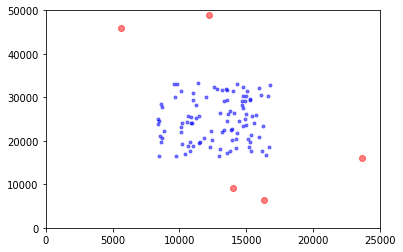

In [6]:
BOIDpositions = init_new_flock(dimensions=dimensions,
                           number_of_boids=number_of_boids,
                           lower_limit = np.asarray([(pos_limits[0]/2)-(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)-(0.341/2)*pos_limits[1]]),
                           upper_limit = np.asarray([(pos_limits[0]/2)+(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)+(0.341/2)*pos_limits[1]]))

PREDpositions = init_new_flock(dimensions=dimensions,
                              number_of_boids=number_of_pred,
                              lower_limit = np.asarray([0,0]),
                              upper_limit = np.asarray(pos_limits))

BOIDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_boids,
                            lower_limit = np.asarray([-10,-10]),
                            upper_limit = np.asarray([10,10]))

PREDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_pred,
                            lower_limit = np.asarray([-5,-5]),
                            upper_limit = np.asarray([5,5]))

figure = plt.figure()
axes = plt.axes(xlim=(0, pos_limits[0]), ylim=(0, pos_limits[1]))
BOIDscatter = axes.scatter(BOIDpositions[0],BOIDpositions[1], marker='.', c = 'blue', alpha=0.5)
PREDscatter = axes.scatter(PREDpositions[0],PREDpositions[1], c = 'red', alpha=0.5)
plt.show()


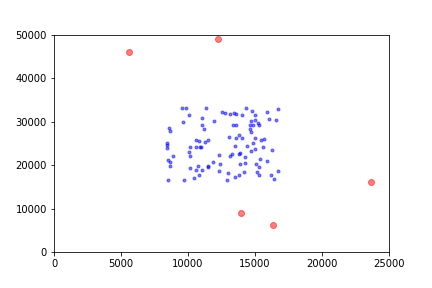
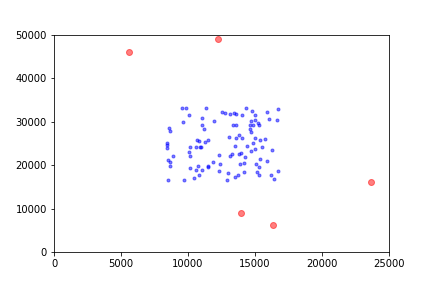
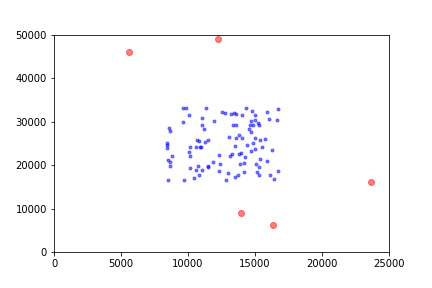
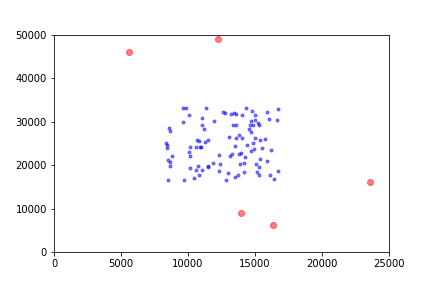
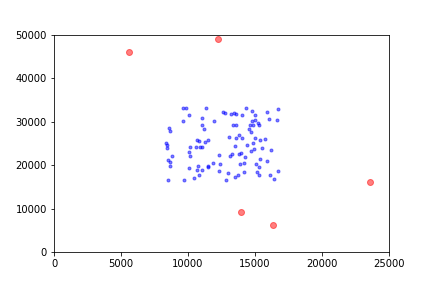
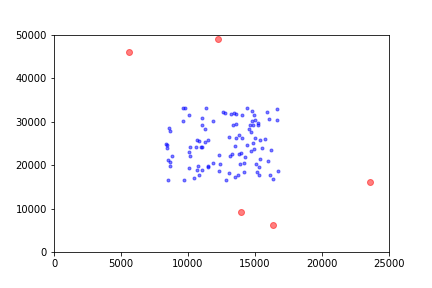
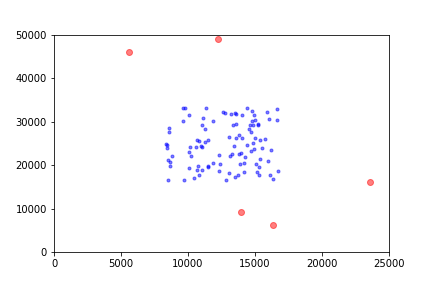
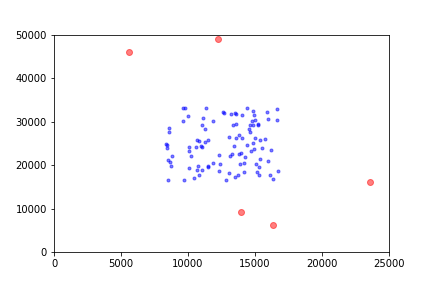
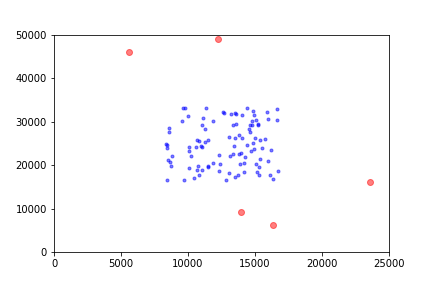
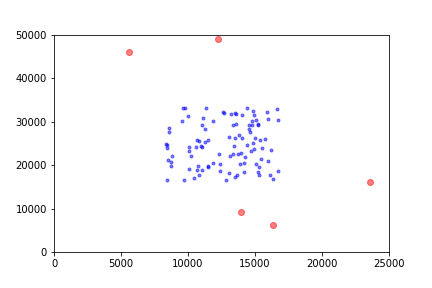
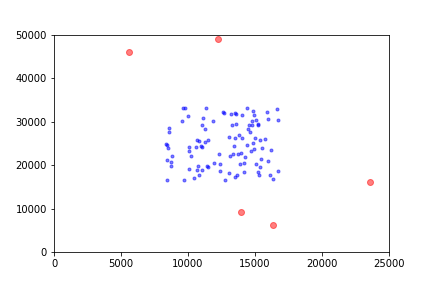
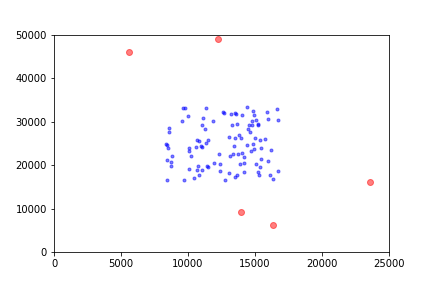
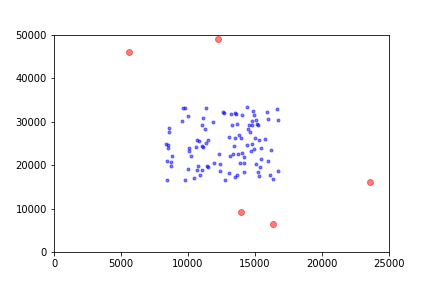
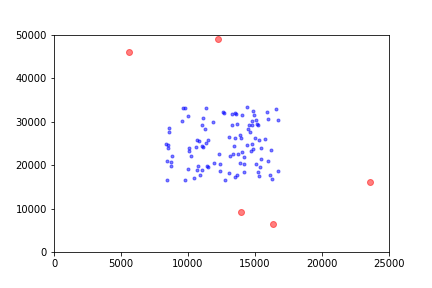
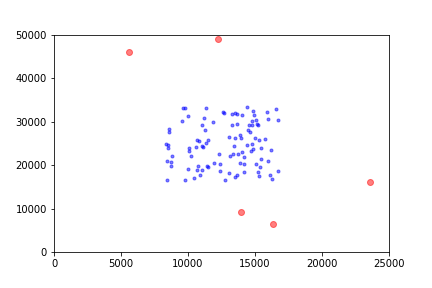
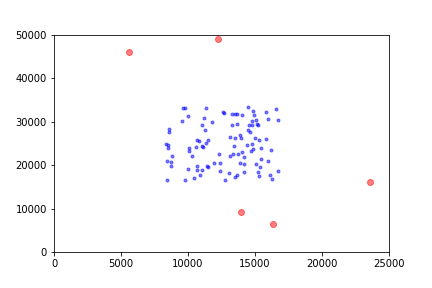
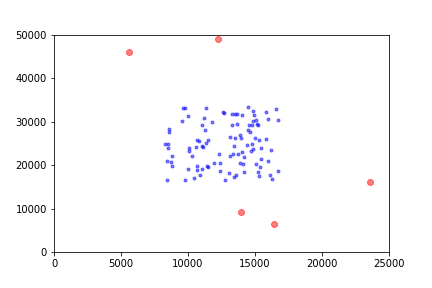
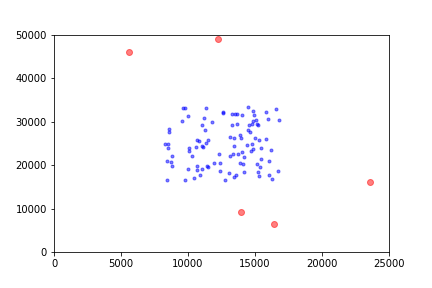
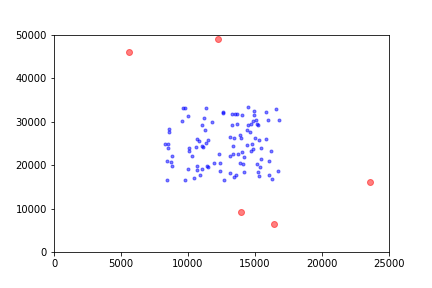
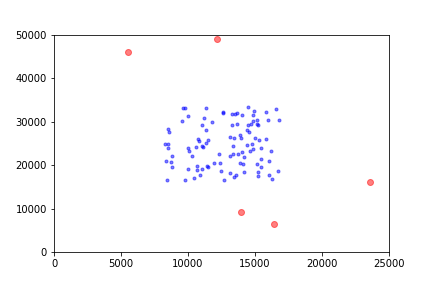
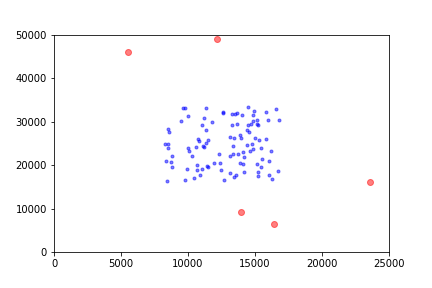
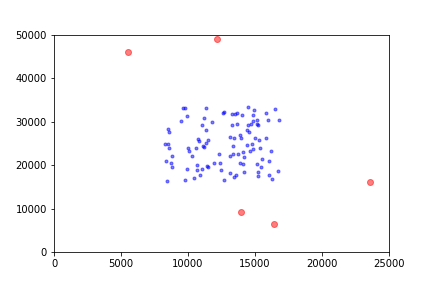
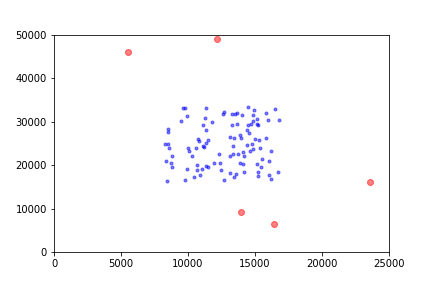
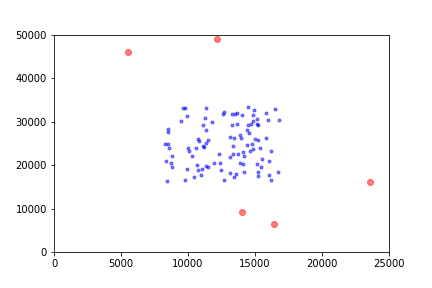
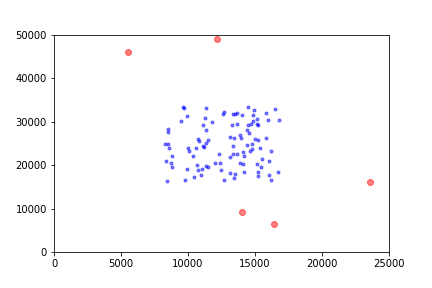
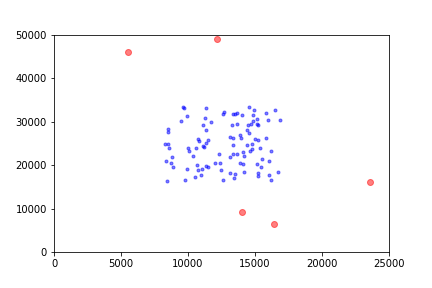
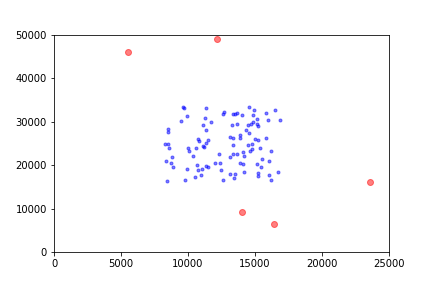
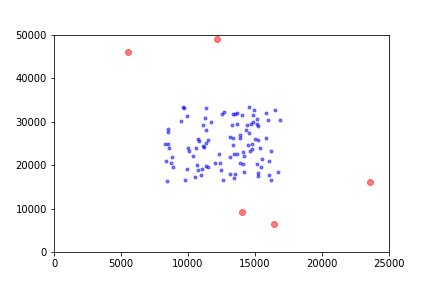
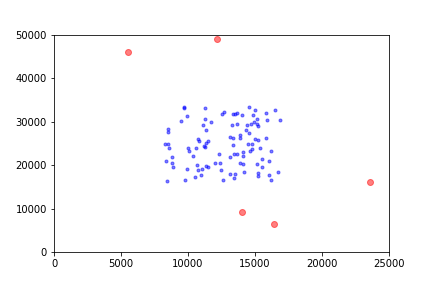
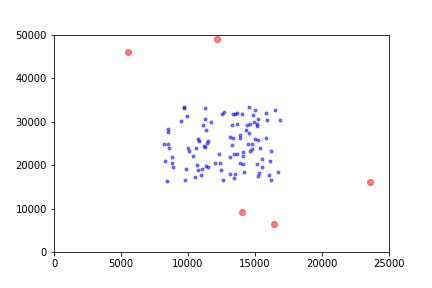
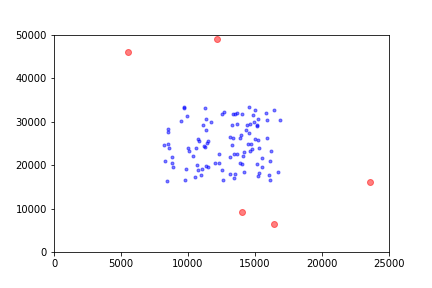
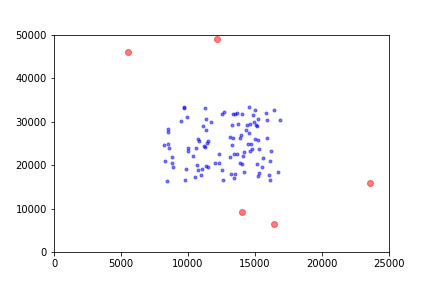
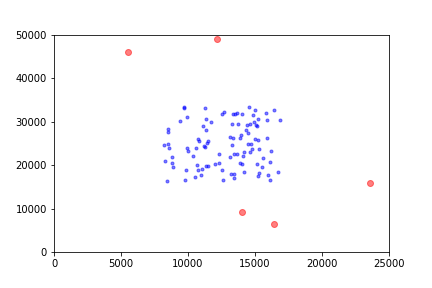
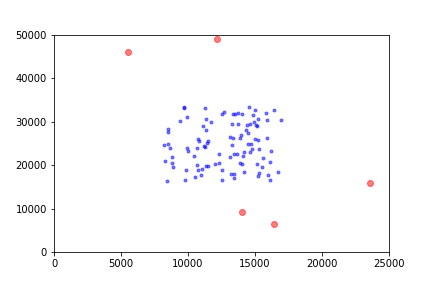
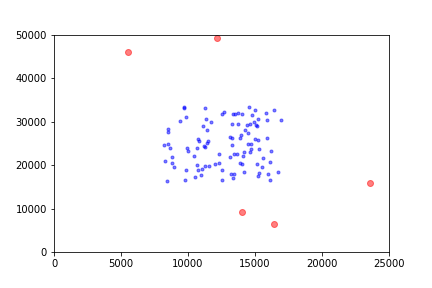
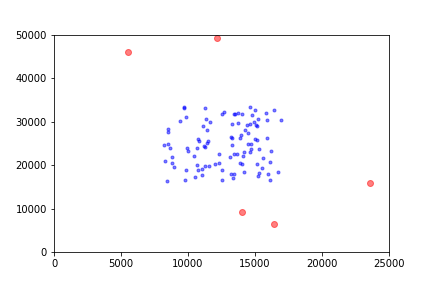
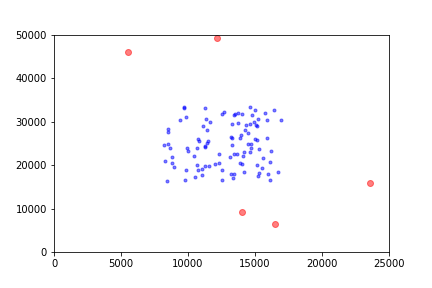
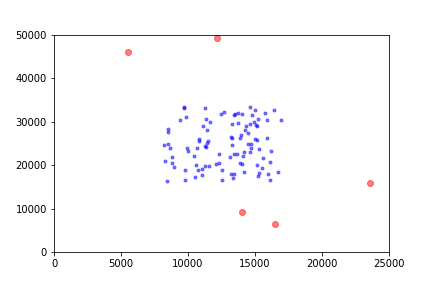
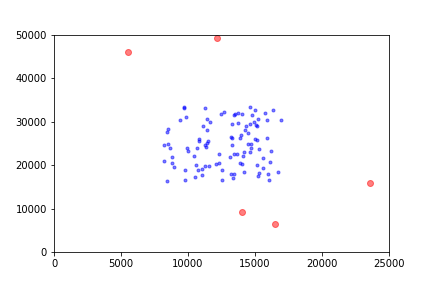
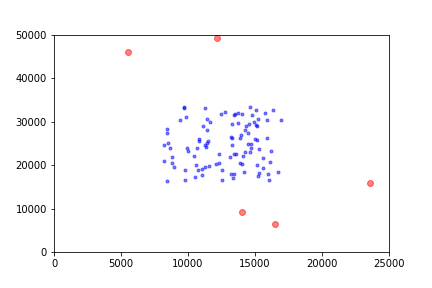
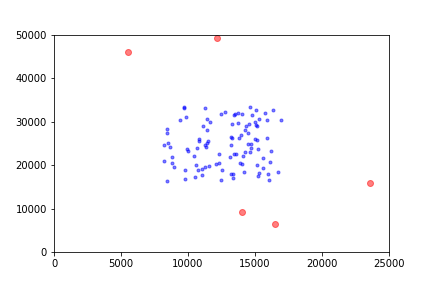
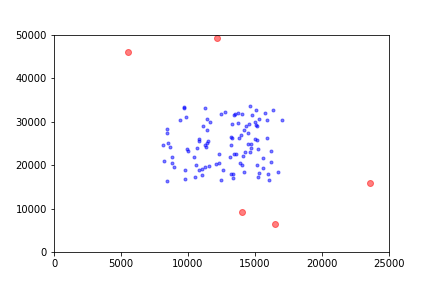
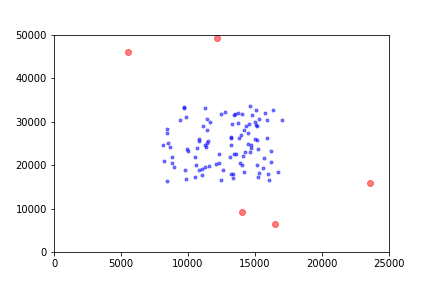
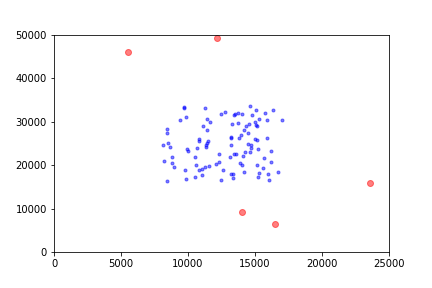
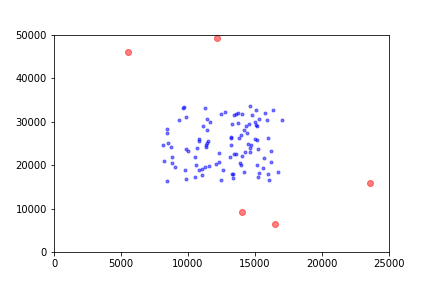
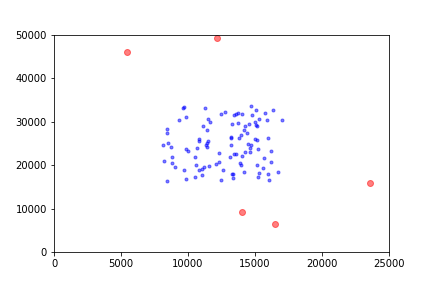
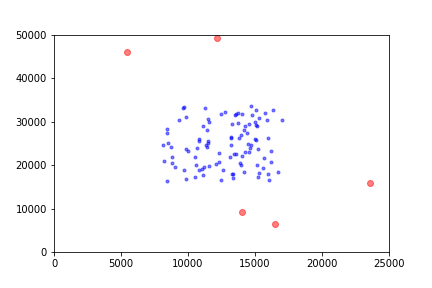
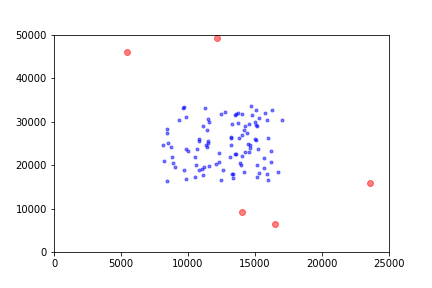
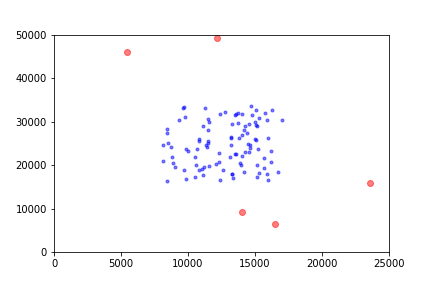
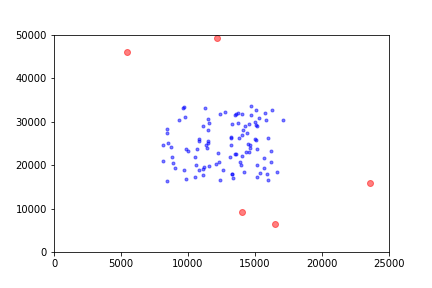
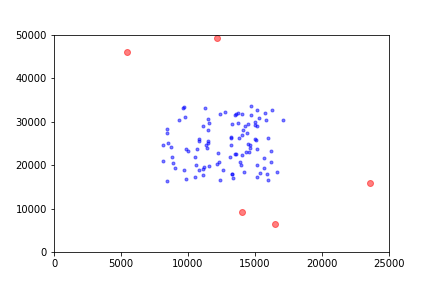
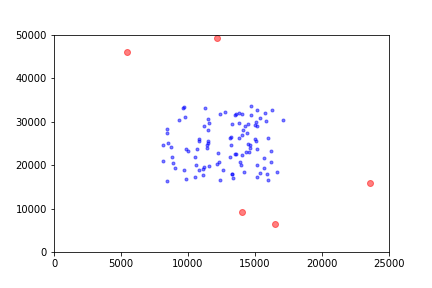
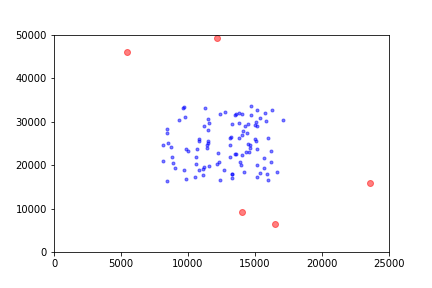
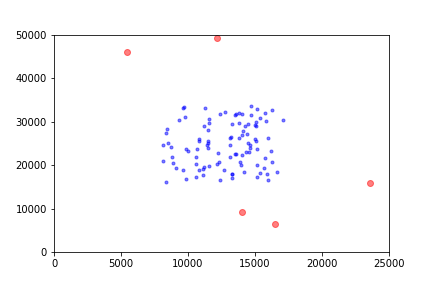
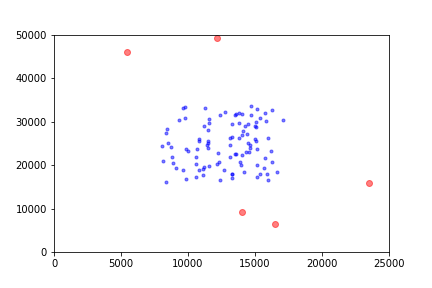
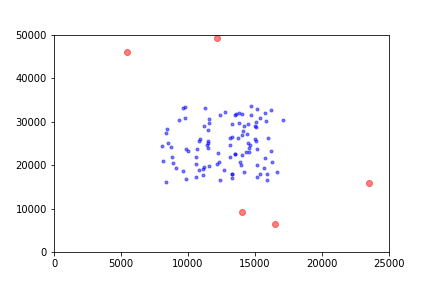
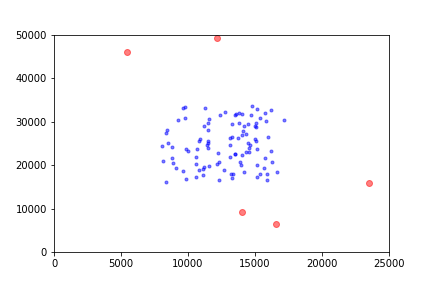
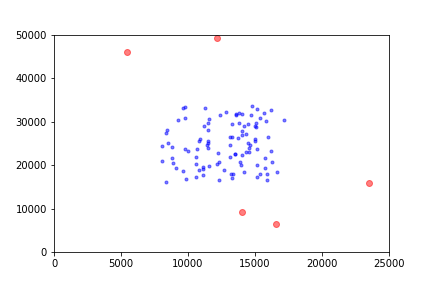
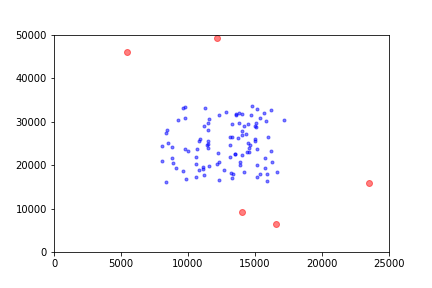
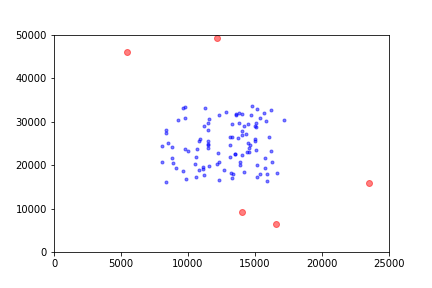
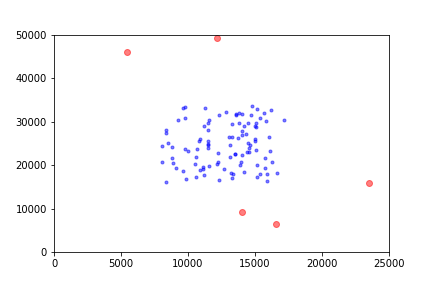
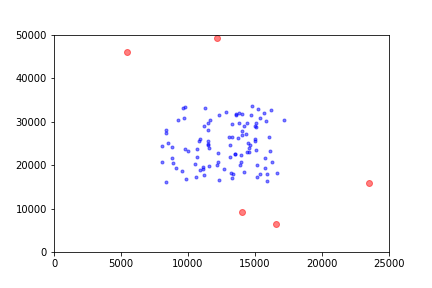
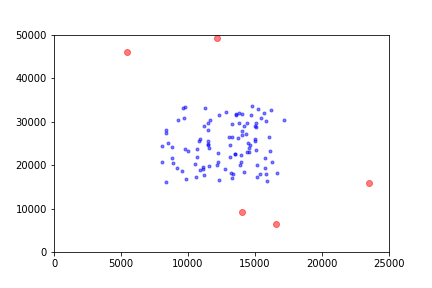
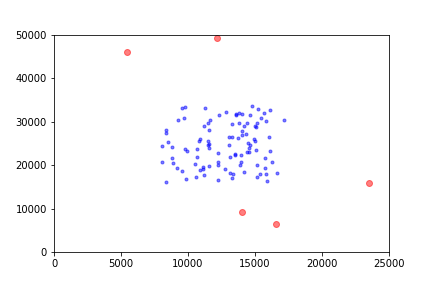
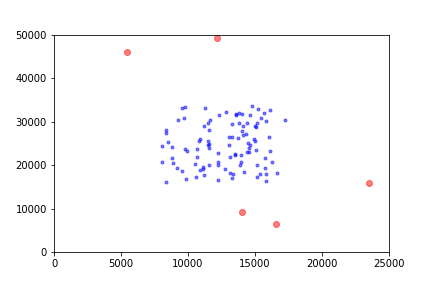
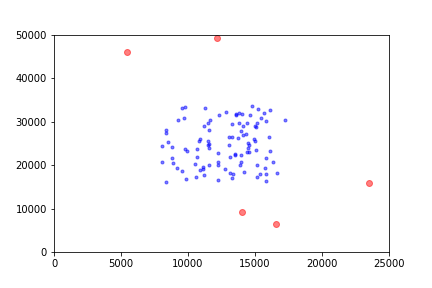
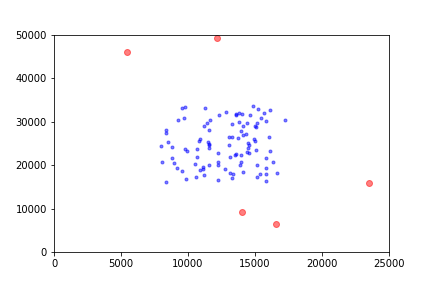
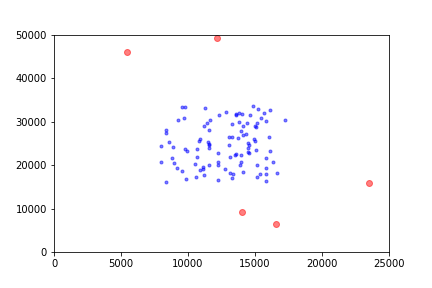
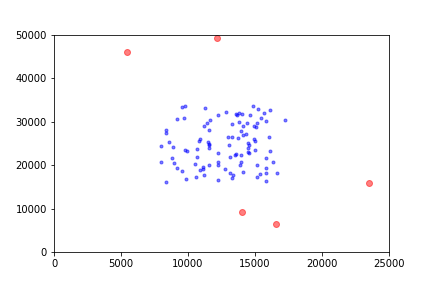
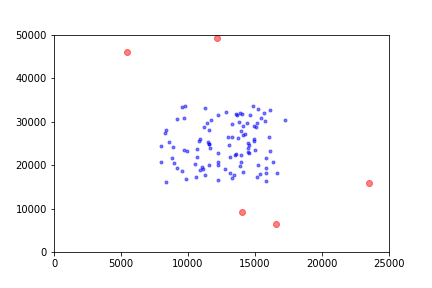
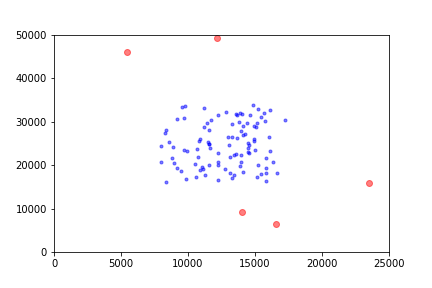
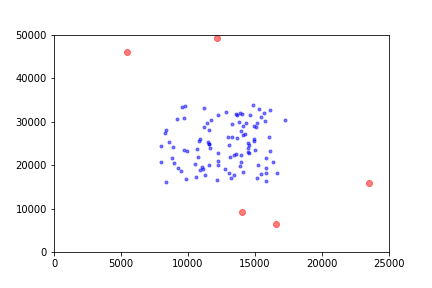
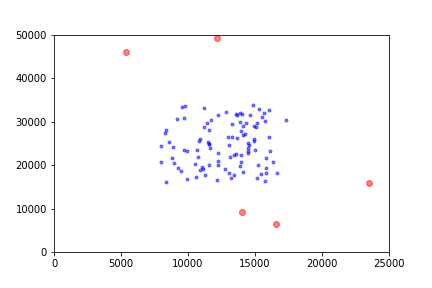
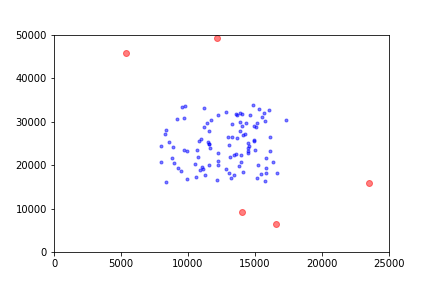
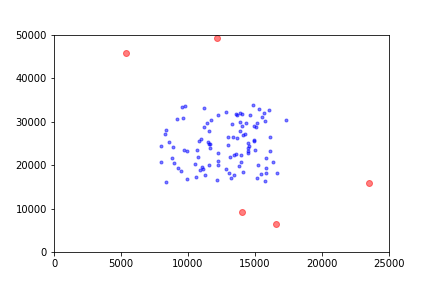
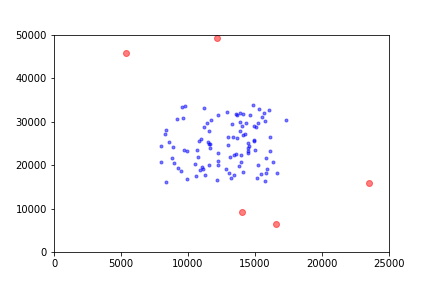
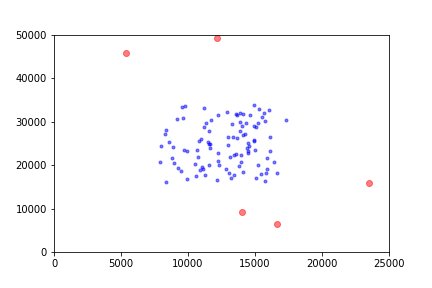
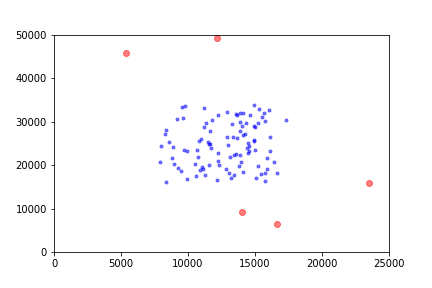
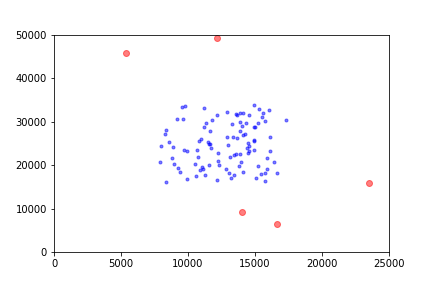
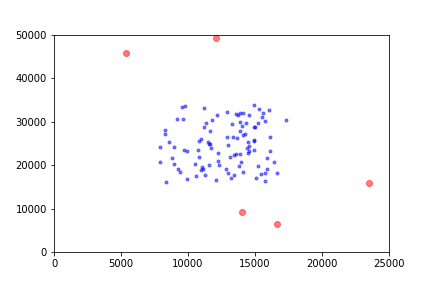
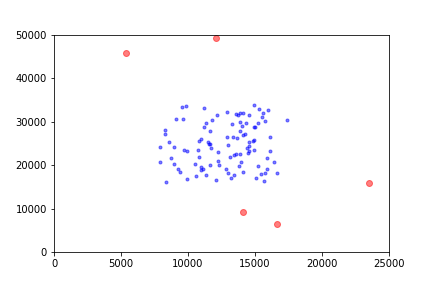
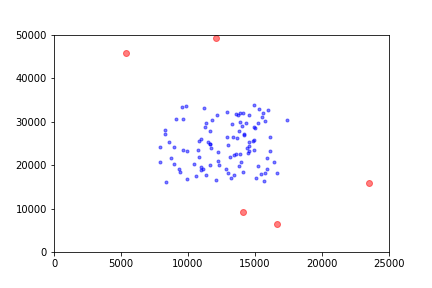
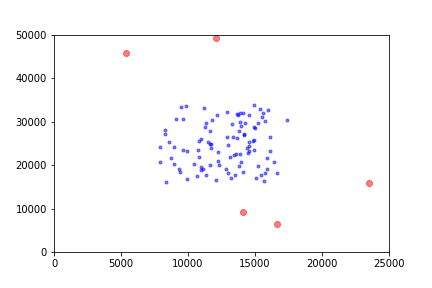
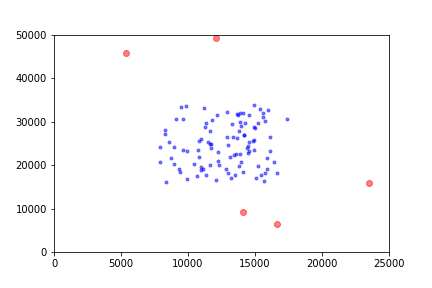
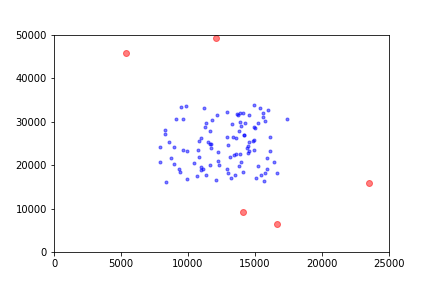
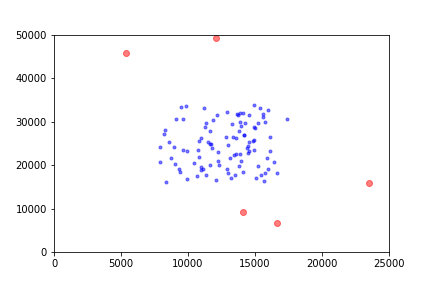
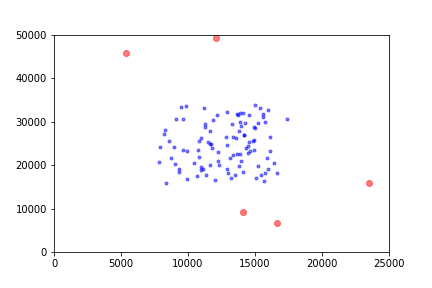
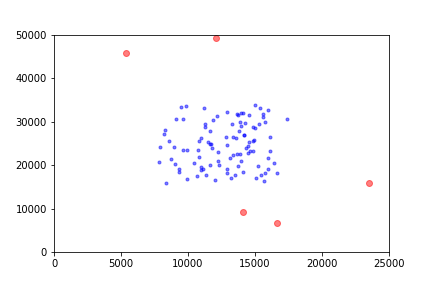
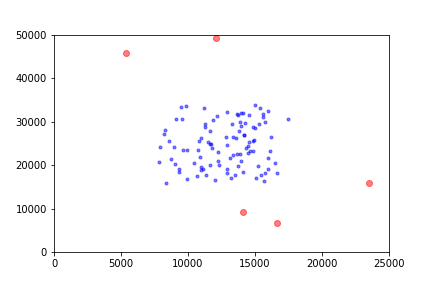
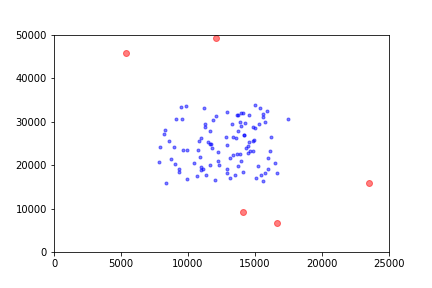
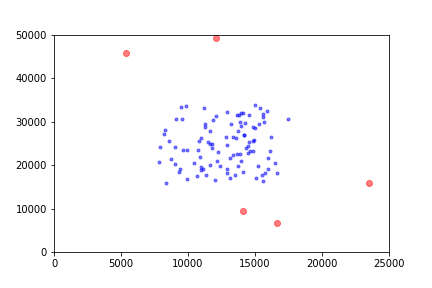
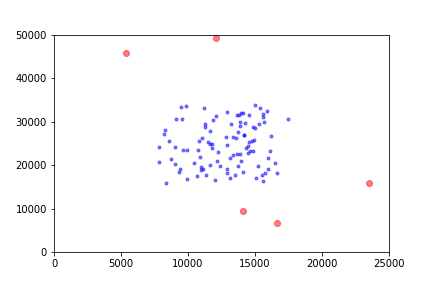
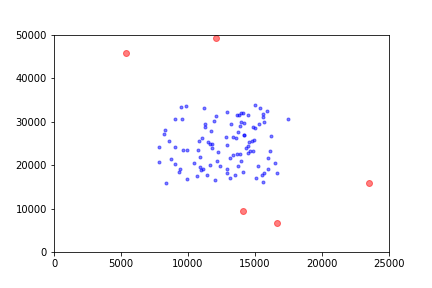
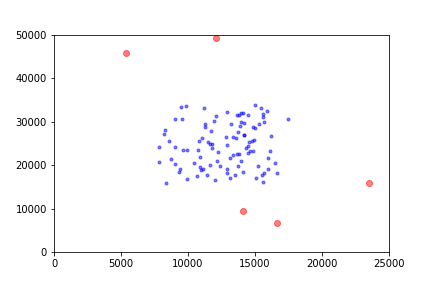
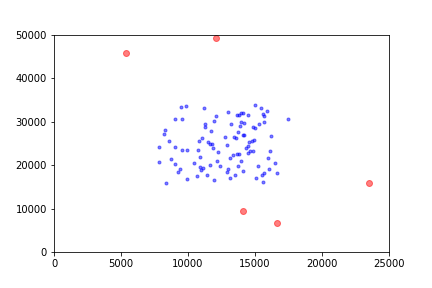
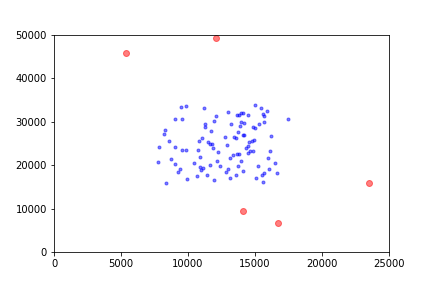
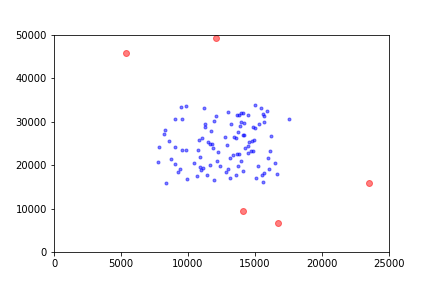
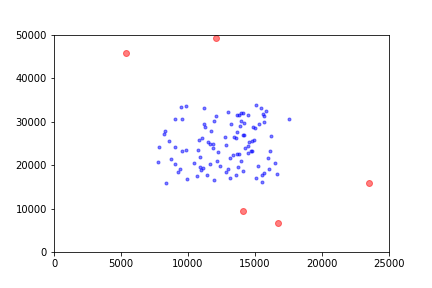
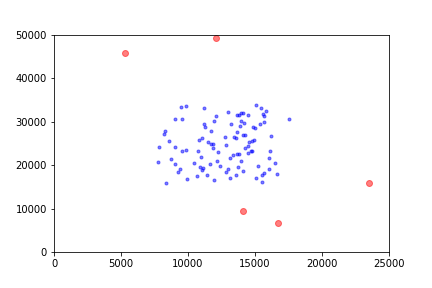
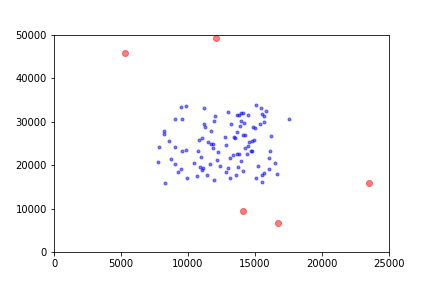
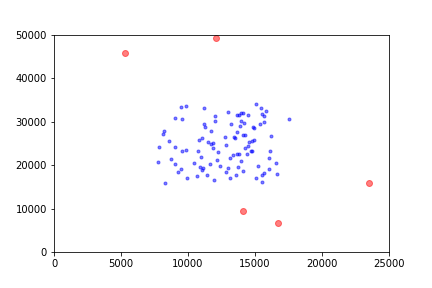
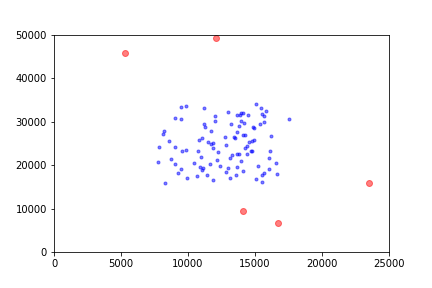
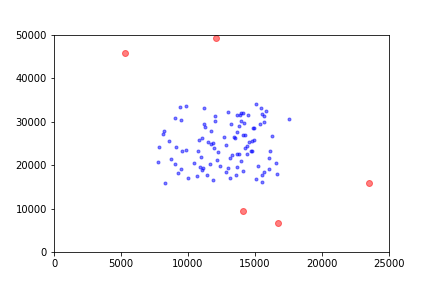
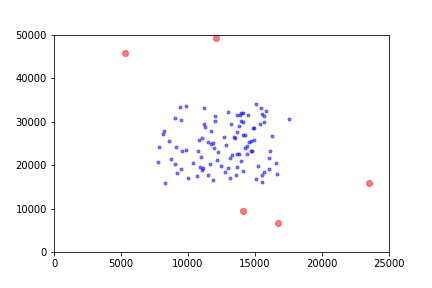
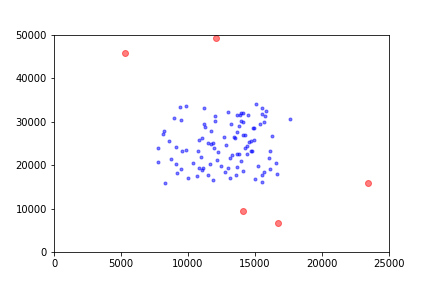
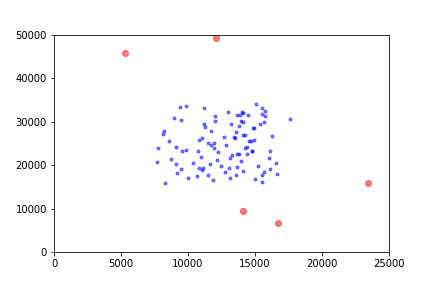
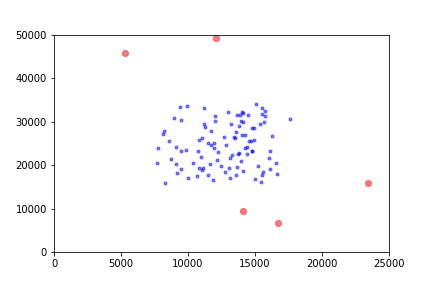
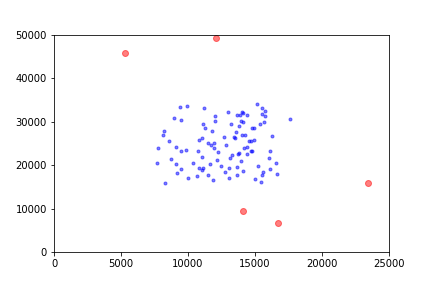
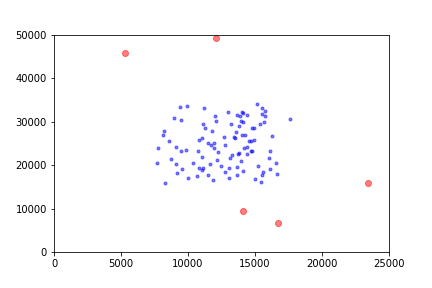
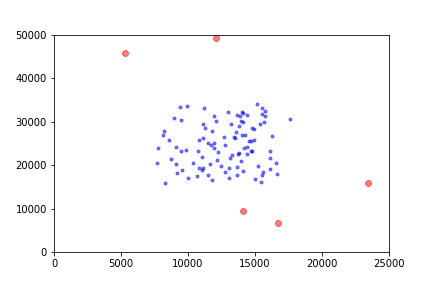
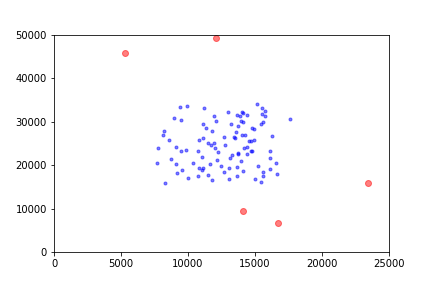
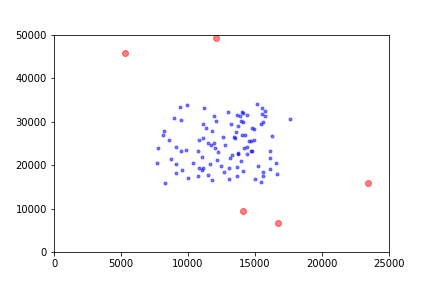
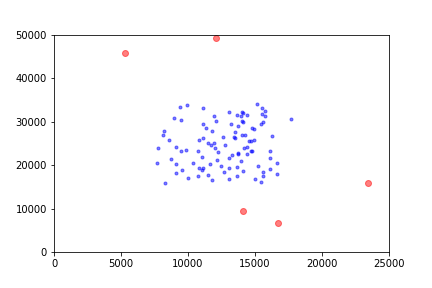
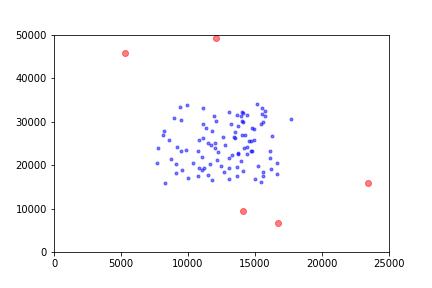
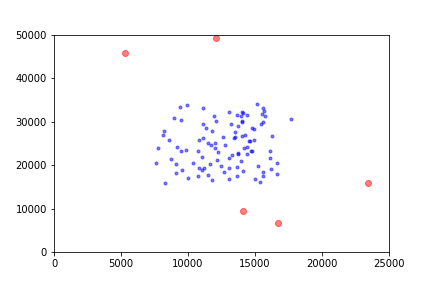
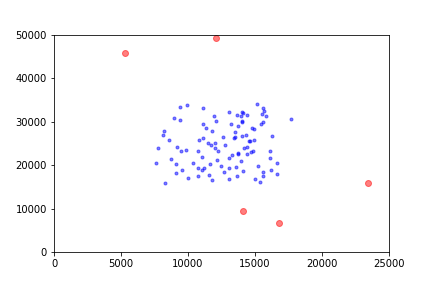
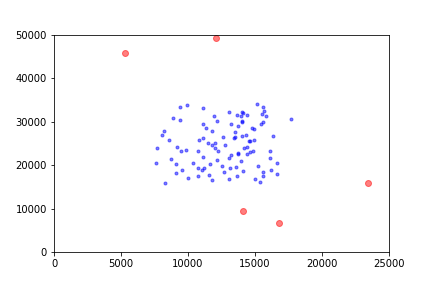
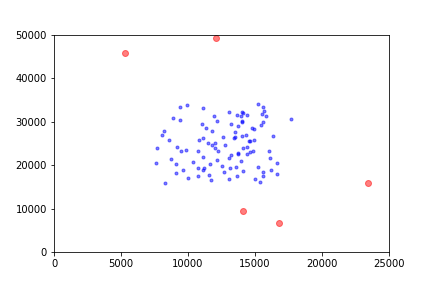
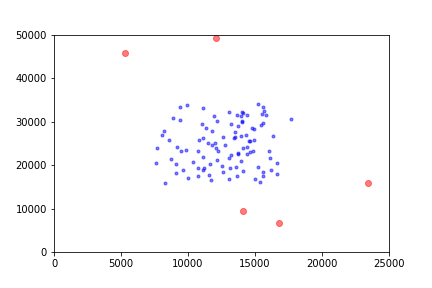
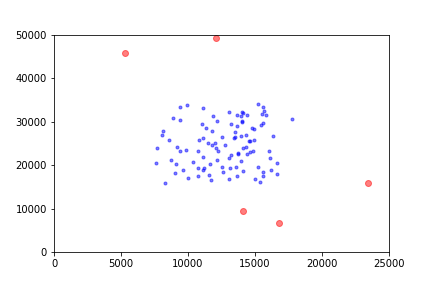
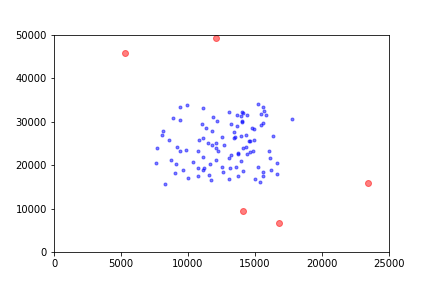
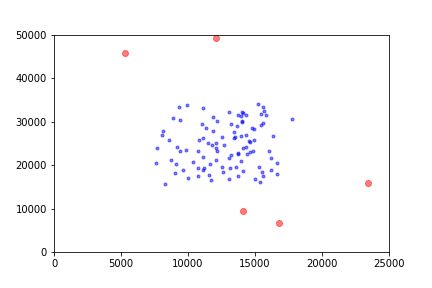
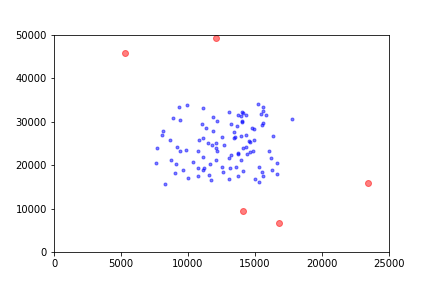
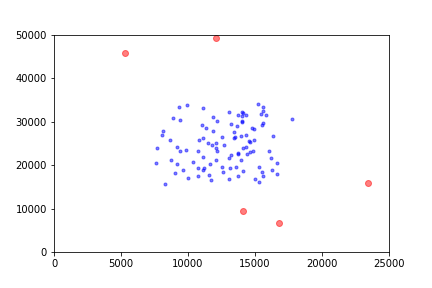
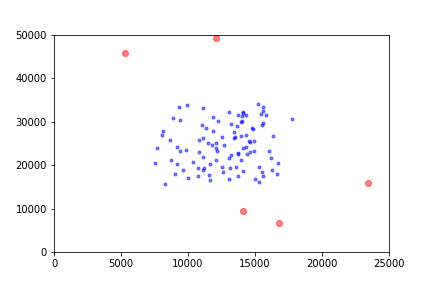
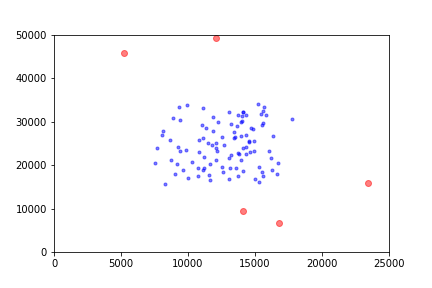
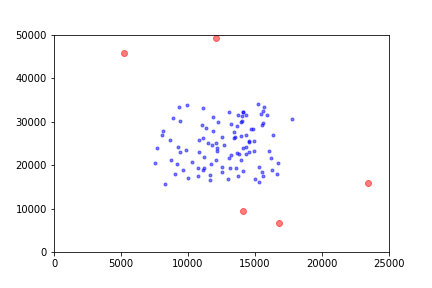
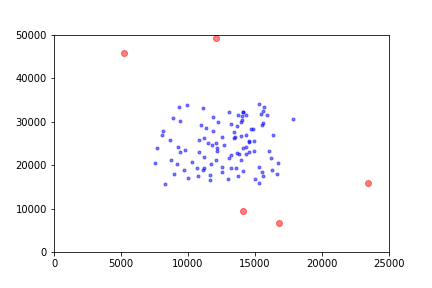
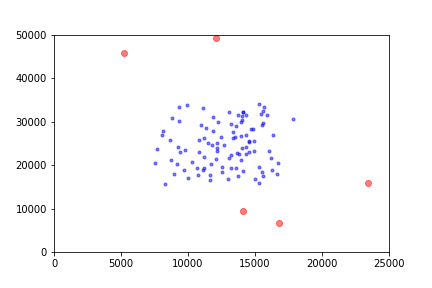
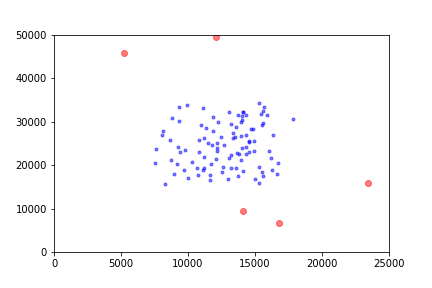
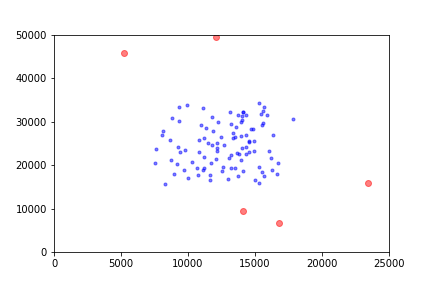
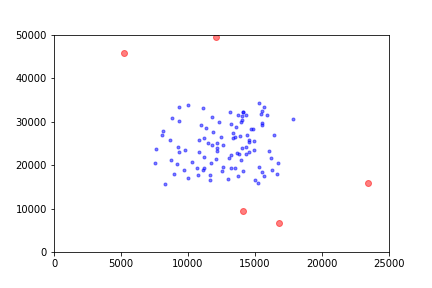
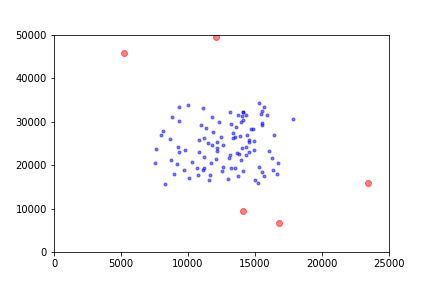
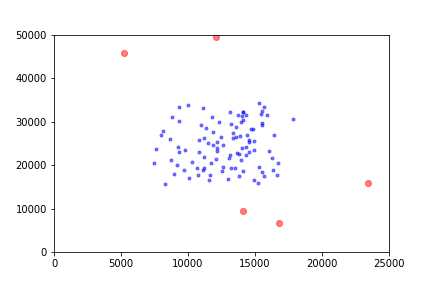
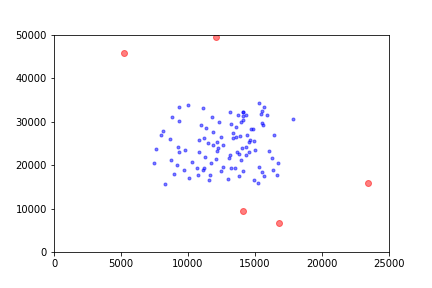
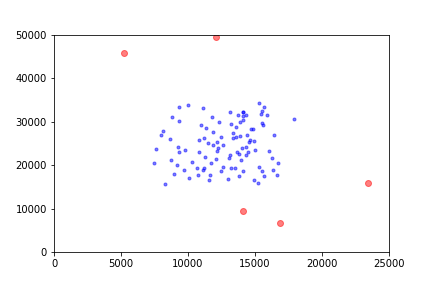
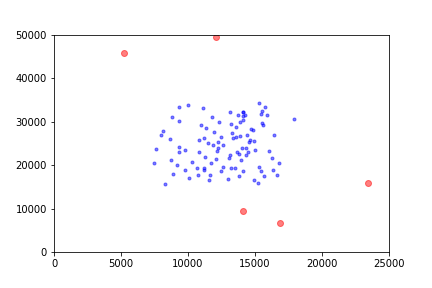
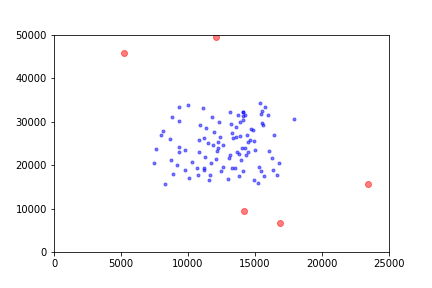
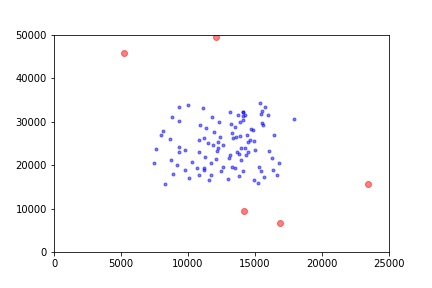
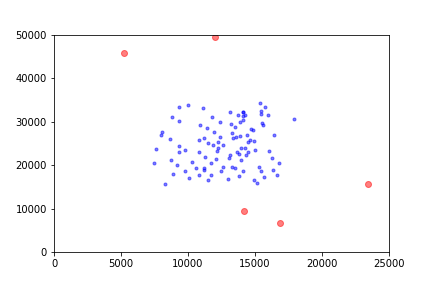
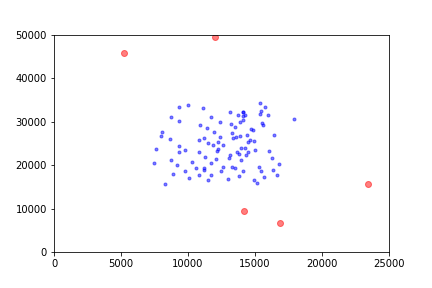
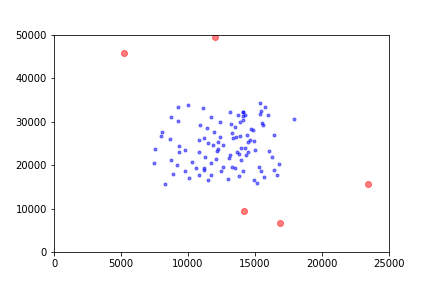
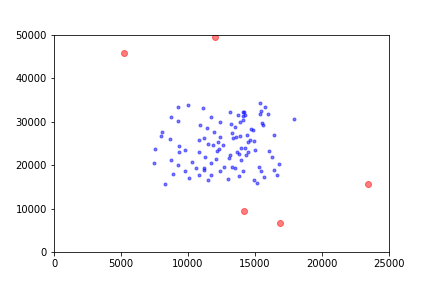
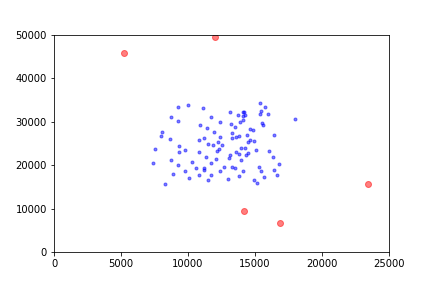
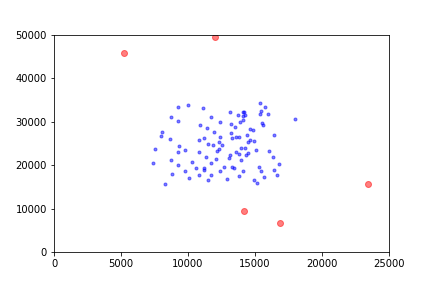
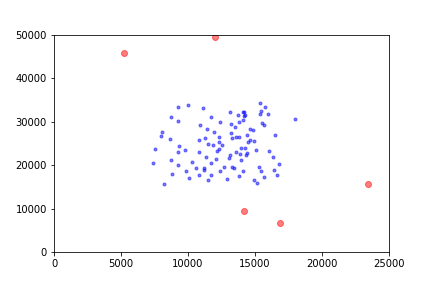
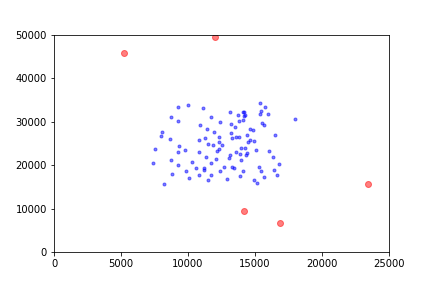
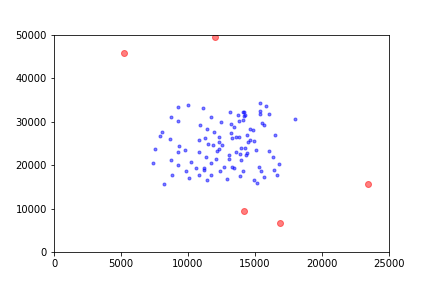
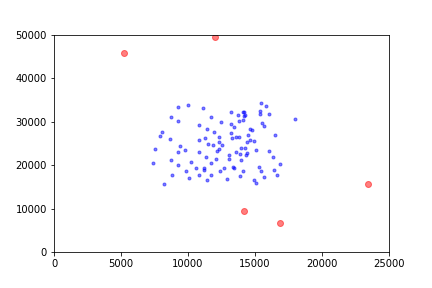
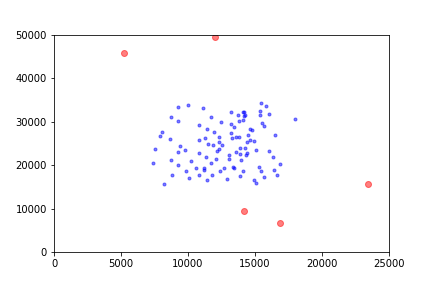

In [7]:
anim1=animation.FuncAnimation(figure, prim_animate,
                             frames=150, interval=50)

anim1

In [8]:
def sec_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities):
    for i in range(BOIDpositions[0].shape[0]):
        if BOIDpositions[0][i] >= pos_limits[0]:
            BOIDpositions[0][i] = pos_limits[0]
        if BOIDpositions[0][i] < 0:
            BOIDpositions[0][i] = 0
    for j in range(BOIDpositions[1].shape[0]):
        if BOIDpositions[1][j] >= pos_limits[1]:
            BOIDpositions[1][j] = pos_limits[1]
        if BOIDpositions[1][j] < 0:
            BOIDpositions[1][j] = 0
            
    for i in range(PREDpositions[0].shape[0]):
        if PREDpositions[0][i] >= pos_limits[0]:
            PREDpositions[0][i] = pos_limits[0]
        if PREDpositions[0][i] < 0:
            PREDpositions[0][i] = 0
    for j in range(PREDpositions[1].shape[0]):
        if PREDpositions[1][j] >= pos_limits[1]:
            PREDpositions[1][j] = pos_limits[1]
        if PREDpositions[1][j] < 0:
            PREDpositions[1][j] = 0
                
    fear_of_predator = 0.005
    for k in range(BOIDpositions.shape[1]):
        center_of_mass = np.mean(np.delete(BOIDpositions, k, axis=1), axis=1)
        direction_to_center_of_mass = BOIDpositions[:,k] - center_of_mass
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_center_of_mass * fear_of_predator
    
    hunger_of_predator = 0.005
    for kpred in range(PREDpositions.shape[1]):
        distance_to_nearest_prey_holder = []
        for k in range(BOIDpositions.shape[1]):
            distance_to_nearest_prey = np.linalg.norm(BOIDpositions[:,k] - PREDpositions[:,kpred], ord=2)
            distance_to_nearest_prey_holder.append(distance_to_nearest_prey)
        distance_to_nearest_prey_holder = np.asarray(distance_to_nearest_prey_holder)
        nearest_prey_index = distance_to_nearest_prey_holder.argmin()
        direction_to_nearest_prey = PREDpositions[:, kpred] - BOIDpositions[:,nearest_prey_index]
        PREDvelocities[:,kpred] = PREDvelocities[:,kpred] - direction_to_nearest_prey * hunger_of_predator
        
        
    BOIDpositions += BOIDvelocities

    PREDpositions += PREDvelocities

def sec_animate(frame):
    sec_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities)
    BOIDscatter.set_offsets(BOIDpositions.T)
    PREDscatter.set_offsets(PREDpositions.T)

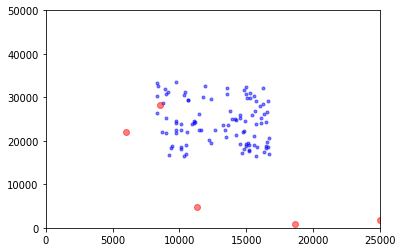

In [9]:
BOIDpositions = init_new_flock(dimensions=dimensions,
                           number_of_boids=number_of_boids,
                           lower_limit = np.asarray([(pos_limits[0]/2)-(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)-(0.341/2)*pos_limits[1]]),
                           upper_limit = np.asarray([(pos_limits[0]/2)+(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)+(0.341/2)*pos_limits[1]]))

PREDpositions = init_new_flock(dimensions=dimensions,
                              number_of_boids=number_of_pred,
                              lower_limit = np.asarray([0,0]),
                              upper_limit = np.asarray(pos_limits))

BOIDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_boids,
                            lower_limit = np.asarray([-10,-10]),
                            upper_limit = np.asarray([10,10]))

PREDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_pred,
                            lower_limit = np.asarray([-5,-5]),
                            upper_limit = np.asarray([5,5]))

figure = plt.figure()
axes = plt.axes(xlim=(0, pos_limits[0]), ylim=(0, pos_limits[1]))
BOIDscatter = axes.scatter(BOIDpositions[0],BOIDpositions[1], marker='.', c = 'blue', alpha=0.5)
PREDscatter = axes.scatter(PREDpositions[0],PREDpositions[1], c = 'red', alpha=0.5)
plt.show()


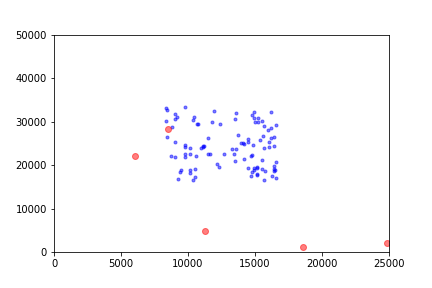
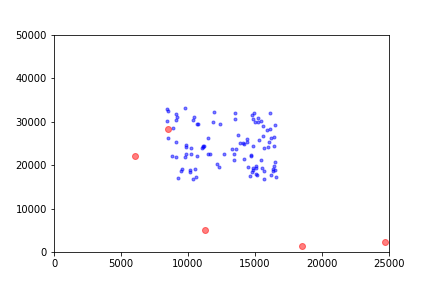
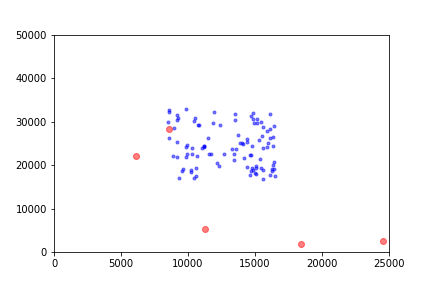
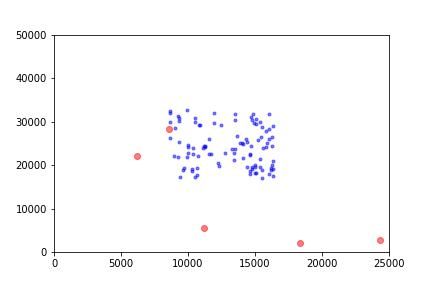
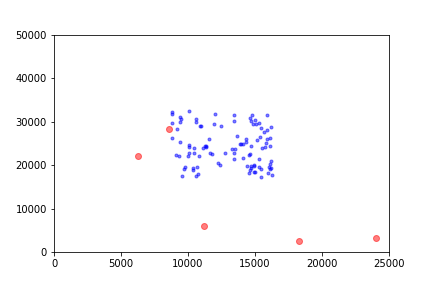
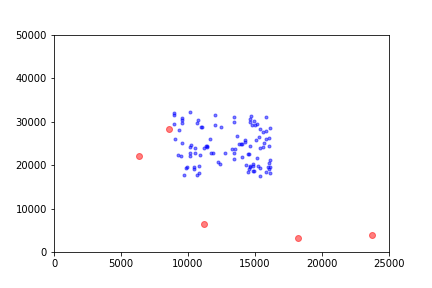
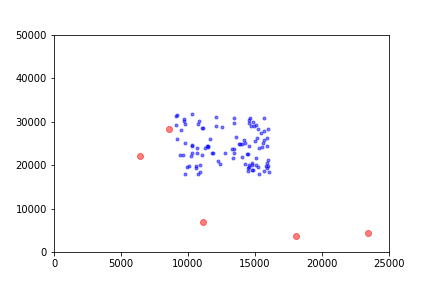
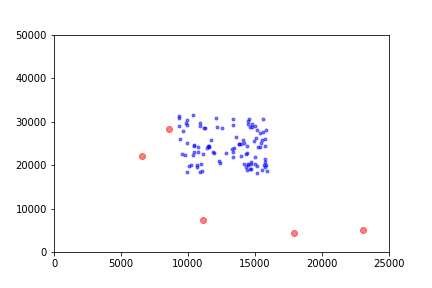
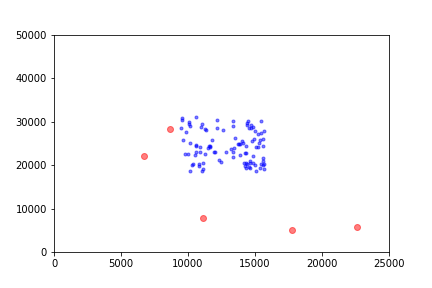
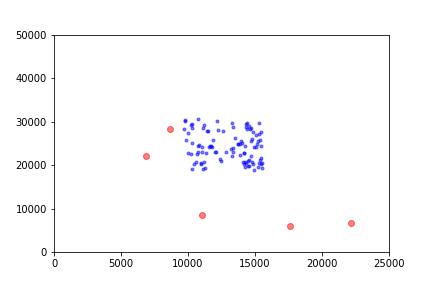
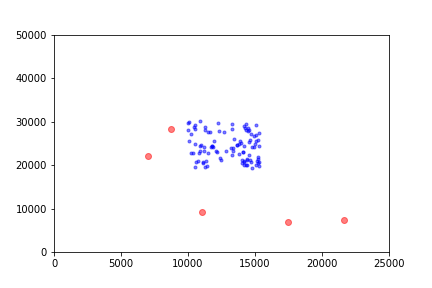
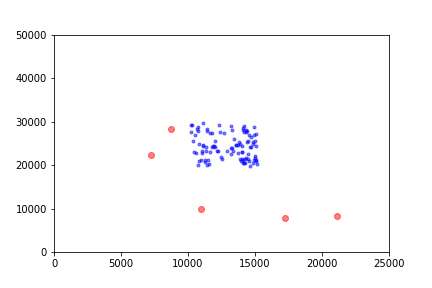
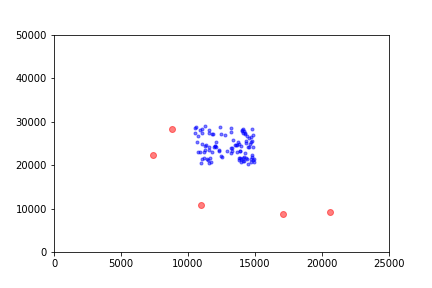
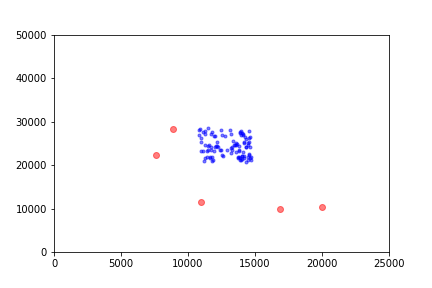
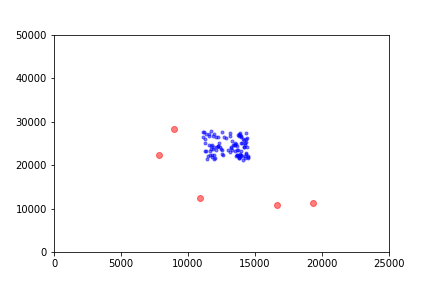
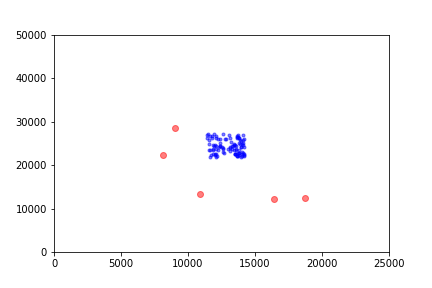
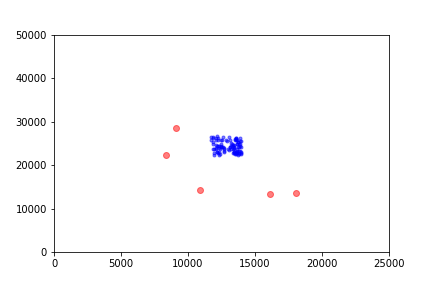
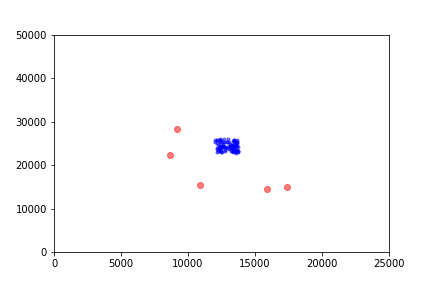
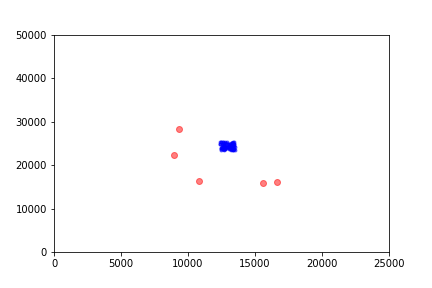
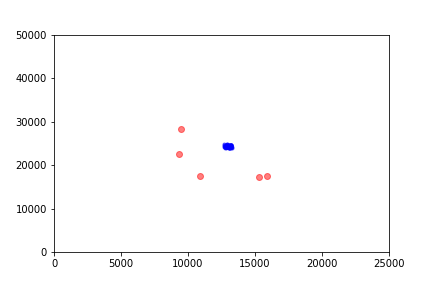
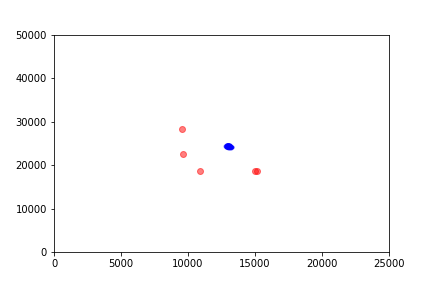
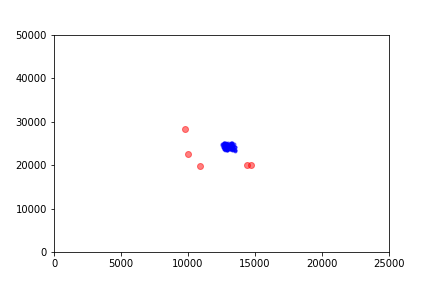
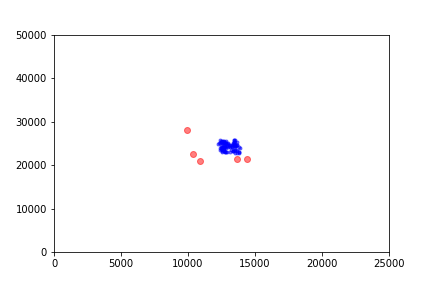
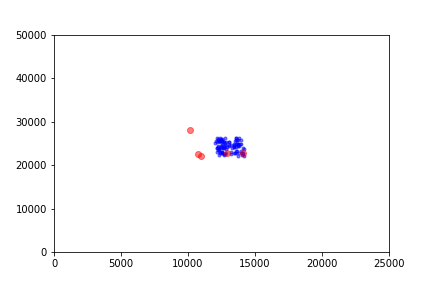
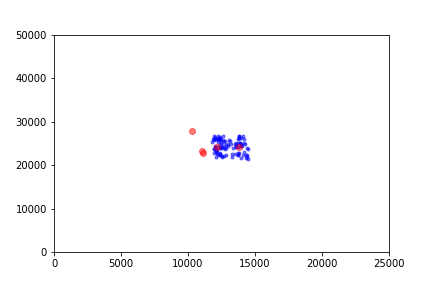
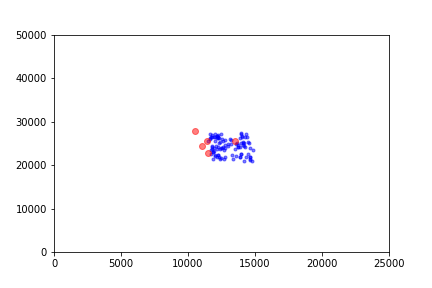
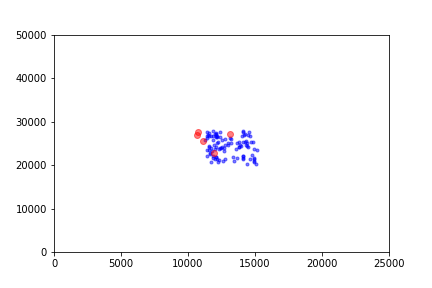
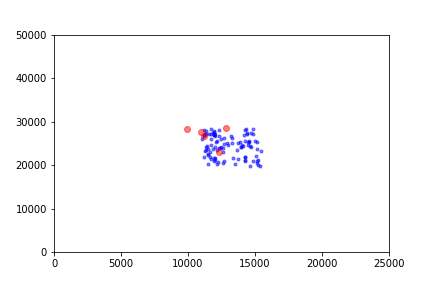
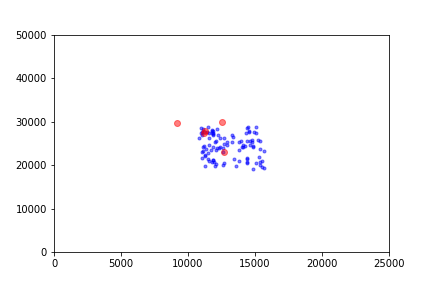
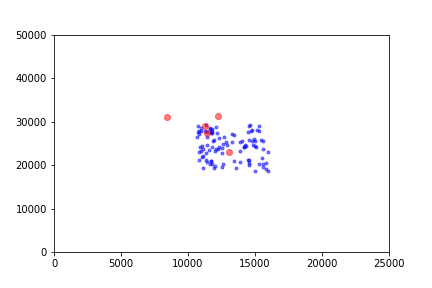
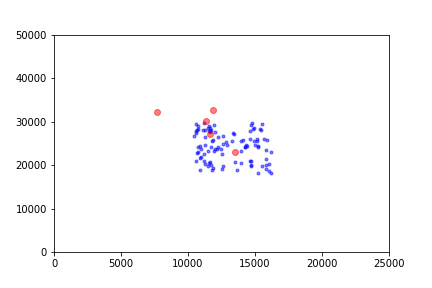
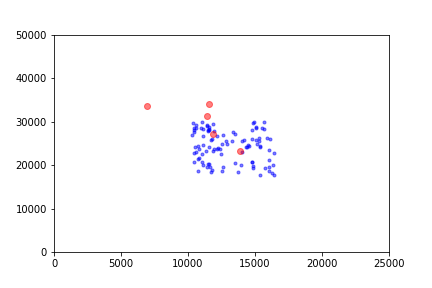
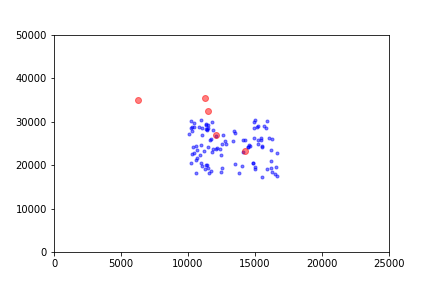
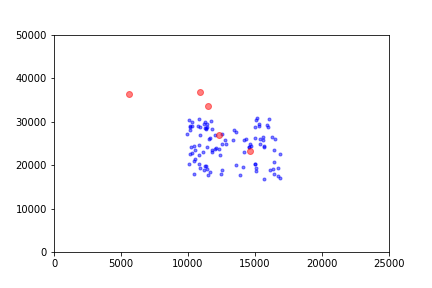
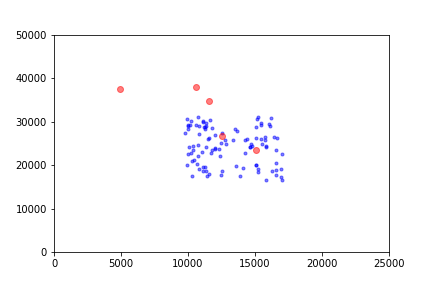
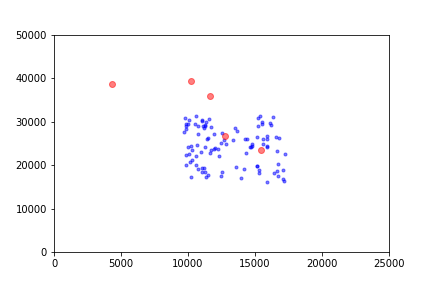
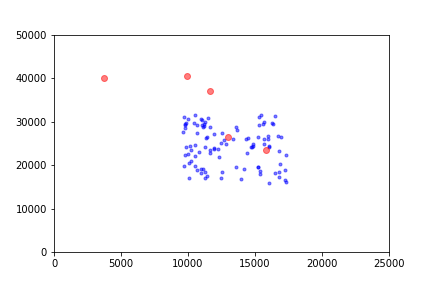
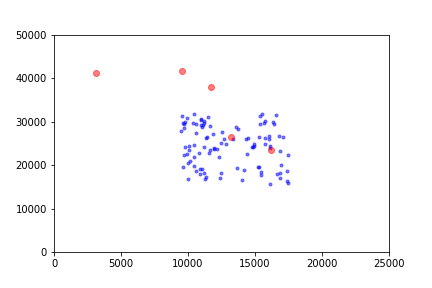
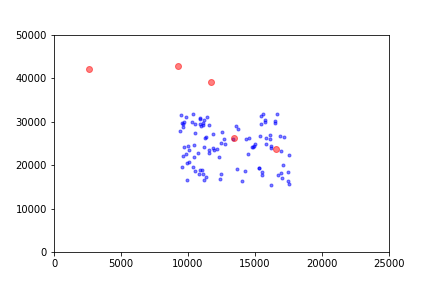
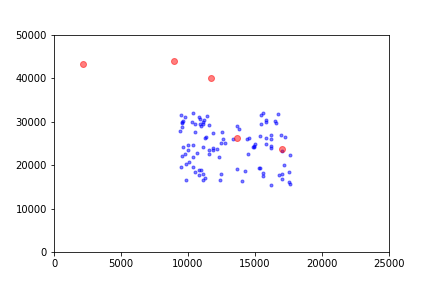
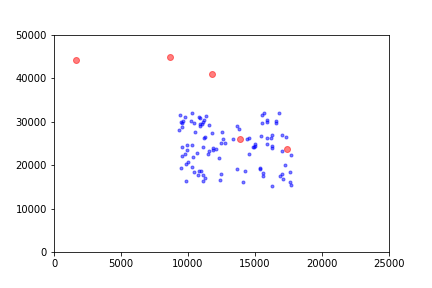
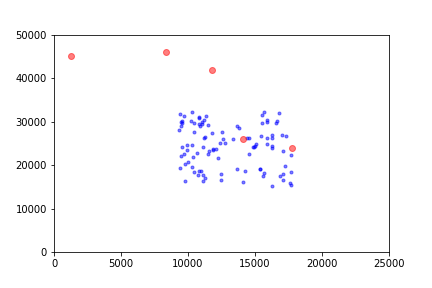
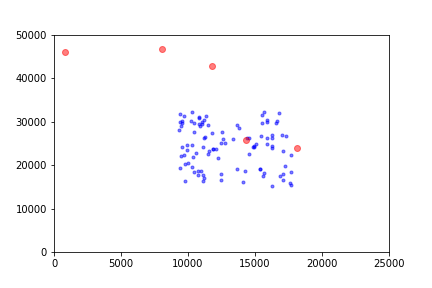
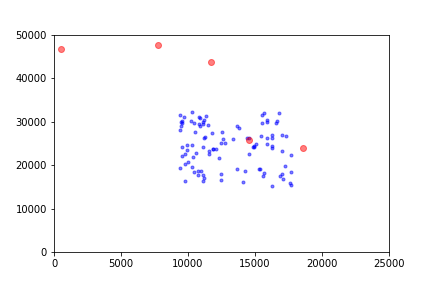
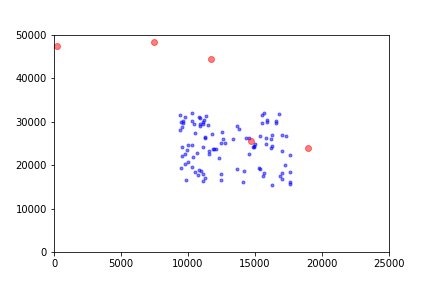
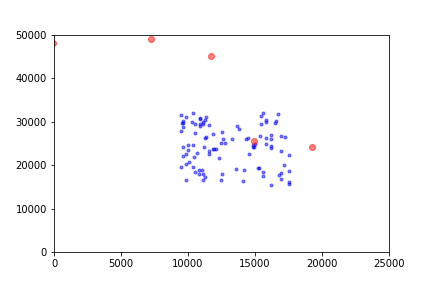
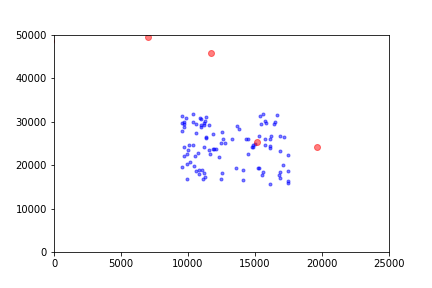
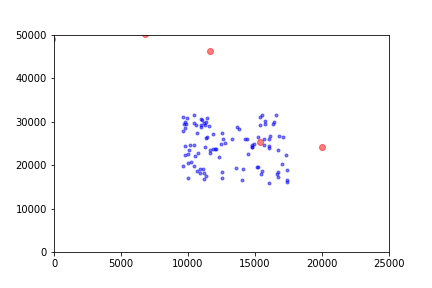
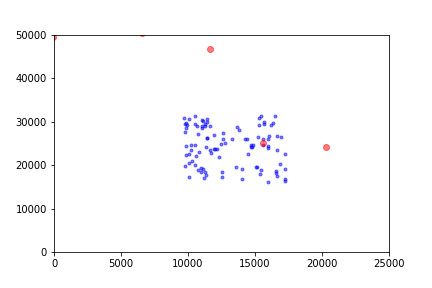
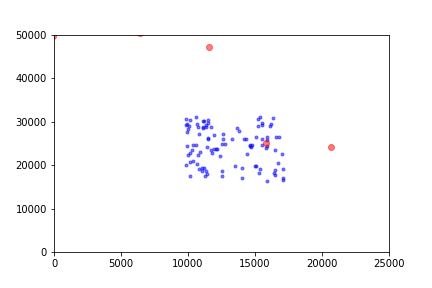
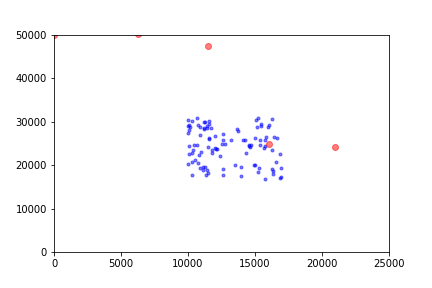
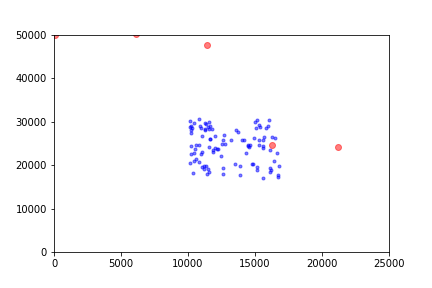
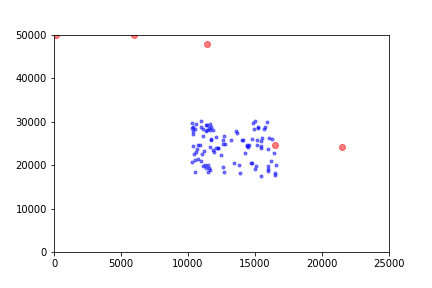
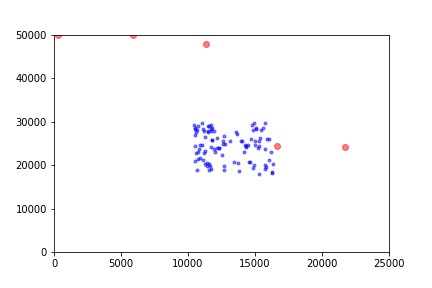
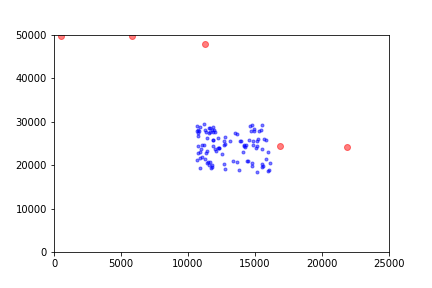
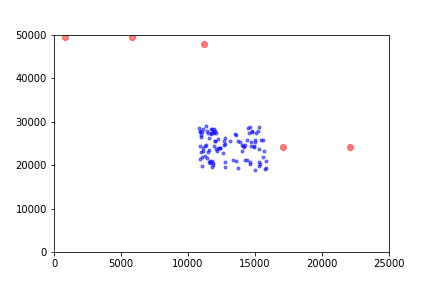
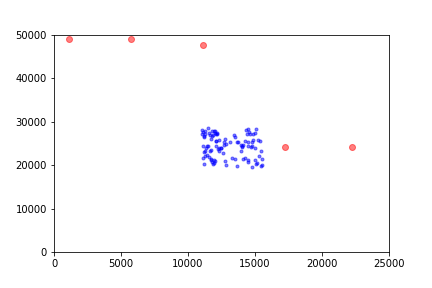
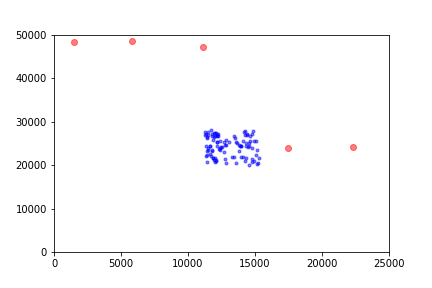
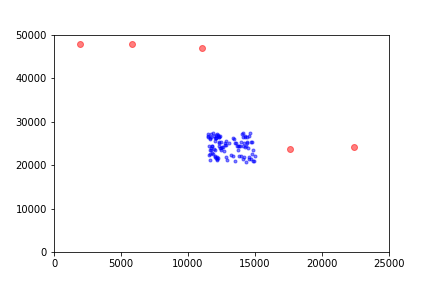
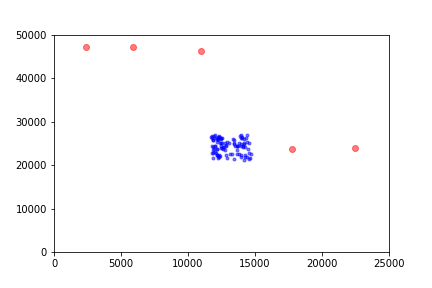
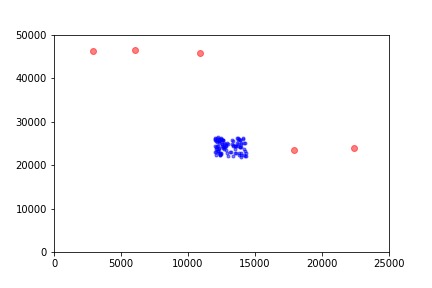
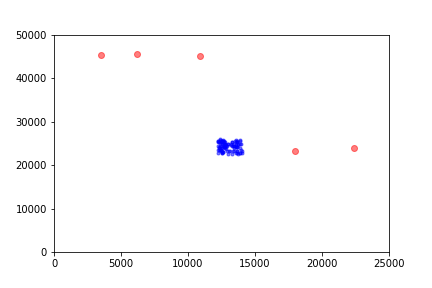
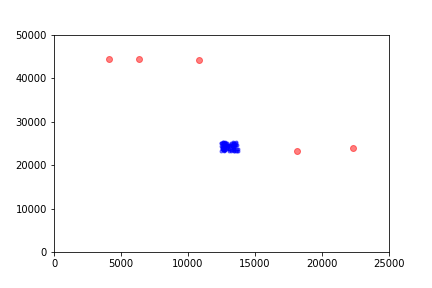
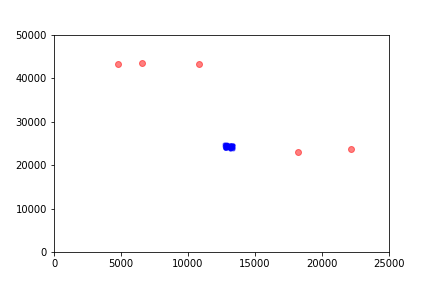
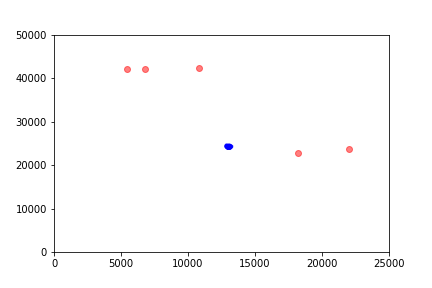
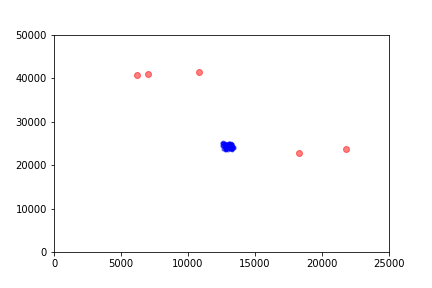
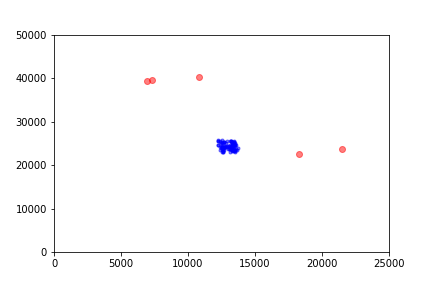
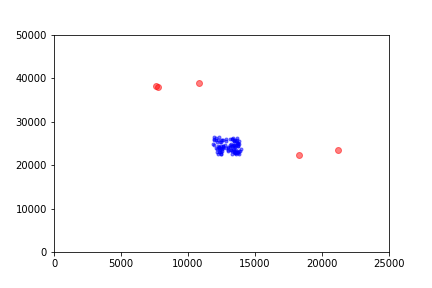
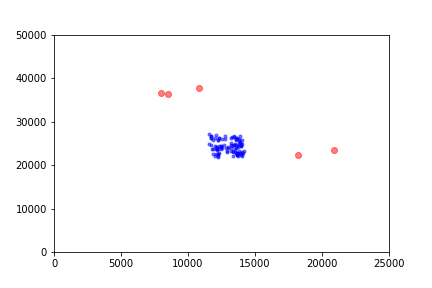
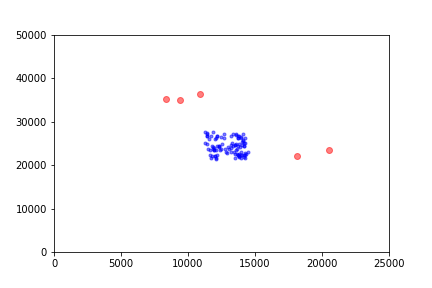
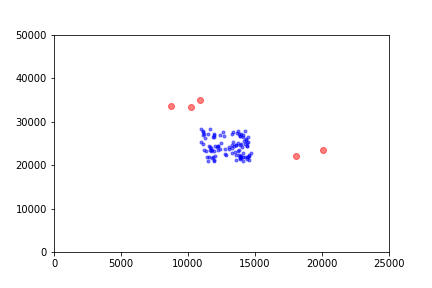
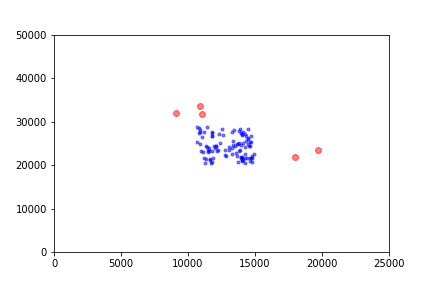
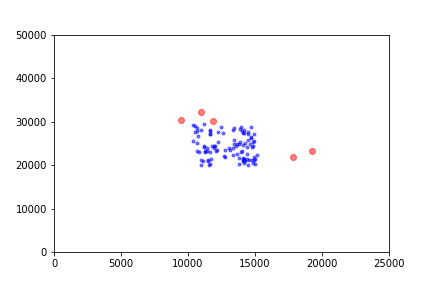
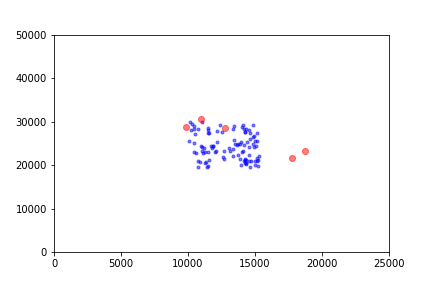
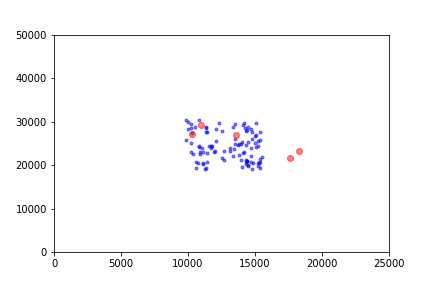
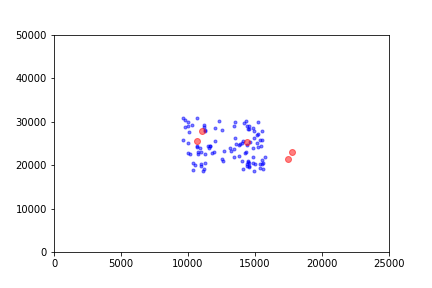
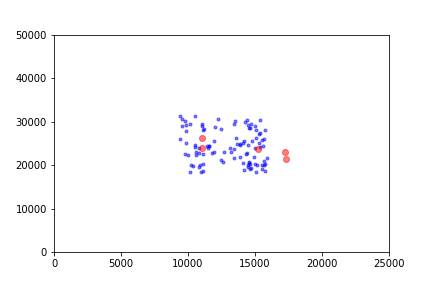
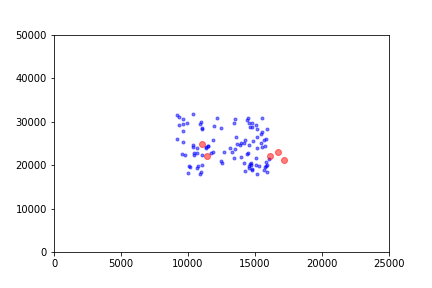
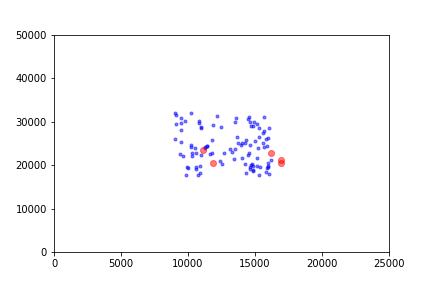
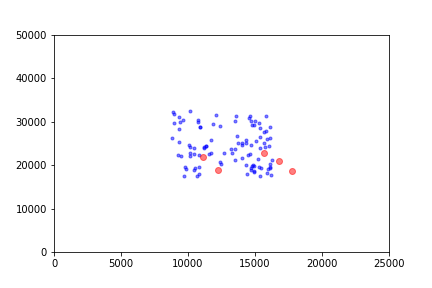
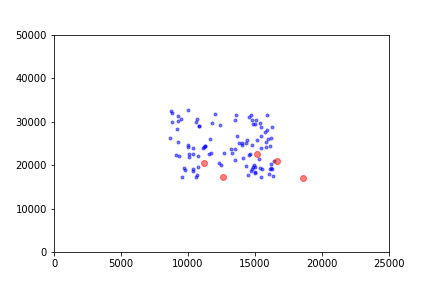
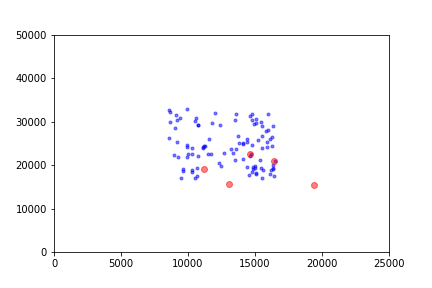
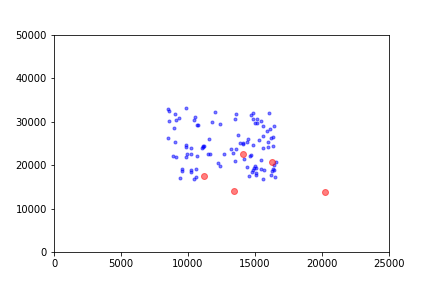
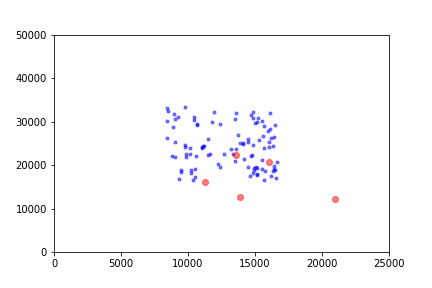
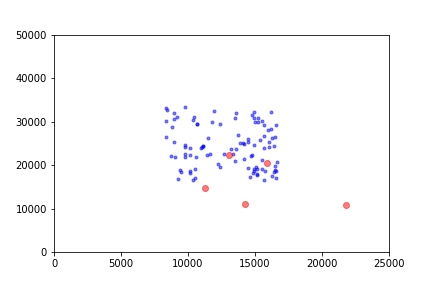
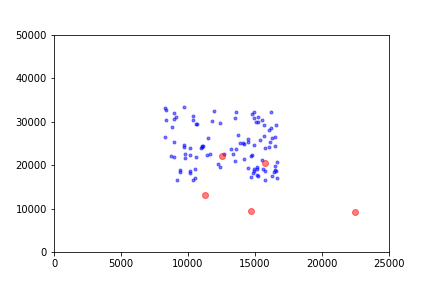
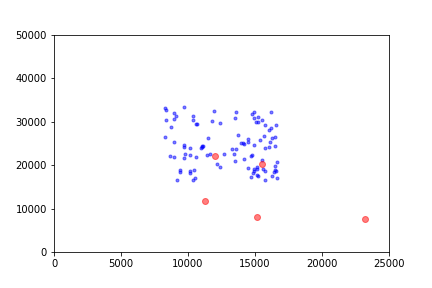
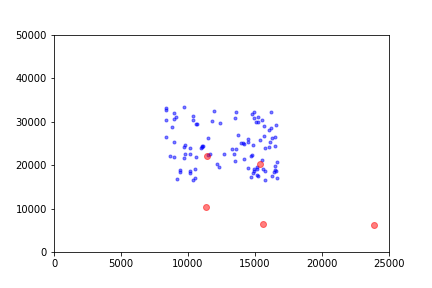
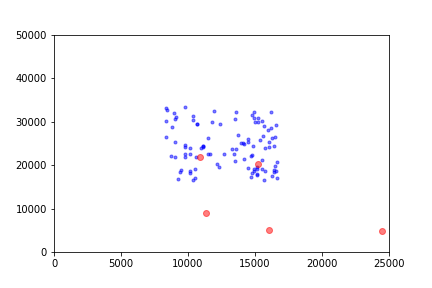
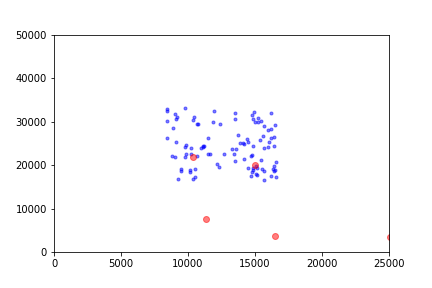
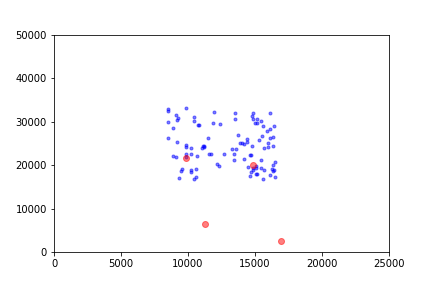
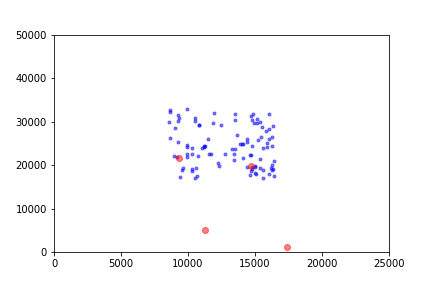
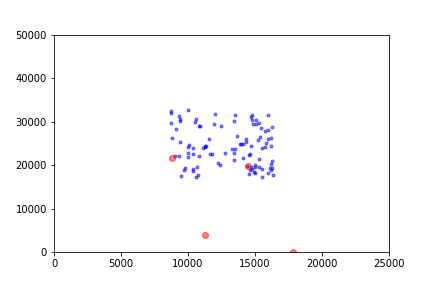
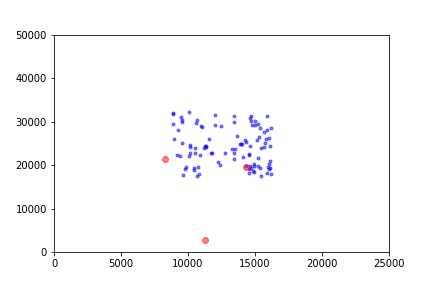
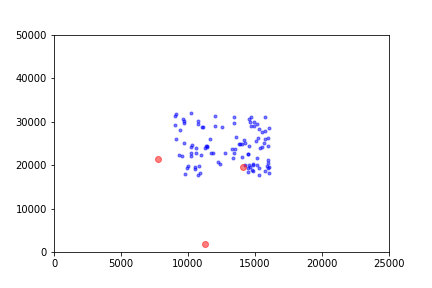
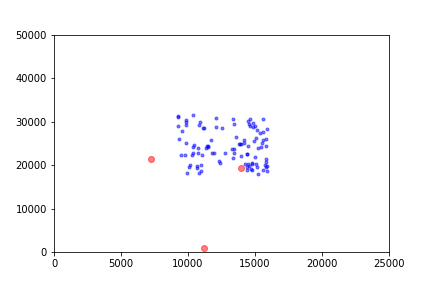
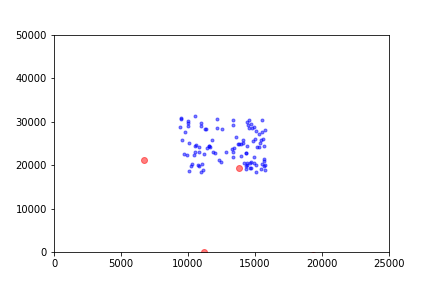
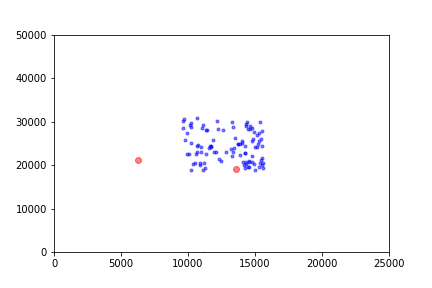
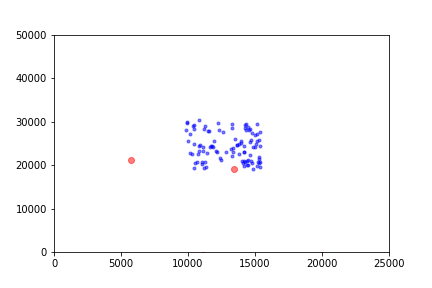
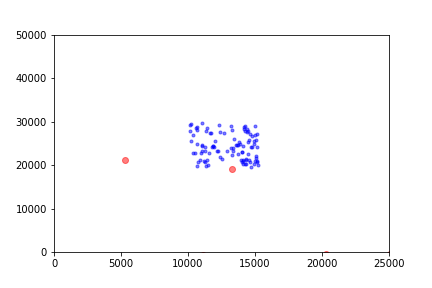
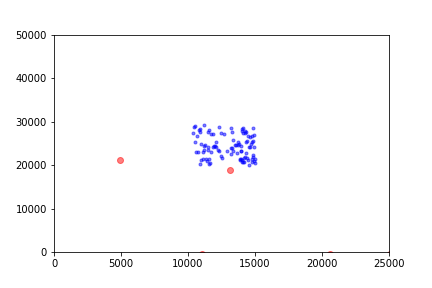
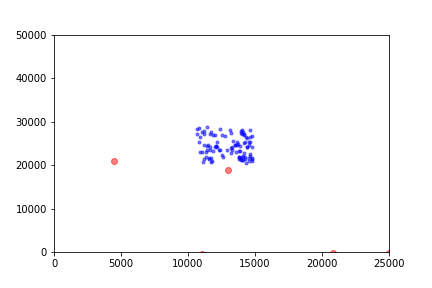
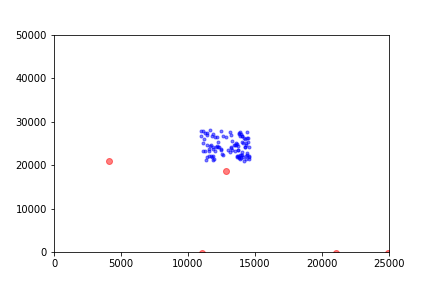
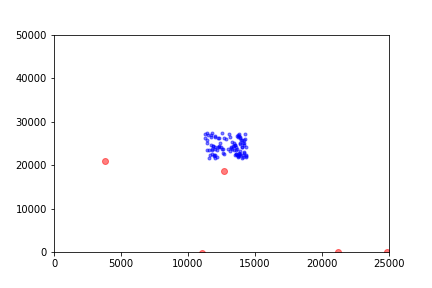
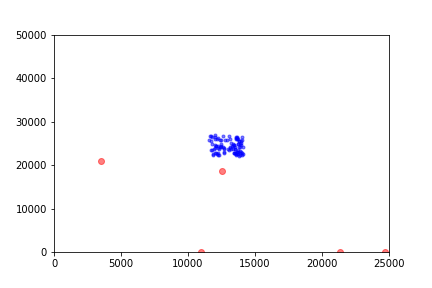
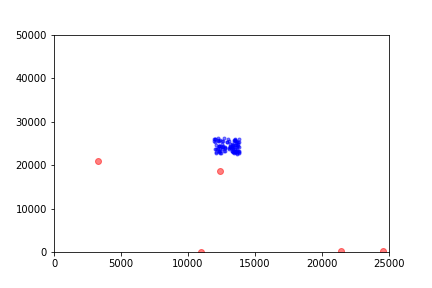
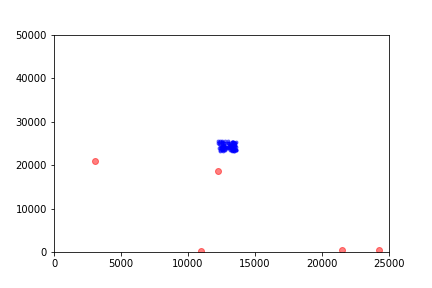
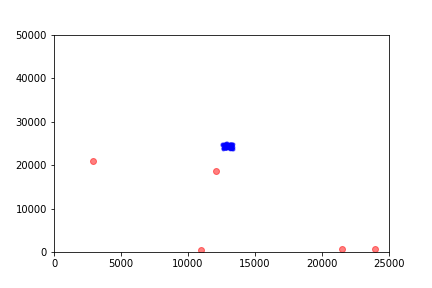
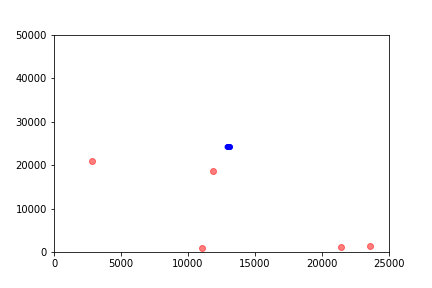
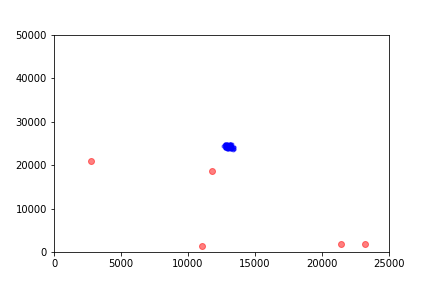
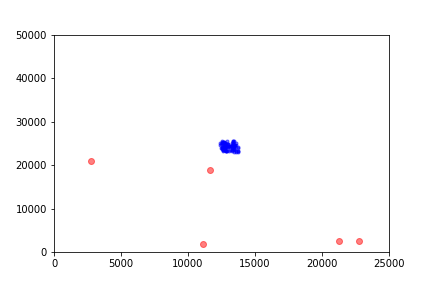
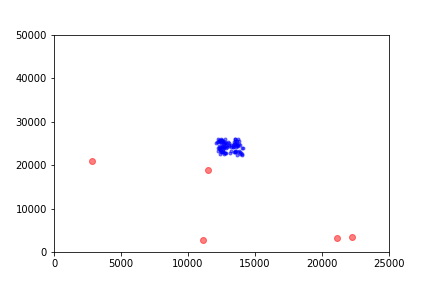
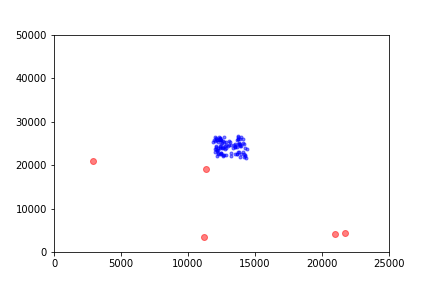
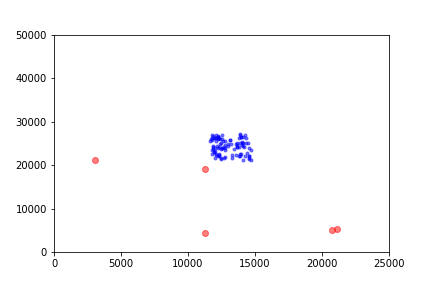
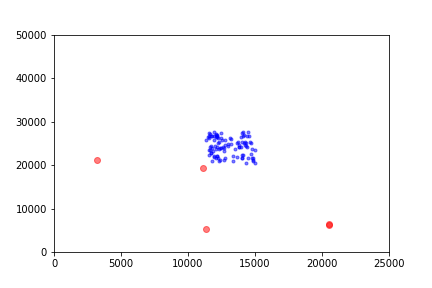
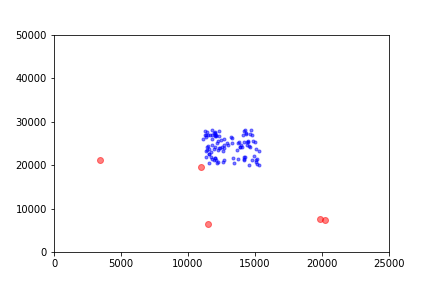
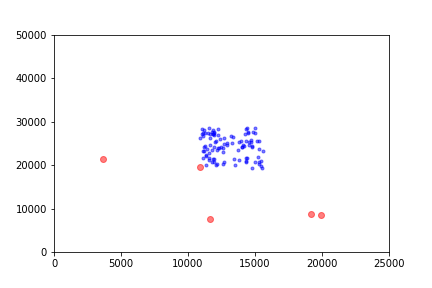
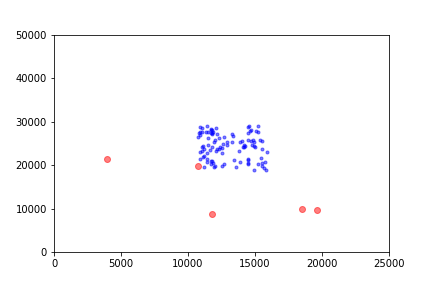
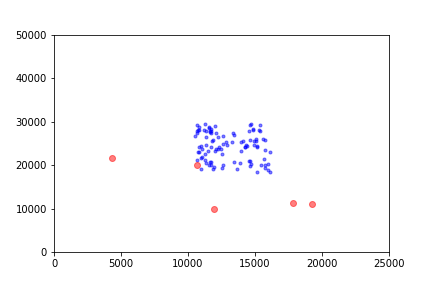
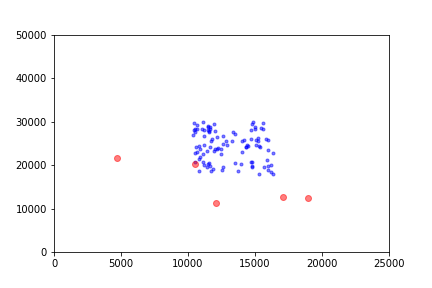
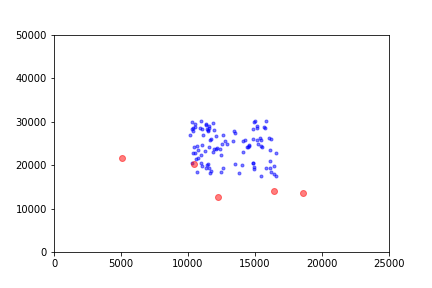
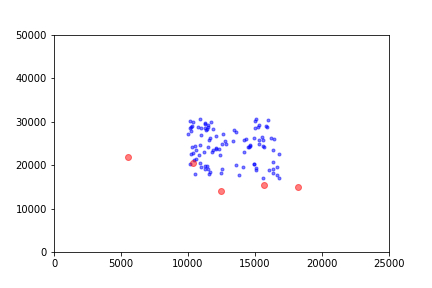
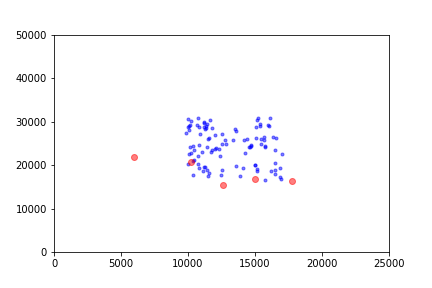
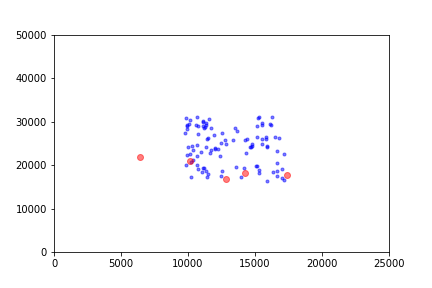
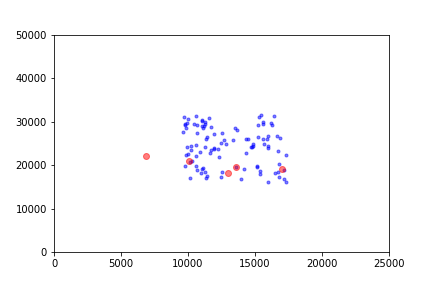
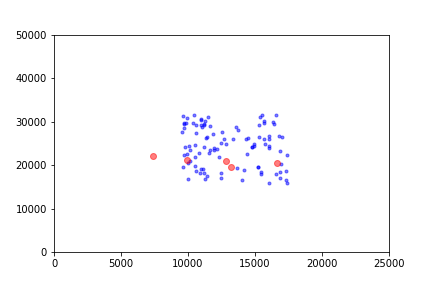
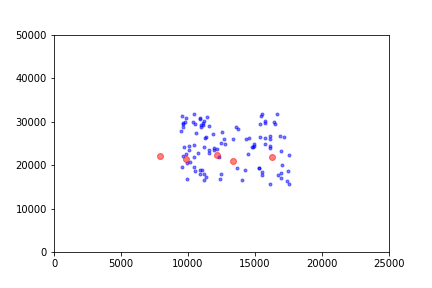
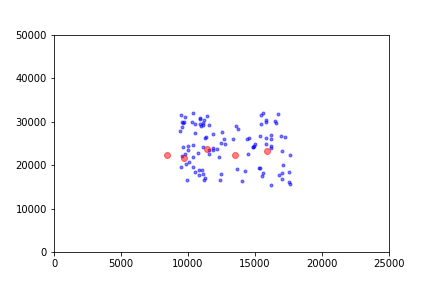
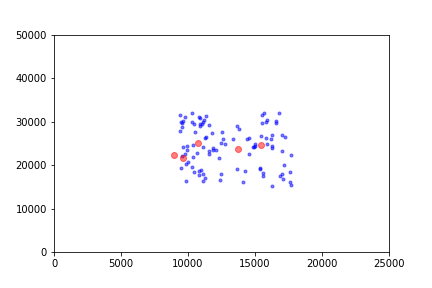
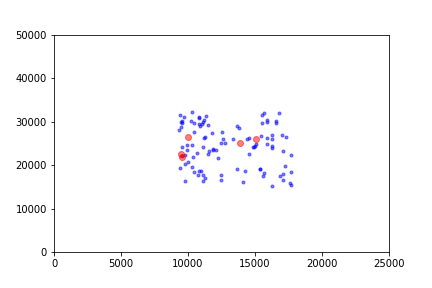
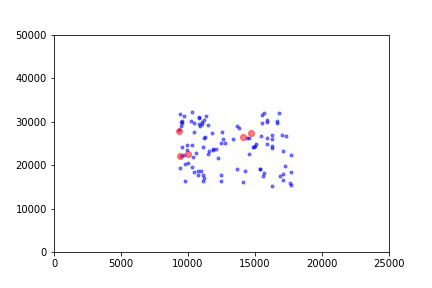
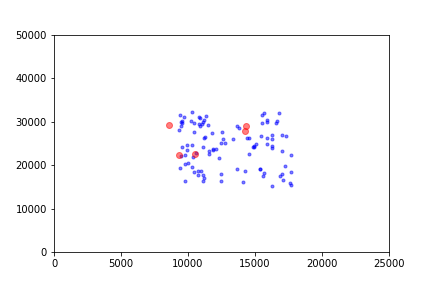
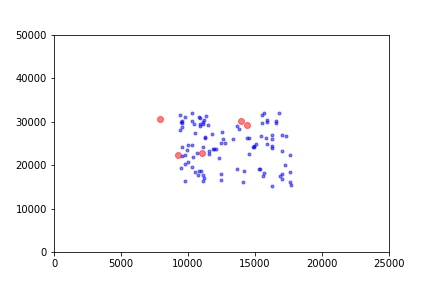
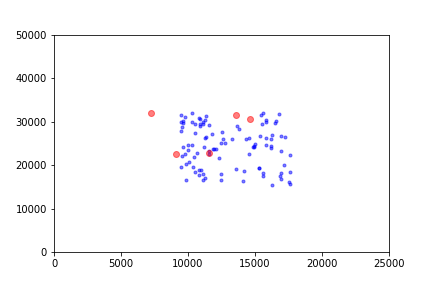
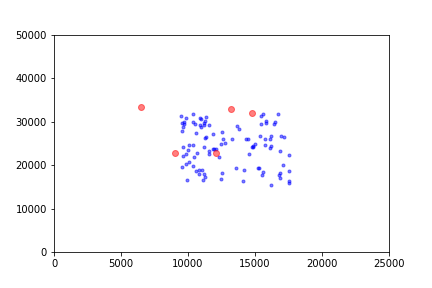
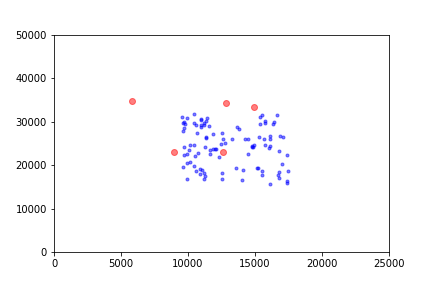
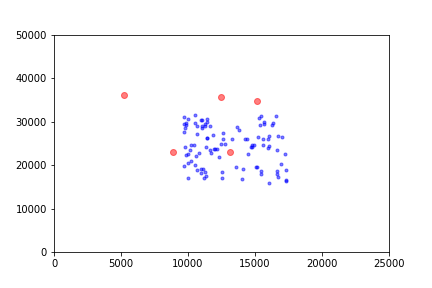
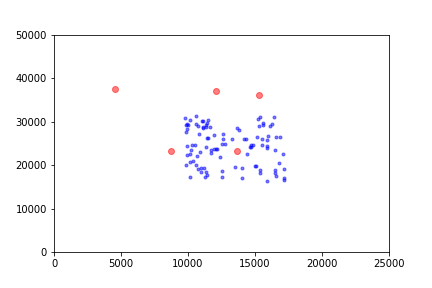
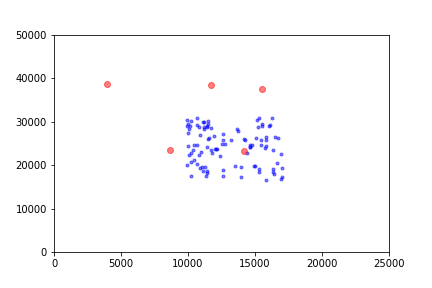
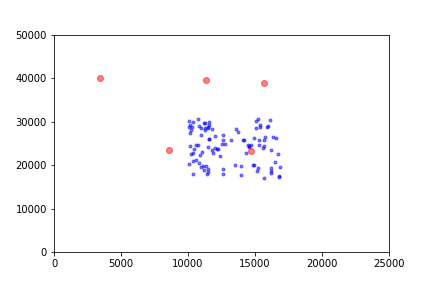
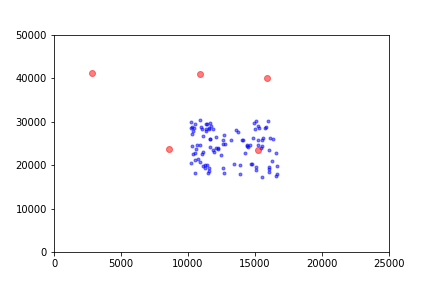
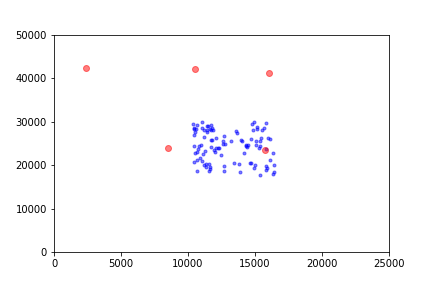
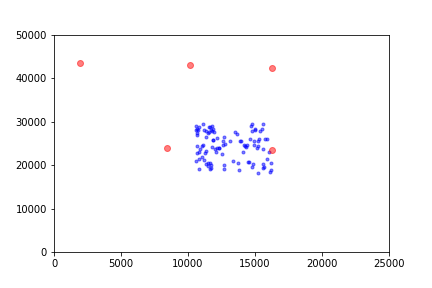
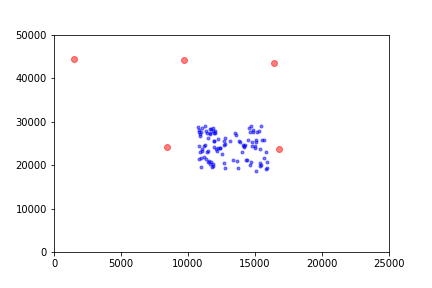
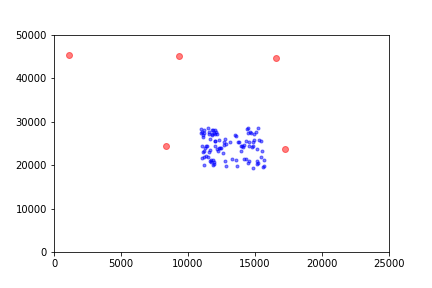
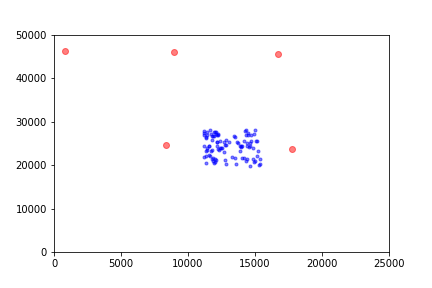
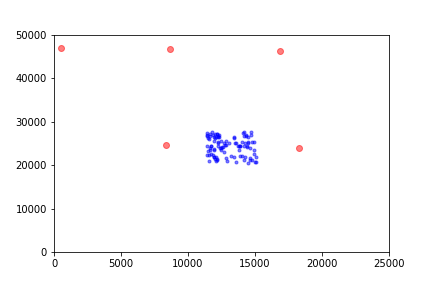
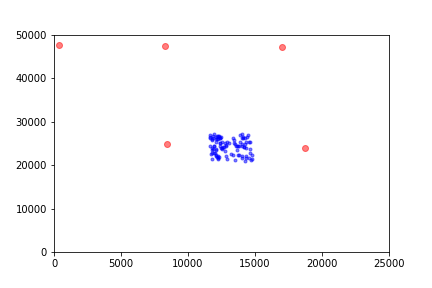
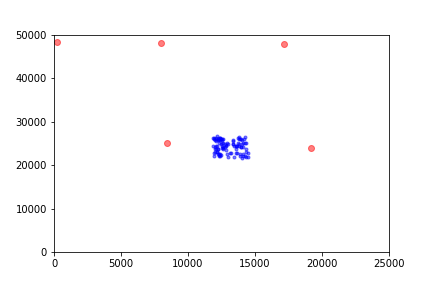
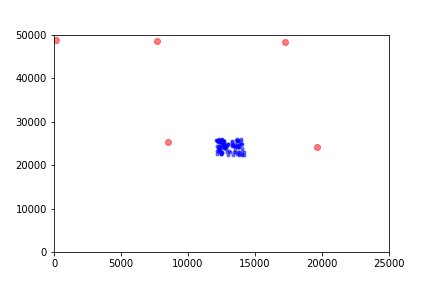

In [10]:
anim2=animation.FuncAnimation(figure, sec_animate,
                             frames=150, interval=50)

anim2

In [11]:
def third_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities):
                
    lonliness = 0.01
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_boid_holder = []
        for kkkk in range(BOIDpositions.shape[1]):
            distance_to_nearest_boid = np.linalg.norm(BOIDpositions[:,kkkk] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_boid_holder.append(distance_to_nearest_boid)
        distance_to_nearest_boid_holder = np.asarray(distance_to_nearest_boid_holder)
        ind = np.argpartition(distance_to_nearest_boid_holder, -25)[-25:]
        ind = np.append(ind, k)
        part_center_of_mass = np.mean(np.delete(BOIDpositions, ind, axis=1), axis=1)
        center_of_mass = np.mean(np.delete(BOIDpositions, k, axis=1), axis=1)
        direction_to_part_center_of_mass = BOIDpositions[:,k] - part_center_of_mass
        direction_to_center_of_mass = BOIDpositions[:,k] - center_of_mass
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_part_center_of_mass * lonliness 
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_center_of_mass * lonliness 
        
    fear_of_predator = 0.001
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_pred_holder = []
        for kpred in range(PREDpositions.shape[1]):
            distance_to_nearest_pred = np.linalg.norm(PREDpositions[:,kpred] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_pred_holder.append(distance_to_nearest_pred)
        distance_to_nearest_pred_holder = np.asarray(distance_to_nearest_pred_holder)
        nearest_pred_index = distance_to_nearest_pred_holder.argmin()            
        direction_to_nearest_pred = BOIDpositions[:,k] - PREDpositions[:, nearest_pred_index]
        BOIDvelocities[:,k] = BOIDvelocities[:,k] + (direction_to_nearest_pred) * fear_of_predator
    
    hunger_of_predator = 0.001
    for kpred in range(PREDpositions.shape[1]):
        distance_to_nearest_prey_holder = []
        for k in range(BOIDpositions.shape[1]):
            distance_to_nearest_prey = np.linalg.norm(BOIDpositions[:,k] - PREDpositions[:,kpred], ord=2)
            distance_to_nearest_prey_holder.append(distance_to_nearest_prey)
        distance_to_nearest_prey_holder = np.asarray(distance_to_nearest_prey_holder)
        nearest_prey_index = distance_to_nearest_prey_holder.argmin()
        direction_to_nearest_prey = PREDpositions[:, kpred] - BOIDpositions[:,nearest_prey_index]
        PREDvelocities[:,kpred] = PREDvelocities[:,kpred] - direction_to_nearest_prey * hunger_of_predator
        

    max_BOID_vel = 200
    max_PRED_vel = 200
    
    for i in range(BOIDvelocities.shape[1]):
        curr_BOID_vel = np.linalg.norm(BOIDvelocities[:,i])
        if BOIDpositions[0][i] >= pos_limits[0]:
            BOIDvelocities[:,i][0] = -10                        #BOIDvelocities[:,i][0] * (pos_limits[0] - BOIDpositions[0][i])
        if BOIDpositions[1][i] >= pos_limits[1]:
            BOIDvelocities[:,i][1] =  -10                       #BOIDvelocities[:,i][1] * (pos_limits[1] - BOIDpositions[1][i])
        if BOIDpositions[0][i] <= 0:
            BOIDvelocities[:,i][0] = 10
        if BOIDpositions[1][i] <= 0:
            BOIDvelocities[:,i][1] = 10
        if curr_BOID_vel > max_BOID_vel:
            BOIDvelocities[:,i] = BOIDvelocities[:,i] * max_BOID_vel / curr_BOID_vel
            
    for i in range(PREDvelocities.shape[1]):
        curr_PRED_vel = np.linalg.norm(PREDvelocities[:,i])
        if PREDpositions[0][i] >= pos_limits[0]:
            PREDvelocities[:,i][0] = -10                        #PREDvelocities[:,i][0] * (pos_limits[0] - PREDpositions[0][i])
        if PREDpositions[1][i] >= pos_limits[1]:
            PREDvelocities[:,i][1] = -10                        #PREDvelocities[:,i][1] * (pos_limits[1] - PREDpositions[1][i])
        if PREDpositions[0][i] <= 0:
            PREDvelocities[:,i][0] = 10
        if PREDpositions[1][i] <= 0:
            PREDvelocities[:,i][1] = 10
        if curr_PRED_vel > max_PRED_vel:
            PREDvelocities[:,i] = PREDvelocities[:,i] * max_PRED_vel / curr_PRED_vel
        
    BOIDpositions += BOIDvelocities

    PREDpositions += PREDvelocities

def third_animate(frame):
    third_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities)
    BOIDscatter.set_offsets(BOIDpositions.T)
    PREDscatter.set_offsets(PREDpositions.T)

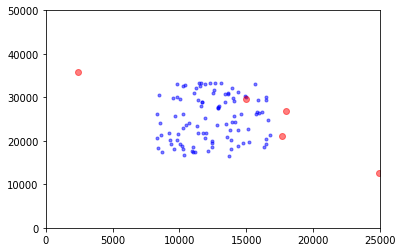

In [12]:
BOIDpositions = init_new_flock(dimensions=dimensions,
                           number_of_boids=number_of_boids,
                           lower_limit = np.asarray([(pos_limits[0]/2)-(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)-(0.341/2)*pos_limits[1]]),
                           upper_limit = np.asarray([(pos_limits[0]/2)+(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)+(0.341/2)*pos_limits[1]]))

PREDpositions = init_new_flock(dimensions=dimensions,
                              number_of_boids=number_of_pred,
                              lower_limit = np.asarray([0,0]),
                              upper_limit = np.asarray(pos_limits))

BOIDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_boids,
                            lower_limit = np.asarray([-10,-10]),
                            upper_limit = np.asarray([10,10]))

PREDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_pred,
                            lower_limit = np.asarray([-5,-5]),
                            upper_limit = np.asarray([5,5]))

figure = plt.figure()
axes = plt.axes(xlim=(0, pos_limits[0]), ylim=(0, pos_limits[1]))
BOIDscatter = axes.scatter(BOIDpositions[0],BOIDpositions[1], marker='.', c = 'blue', alpha=0.5)
PREDscatter = axes.scatter(PREDpositions[0],PREDpositions[1], c = 'red', alpha=0.5)
plt.show()


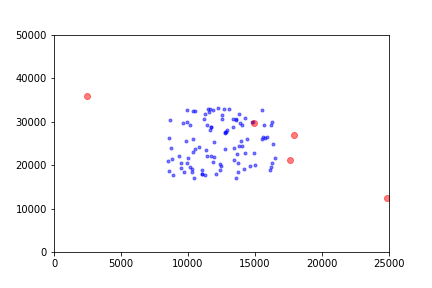
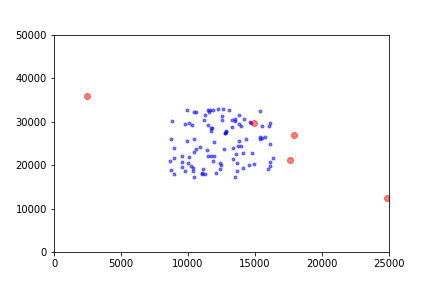
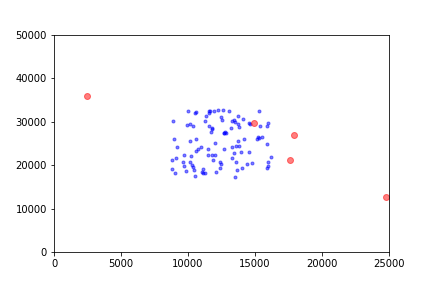
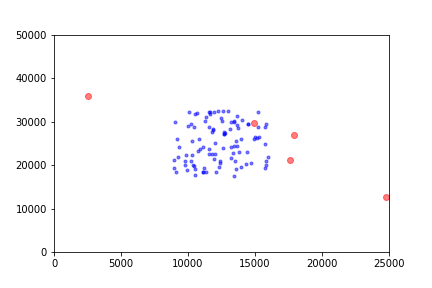
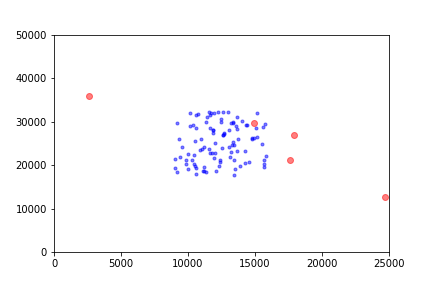
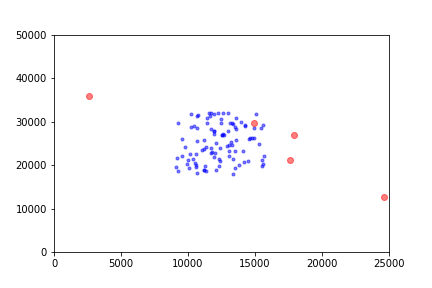
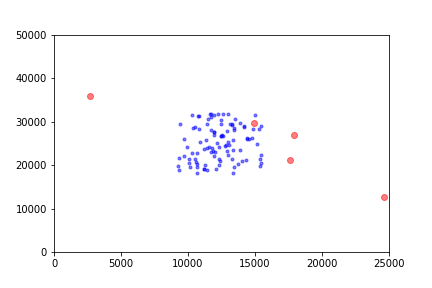
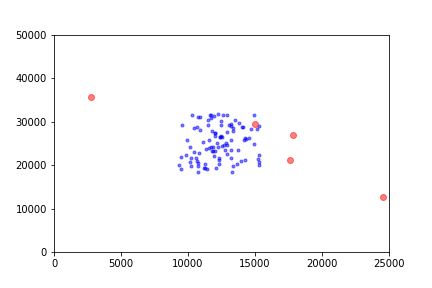
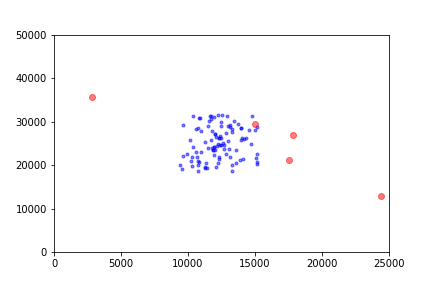
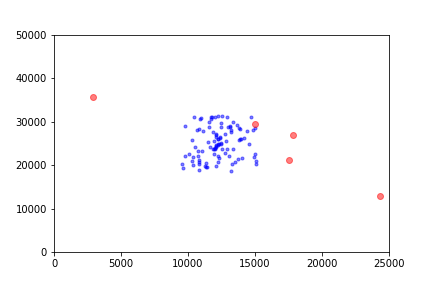
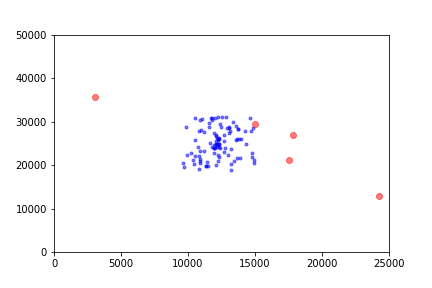
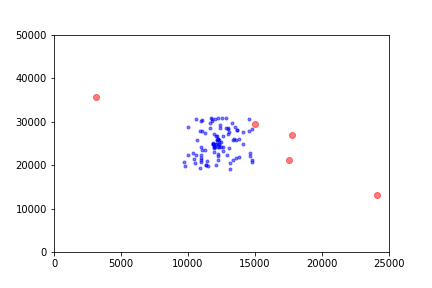
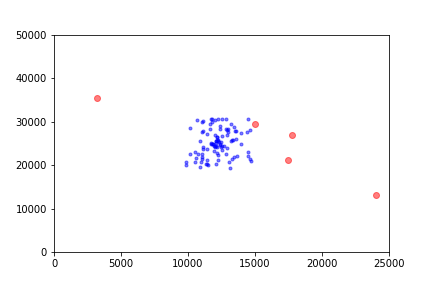
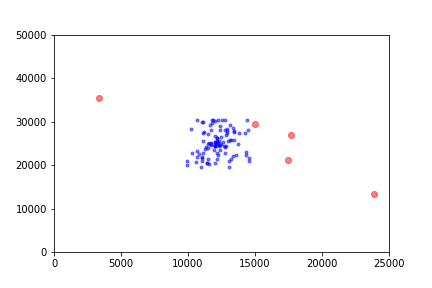
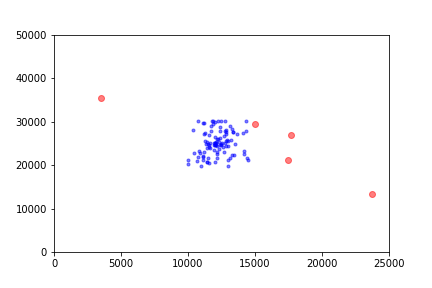
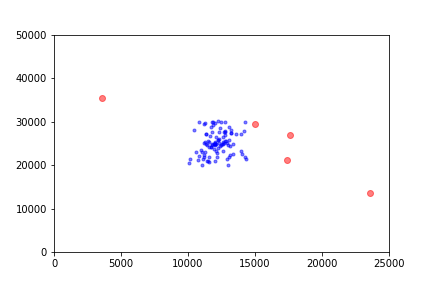
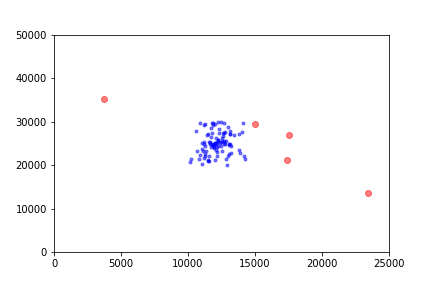
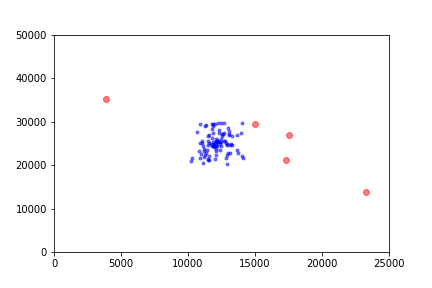
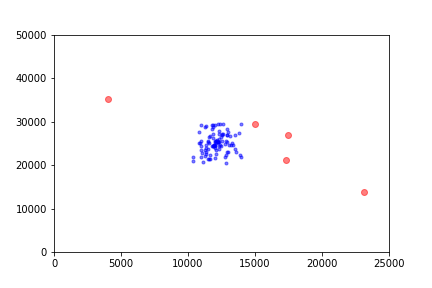
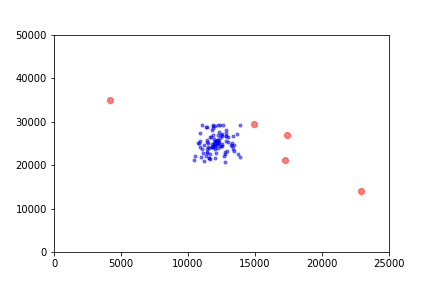
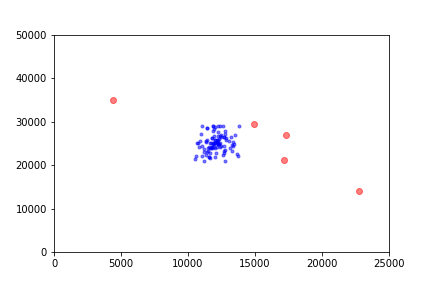
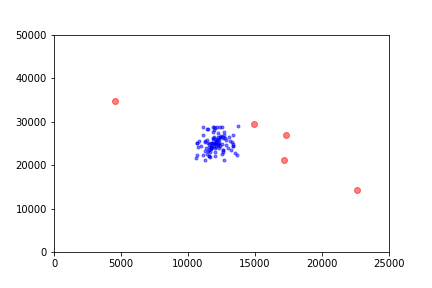
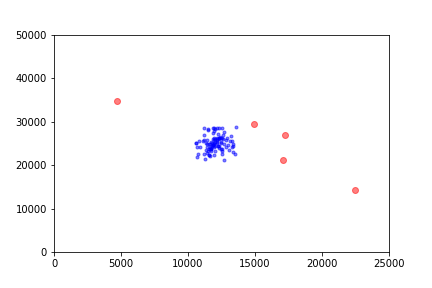
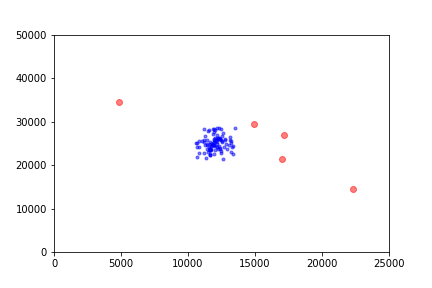
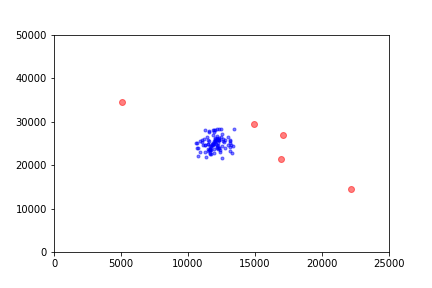
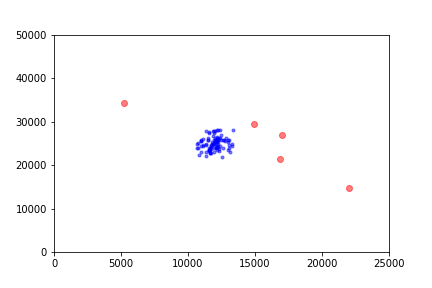
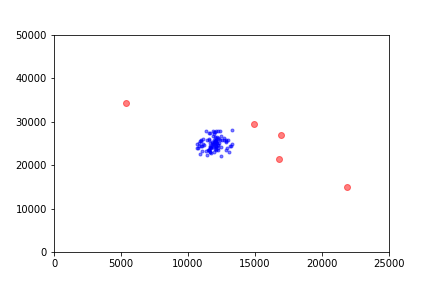
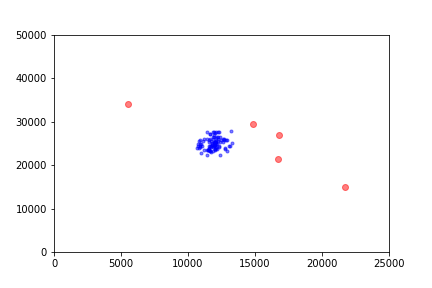
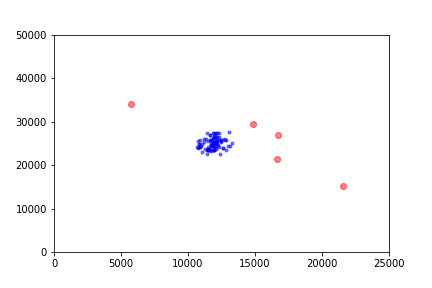
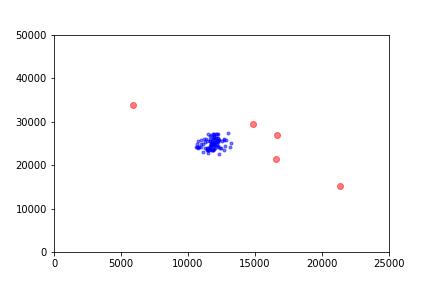
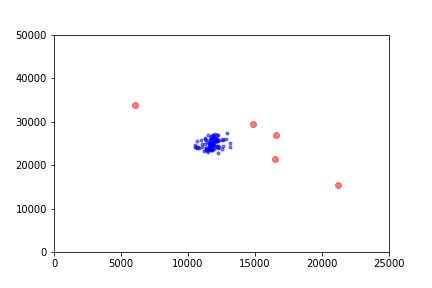
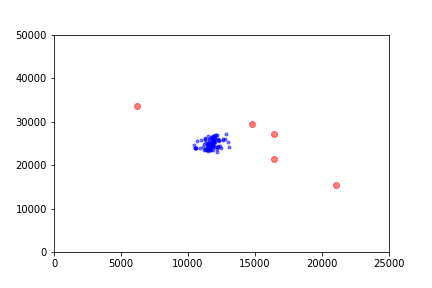
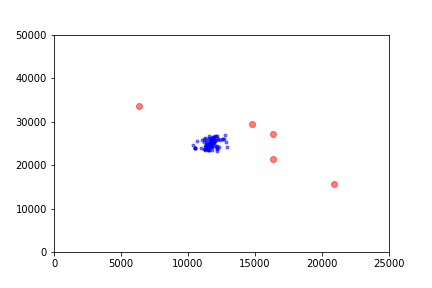
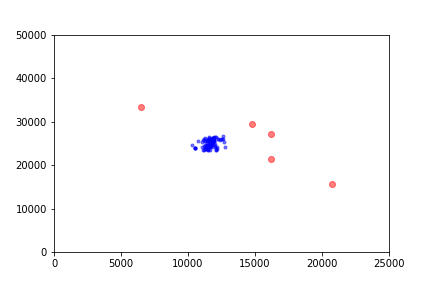
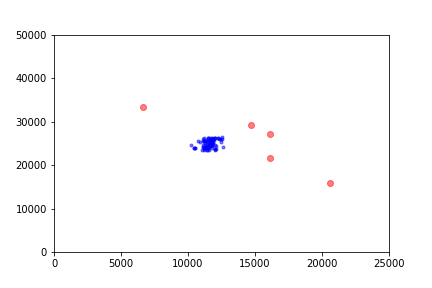
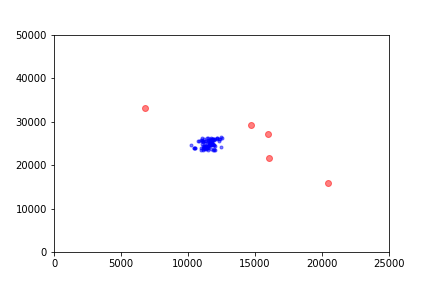
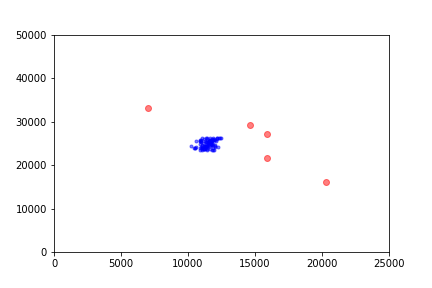
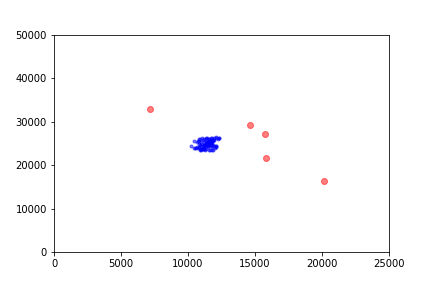
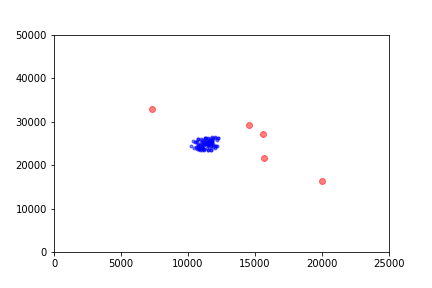
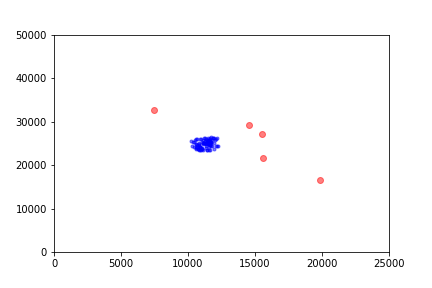
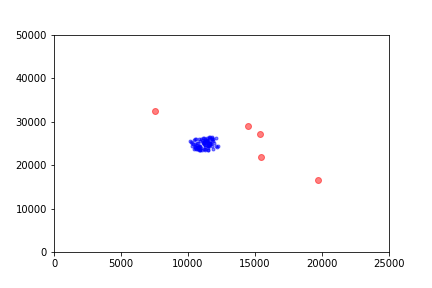
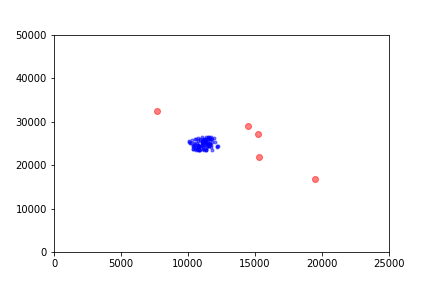
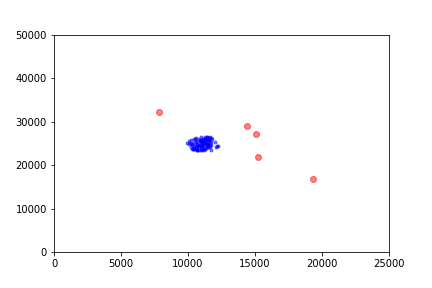
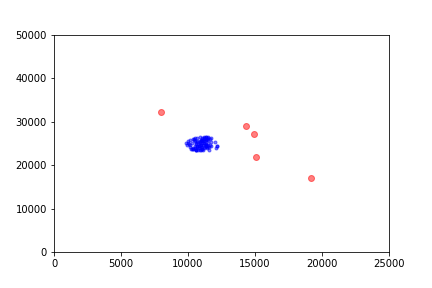
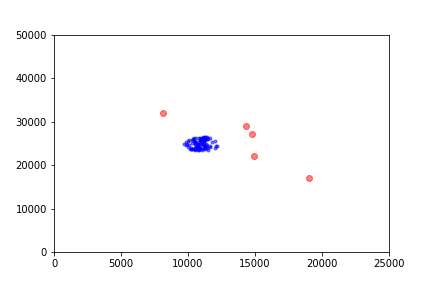
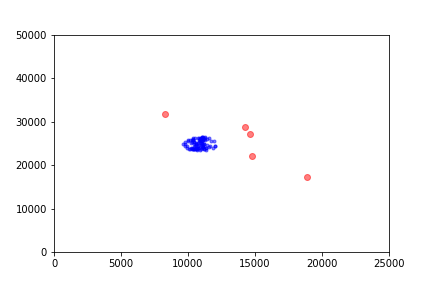
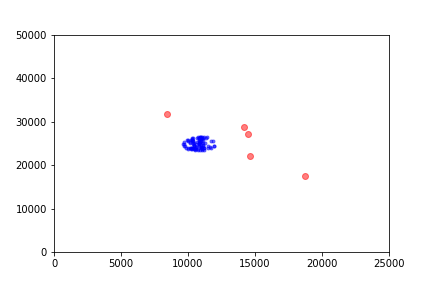
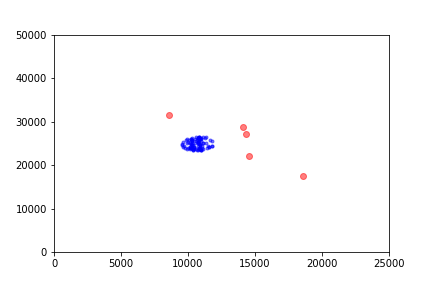
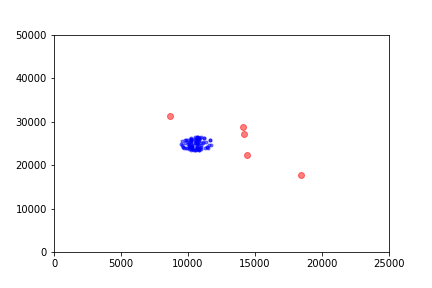
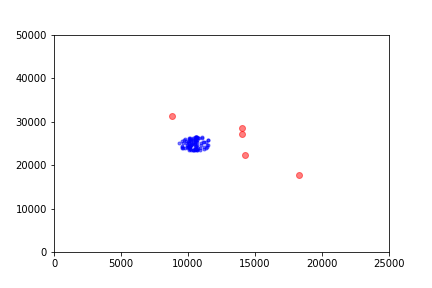
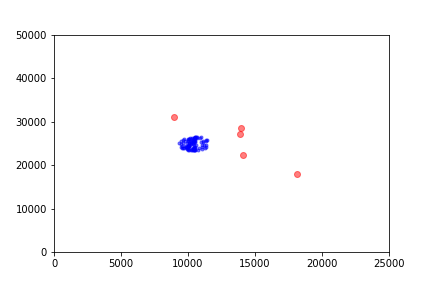
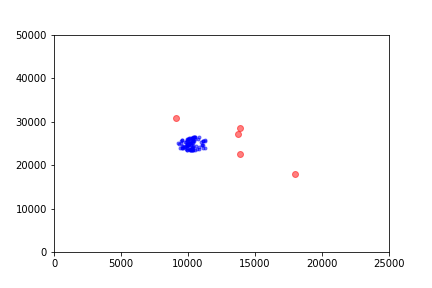
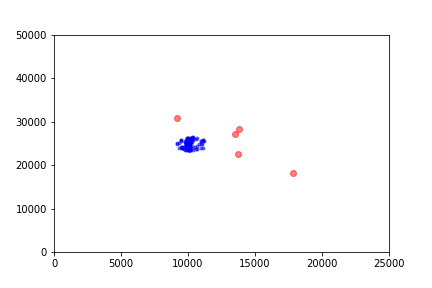
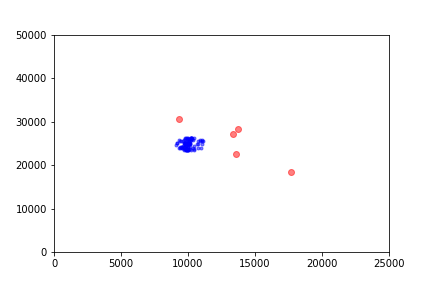
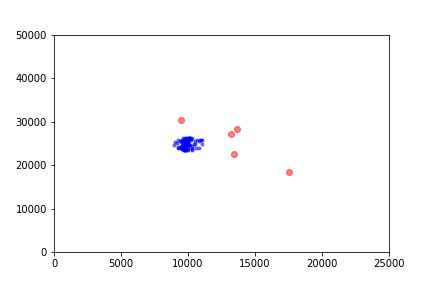
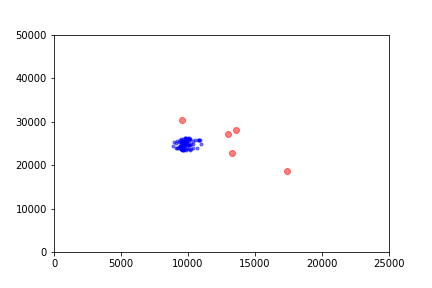
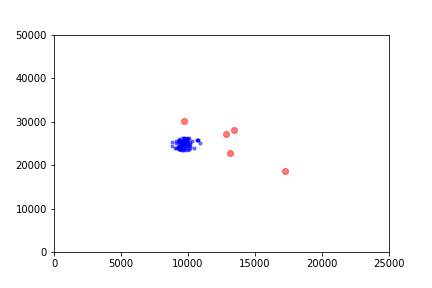
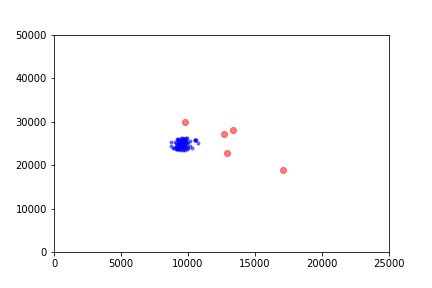
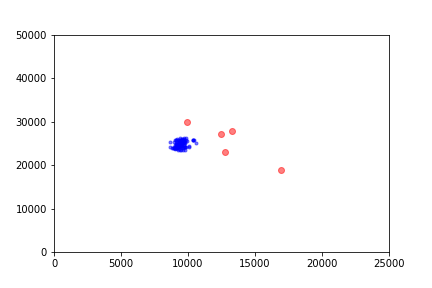
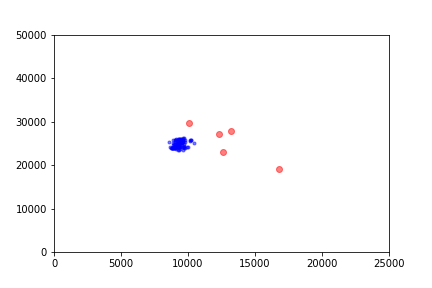
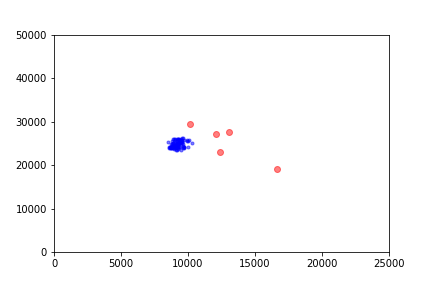
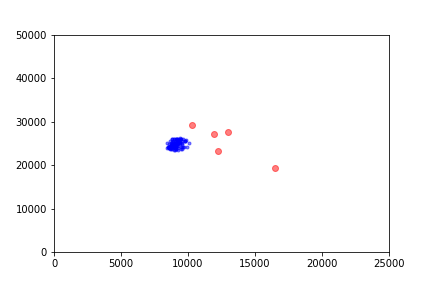
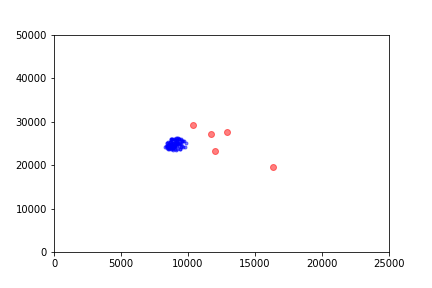
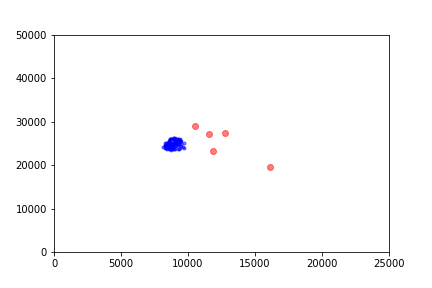
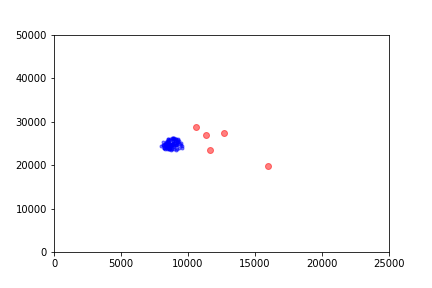
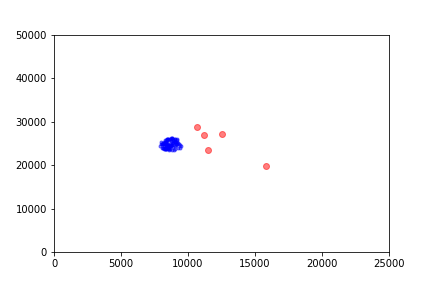
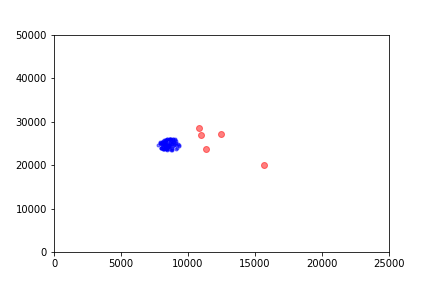
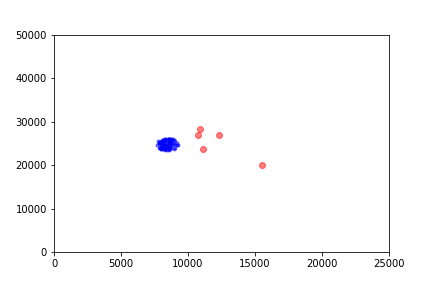
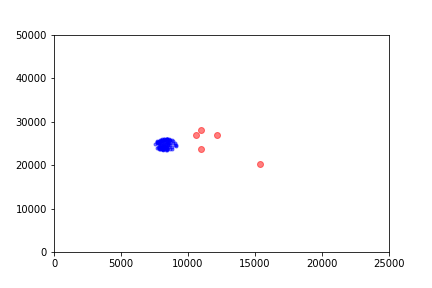
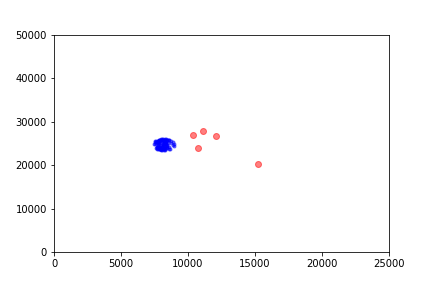
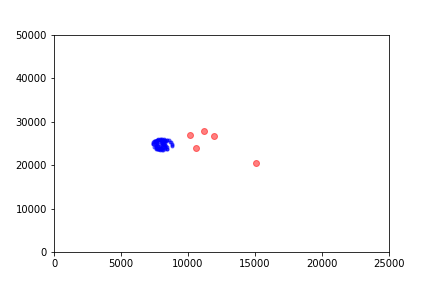
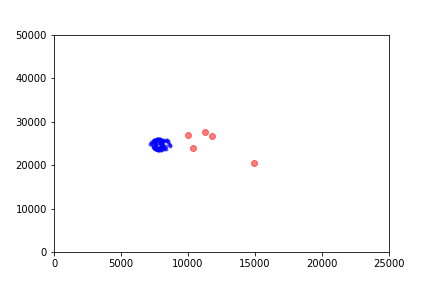
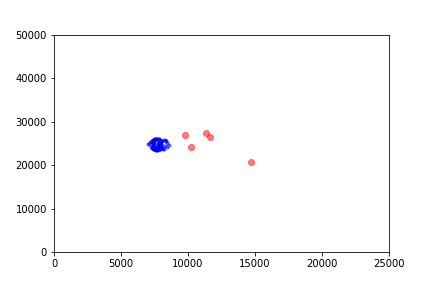
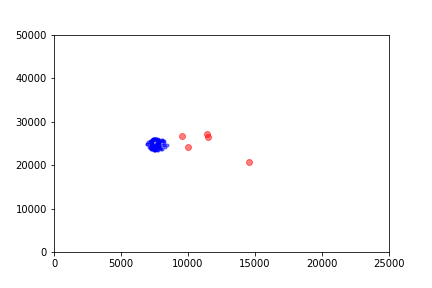
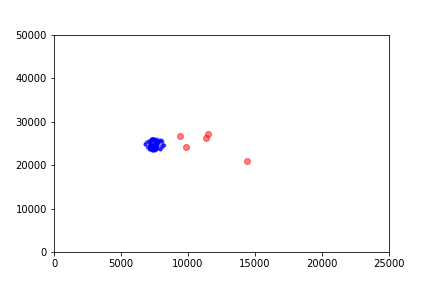
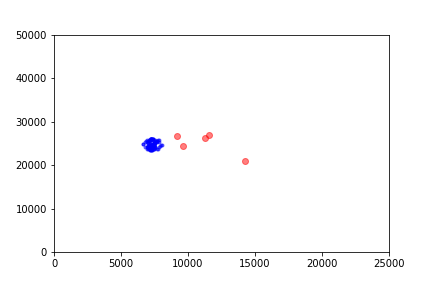
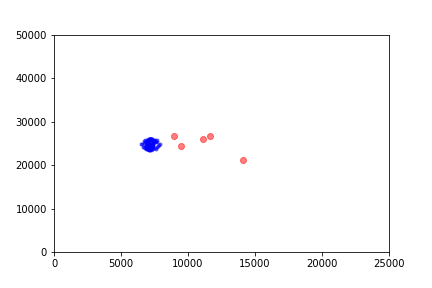
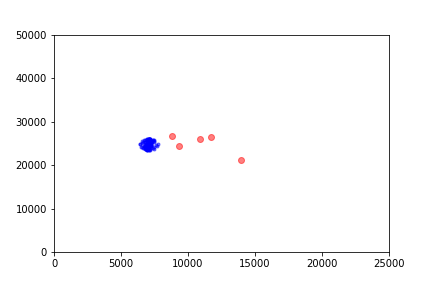
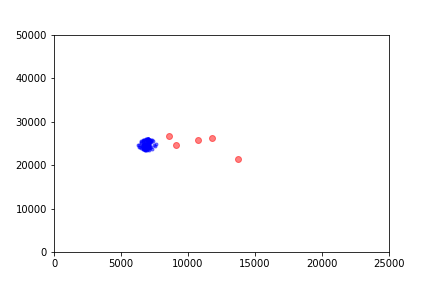
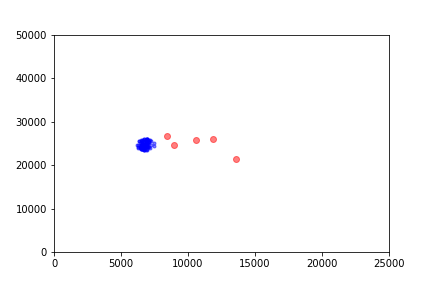
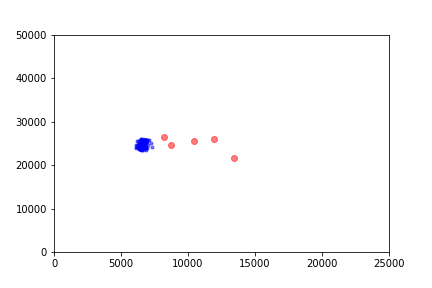
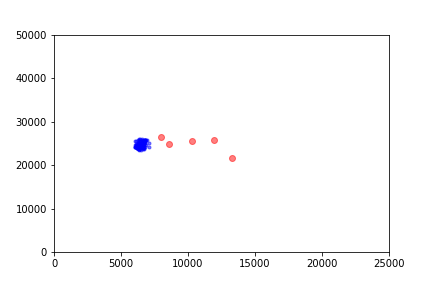
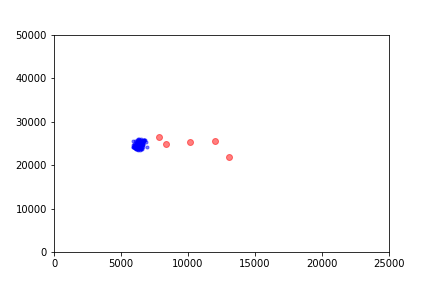
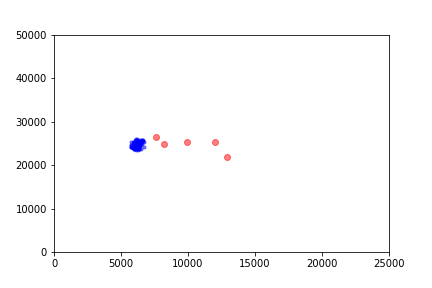
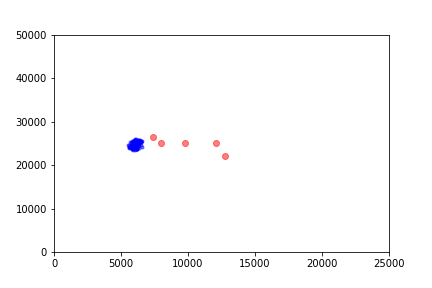
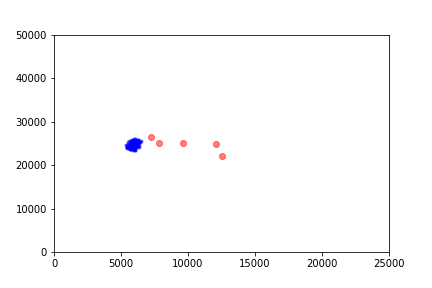
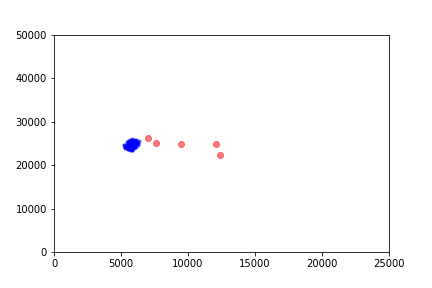
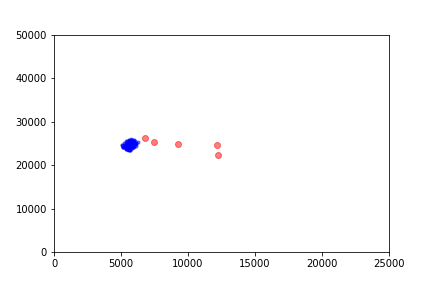
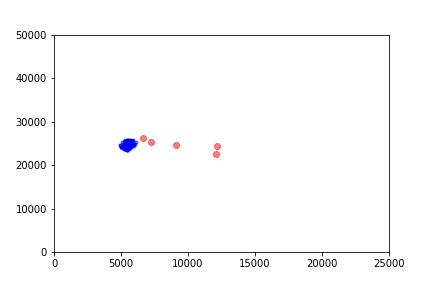
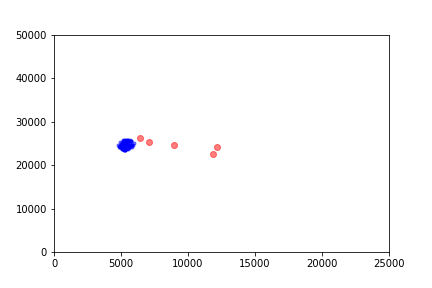
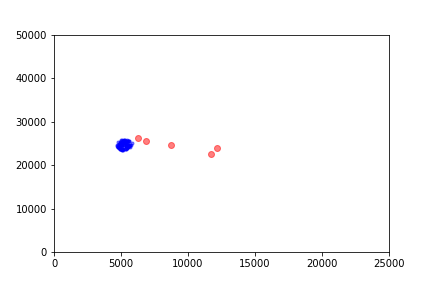
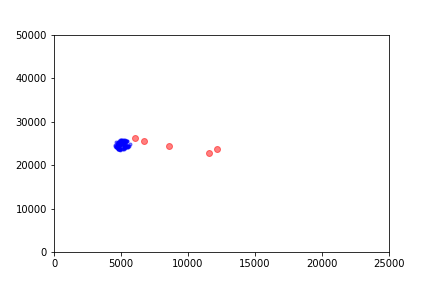
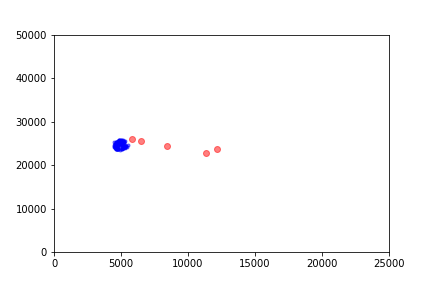
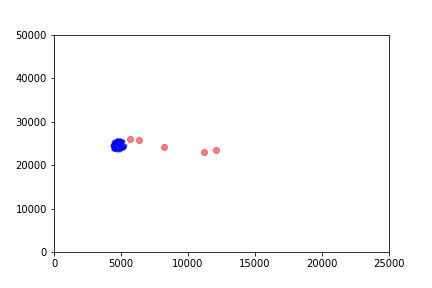
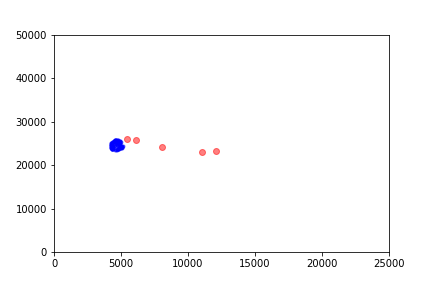
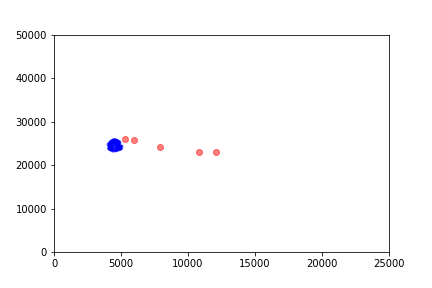
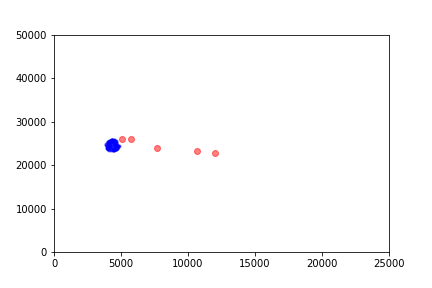
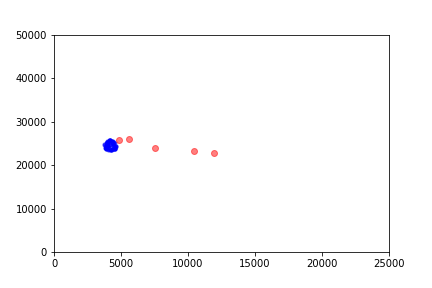
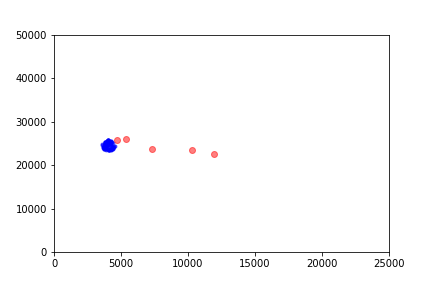
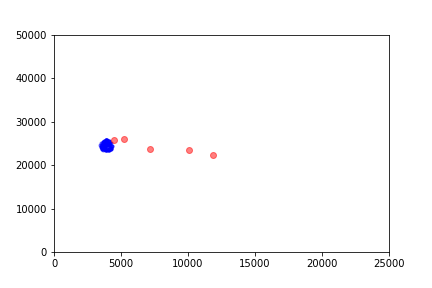
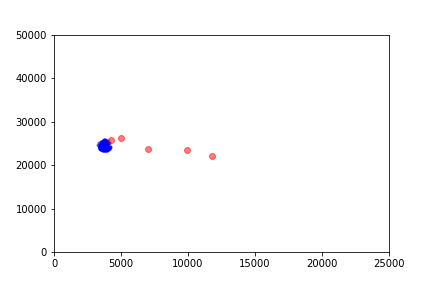
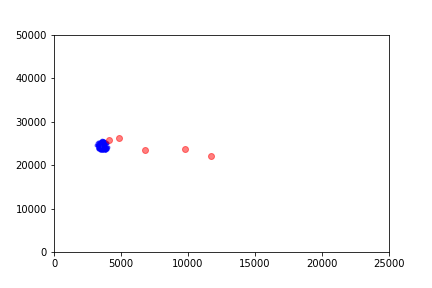
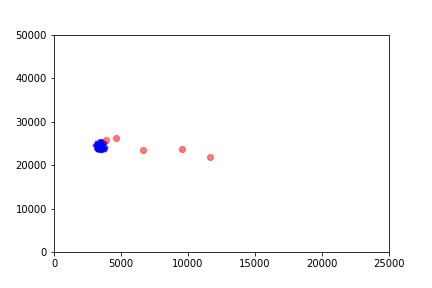
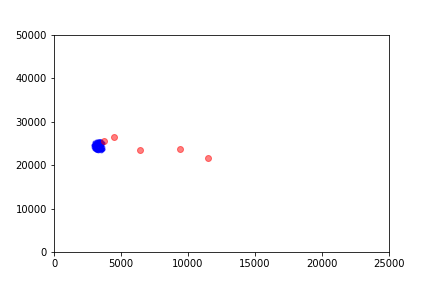
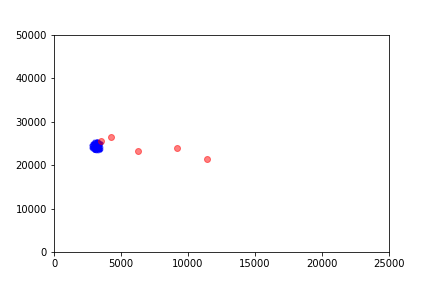
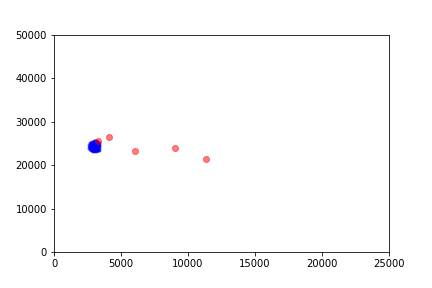
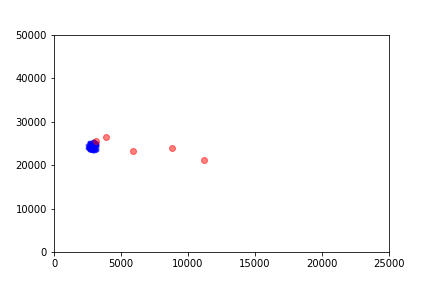
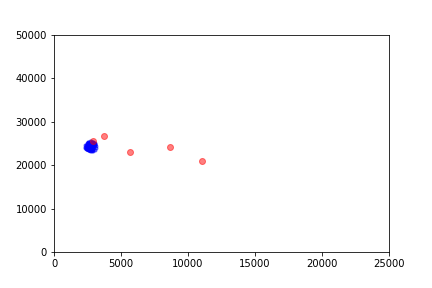
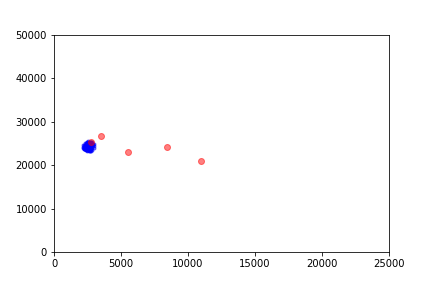
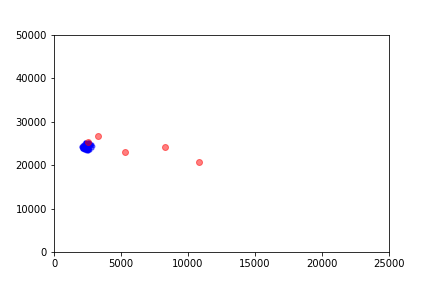
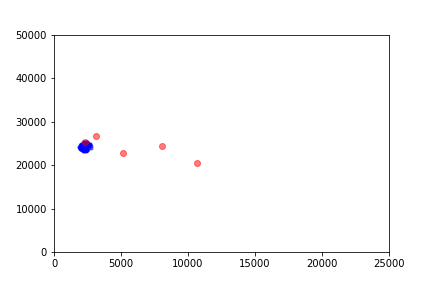
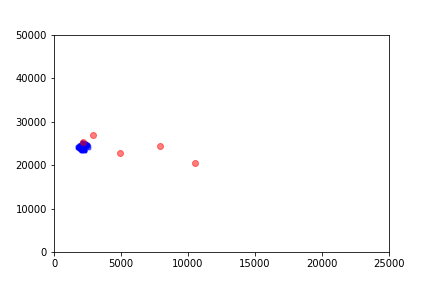
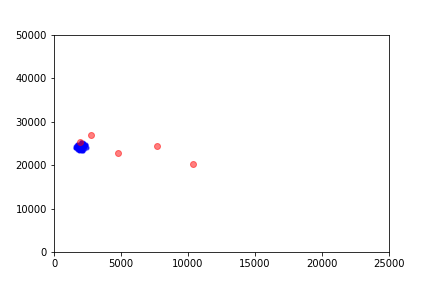
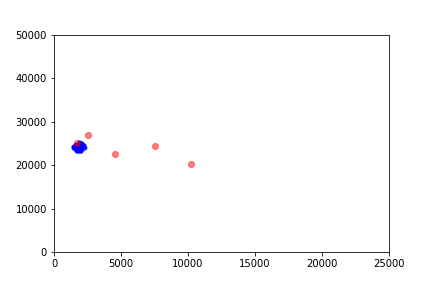
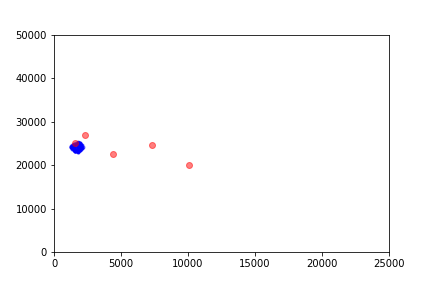
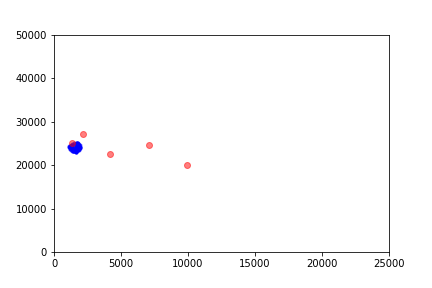
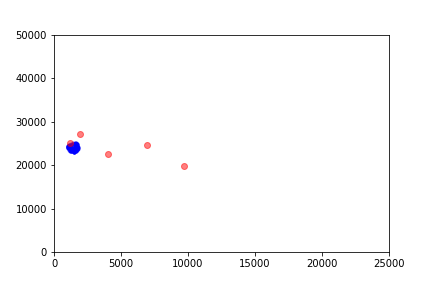
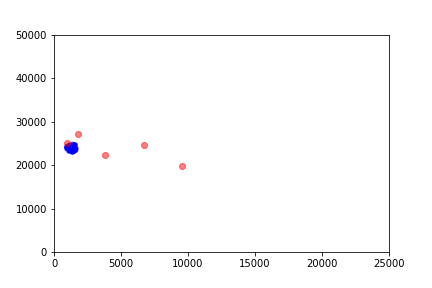
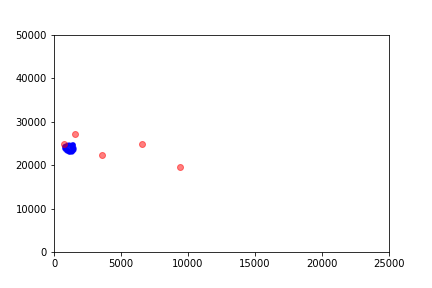
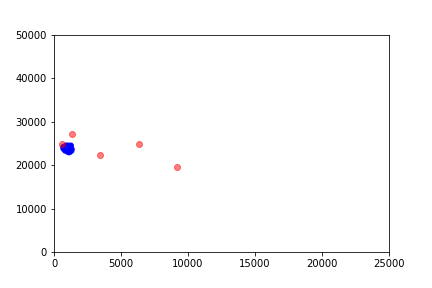
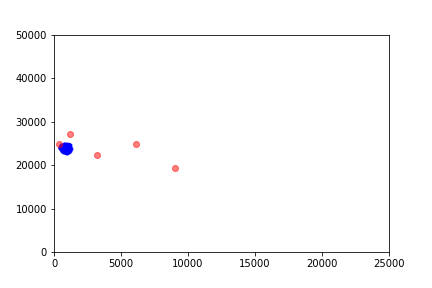
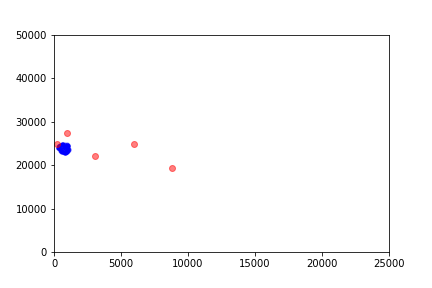
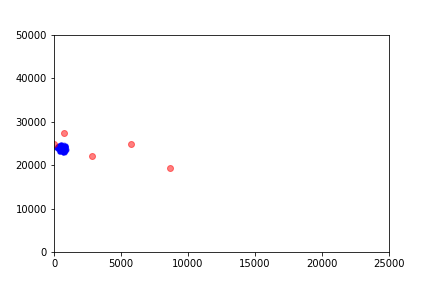
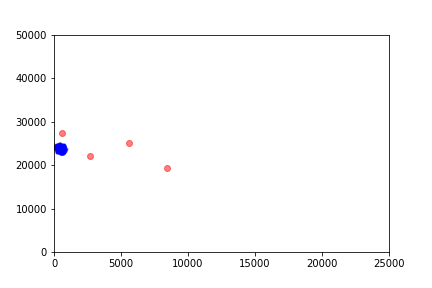
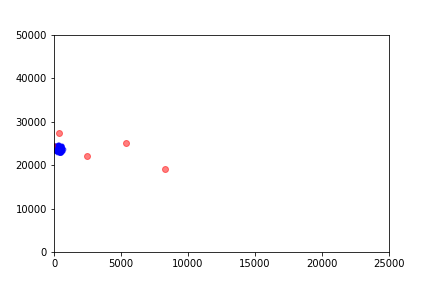
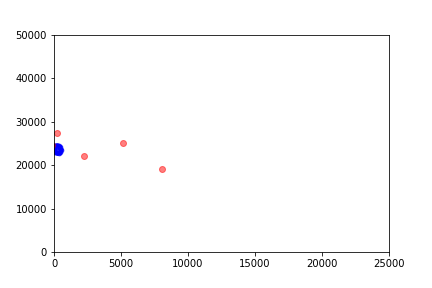
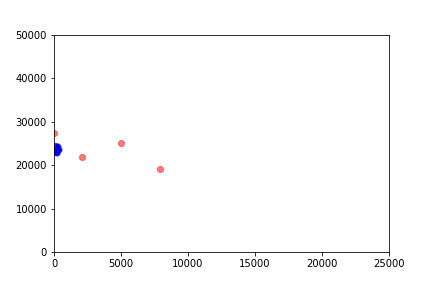
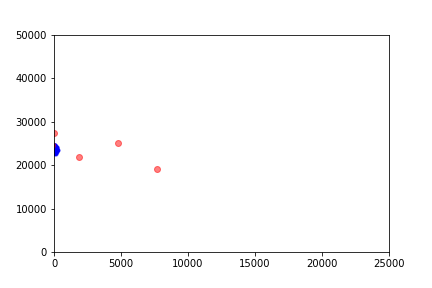
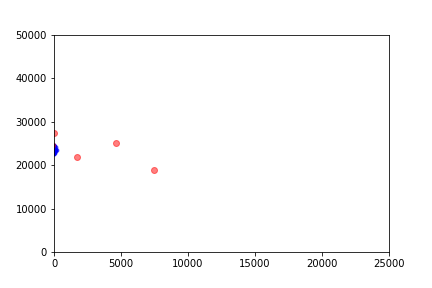
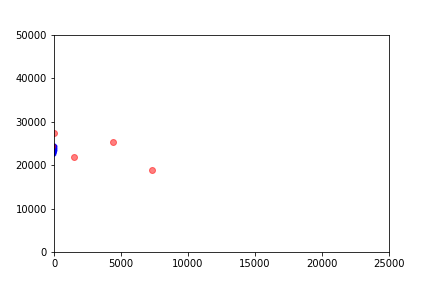
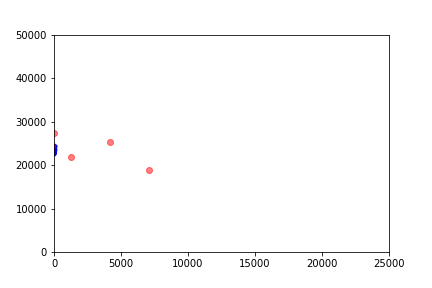
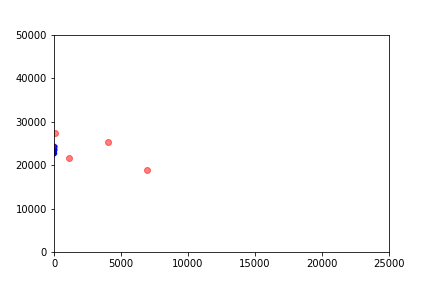
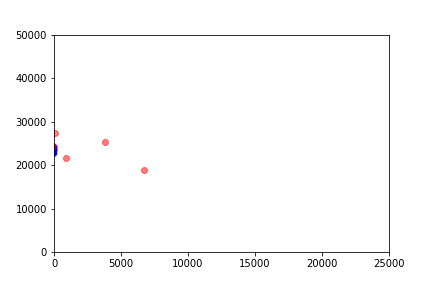
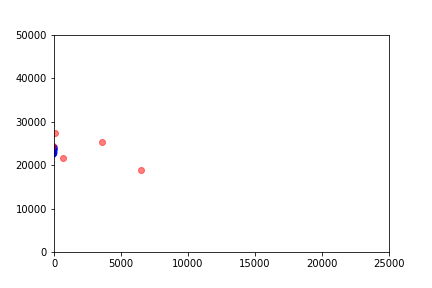
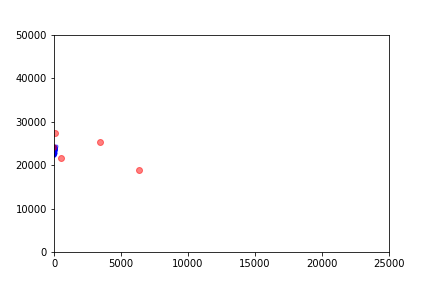
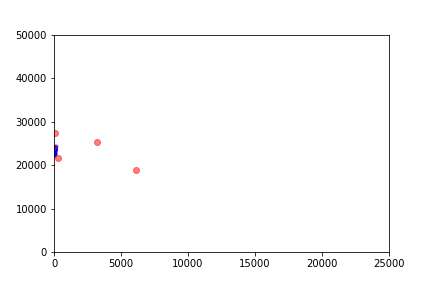
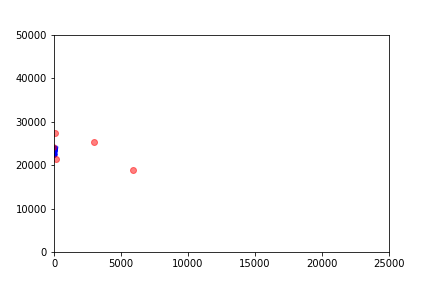
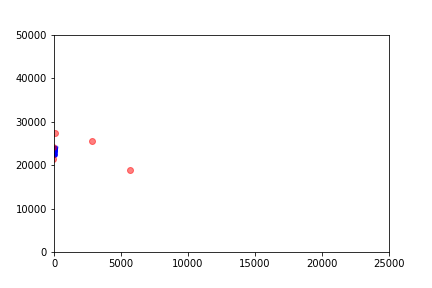
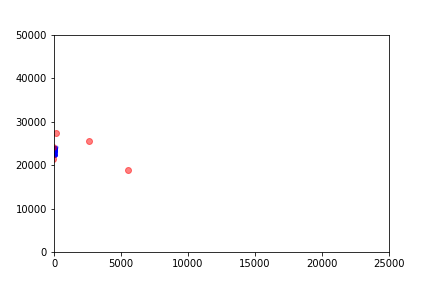
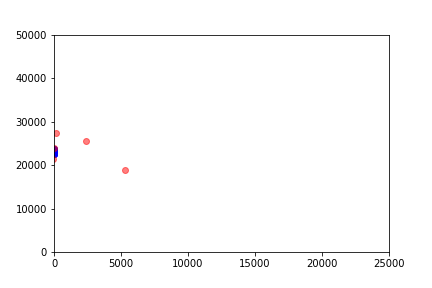
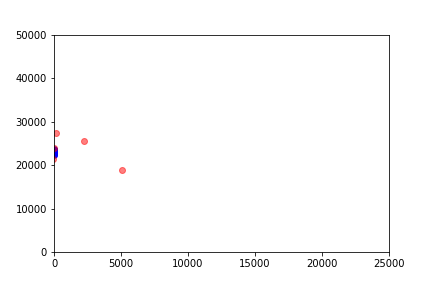
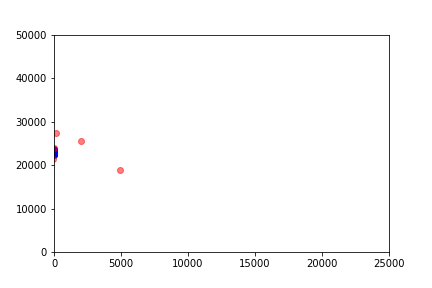
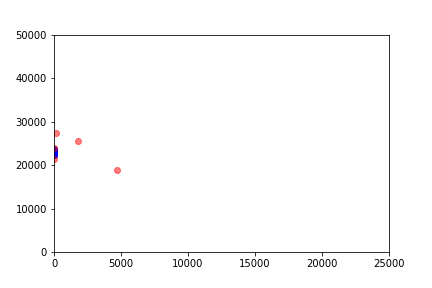
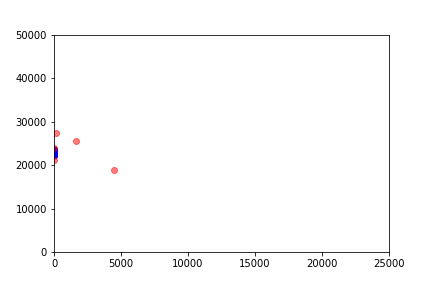
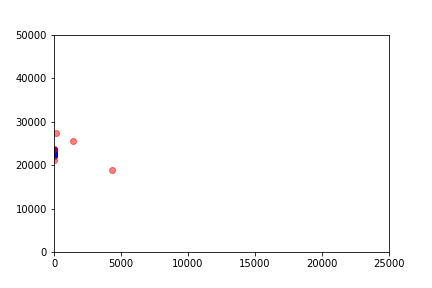
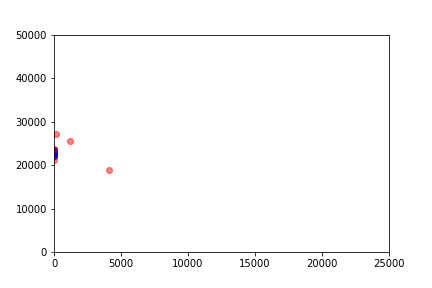
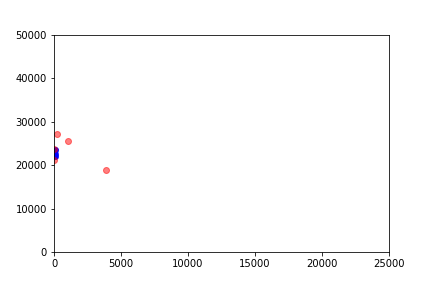
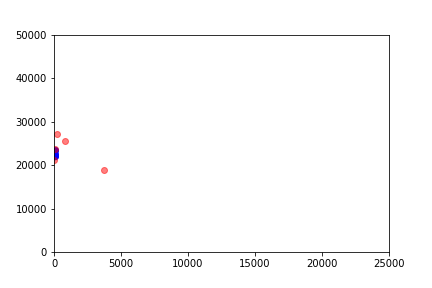
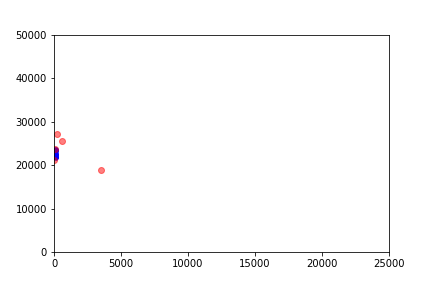
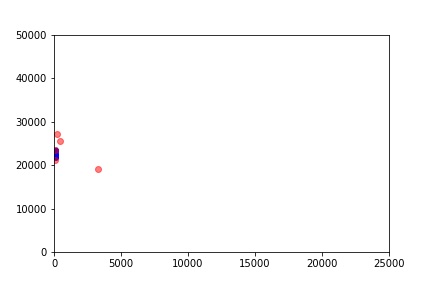

In [13]:
anim3=animation.FuncAnimation(figure, third_animate,
                             frames=150, interval=50)

anim3

In [14]:
def fourth_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities):
                
    lonliness = 0.01
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_boid_holder = []
        for kkkk in range(BOIDpositions.shape[1]):
            distance_to_nearest_boid = np.linalg.norm(BOIDpositions[:,kkkk] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_boid_holder.append(distance_to_nearest_boid)
        distance_to_nearest_boid_holder = np.asarray(distance_to_nearest_boid_holder)
        ind = np.argpartition(distance_to_nearest_boid_holder, -25)[-25:]
        ind = np.append(ind, k)
        part_center_of_mass = np.mean(np.delete(BOIDpositions, ind, axis=1), axis=1)
        center_of_mass = np.mean(np.delete(BOIDpositions, k, axis=1), axis=1)
        direction_to_part_center_of_mass = BOIDpositions[:,k] - part_center_of_mass
        direction_to_center_of_mass = BOIDpositions[:,k] - center_of_mass
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_part_center_of_mass * lonliness 
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_center_of_mass * lonliness 
        
    fear_of_predator = 7.5
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_pred_holder = []
        for kpred in range(PREDpositions.shape[1]):
            distance_to_nearest_pred = np.linalg.norm(PREDpositions[:,kpred] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_pred_holder.append(distance_to_nearest_pred)
        distance_to_nearest_pred_holder = np.asarray(distance_to_nearest_pred_holder)
        nearest_pred_index = distance_to_nearest_pred_holder.argmin()            
        direction_to_nearest_pred = BOIDpositions[:,k] - PREDpositions[:, nearest_pred_index]
        BOIDvelocities[:,k] = BOIDvelocities[:,k] + (direction_to_nearest_pred) * (fear_of_predator / distance_to_nearest_pred_holder[nearest_pred_index])
    
    hunger_of_predator = 0.0001
    for kpred in range(PREDpositions.shape[1]):
        distance_to_nearest_prey_holder = []
        for k in range(BOIDpositions.shape[1]):
            distance_to_nearest_prey = np.linalg.norm(BOIDpositions[:,k] - PREDpositions[:,kpred], ord=2)
            distance_to_nearest_prey_holder.append(distance_to_nearest_prey)
        distance_to_nearest_prey_holder = np.asarray(distance_to_nearest_prey_holder)
        nearest_prey_index = distance_to_nearest_prey_holder.argmin()
        direction_to_nearest_prey = PREDpositions[:, kpred] - BOIDpositions[:,nearest_prey_index]
        PREDvelocities[:,kpred] = PREDvelocities[:,kpred] - direction_to_nearest_prey * ( hunger_of_predator * distance_to_nearest_prey_holder[nearest_prey_index])

    max_BOID_vel = 100
    max_PRED_vel = 100
    
    for i in range(BOIDvelocities.shape[1]):
        curr_BOID_vel = np.linalg.norm(BOIDvelocities[:,i])
        if BOIDpositions[0][i] >= pos_limits[0]:
            BOIDvelocities[:,i][0] = -10                        #BOIDvelocities[:,i][0] * (pos_limits[0] - BOIDpositions[0][i])
        if BOIDpositions[1][i] >= pos_limits[1]:
            BOIDvelocities[:,i][1] =  -10                       #BOIDvelocities[:,i][1] * (pos_limits[1] - BOIDpositions[1][i])
        if BOIDpositions[0][i] <= 0:
            BOIDvelocities[:,i][0] = 10
        if BOIDpositions[1][i] <= 0:
            BOIDvelocities[:,i][1] = 10
        if curr_BOID_vel > max_BOID_vel:
            BOIDvelocities[:,i] = BOIDvelocities[:,i] * max_BOID_vel / curr_BOID_vel
            
    for i in range(PREDvelocities.shape[1]):
        curr_PRED_vel = np.linalg.norm(PREDvelocities[:,i])
        if PREDpositions[0][i] >= pos_limits[0]:
            PREDvelocities[:,i][0] = -10                        #PREDvelocities[:,i][0] * (pos_limits[0] - PREDpositions[0][i])
        if PREDpositions[1][i] >= pos_limits[1]:
            PREDvelocities[:,i][1] = -10                        #PREDvelocities[:,i][1] * (pos_limits[1] - PREDpositions[1][i])
        if PREDpositions[0][i] <= 0:
            PREDvelocities[:,i][0] = 10
        if PREDpositions[1][i] <= 0:
            PREDvelocities[:,i][1] = 10
        if curr_PRED_vel > max_PRED_vel:
            PREDvelocities[:,i] = PREDvelocities[:,i] * max_PRED_vel / curr_PRED_vel
            
    collision_distance = 100
        
    BOIDseparations = BOIDpositions[:,np.newaxis,:] - BOIDpositions[:,:,np.newaxis]
    BOIDsquared_displacements = BOIDseparations * BOIDseparations
    BOIDsquare_distances = np.sum(BOIDsquared_displacements, 0)
    BOIDdistances = np.sqrt(BOIDsquare_distances)
    BOIDcollisions = BOIDdistances <= collision_distance
    BOIDseparations_if_close = np.copy(BOIDseparations)
    BOIDnot_colliding = np.logical_not(BOIDcollisions)
    BOIDseparations_if_close[0,:,:][BOIDnot_colliding] = 0
    BOIDseparations_if_close[1,:,:][BOIDnot_colliding] = 0
    
    BOIDvelocities = BOIDvelocities + np.sum(BOIDseparations_if_close, axis=2)
    
    PREDeparations = PREDpositions[:,np.newaxis,:] - PREDpositions[:,:,np.newaxis]
    PREDquared_displacements = PREDeparations * PREDeparations
    PREDquare_distances = np.sum(PREDquared_displacements, 0)
    PREDdistances = np.sqrt(PREDquare_distances)
    PREDcollisions = PREDdistances <= collision_distance
    PREDeparations_if_close = np.copy(PREDeparations)
    PREDnot_colliding = np.logical_not(PREDcollisions)
    PREDeparations_if_close[0,:,:][PREDnot_colliding] = 0
    PREDeparations_if_close[1,:,:][PREDnot_colliding] = 0
    
    PREDvelocities = PREDvelocities + np.sum(PREDeparations_if_close, axis=2)
    
    for kpred in range(PREDpositions.shape[1]):
        if ( np.linalg.norm(PREDpositions[:,kpred][0] - np.mean(BOIDpositions, axis=1)[0]) ) <= 0.25*np.std(BOIDpositions, axis=1)[0]:
            PREDvelocities[:,kpred][0] = 0
        if ( np.linalg.norm(PREDpositions[:,kpred][1] - np.mean(BOIDpositions, axis=1)[1]) ) <= 0.25*np.std(BOIDpositions, axis=1)[1]:
            PREDvelocities[:,kpred][1] = 0


        
    BOIDpositions += BOIDvelocities

    PREDpositions += PREDvelocities

def fourth_animate(frame):
    fourth_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities)
    BOIDscatter.set_offsets(BOIDpositions.T)
    PREDscatter.set_offsets(PREDpositions.T)

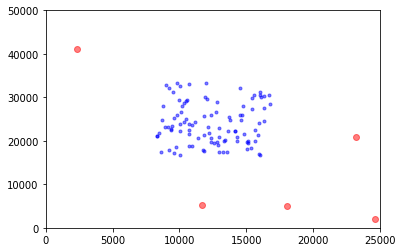

In [15]:
BOIDpositions = init_new_flock(dimensions=dimensions,
                           number_of_boids=number_of_boids,
                           lower_limit = np.asarray([(pos_limits[0]/2)-(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)-(0.341/2)*pos_limits[1]]),
                           upper_limit = np.asarray([(pos_limits[0]/2)+(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)+(0.341/2)*pos_limits[1]]))

PREDpositions = init_new_flock(dimensions=dimensions,
                              number_of_boids=number_of_pred,
                              lower_limit = np.asarray([0,0]),
                              upper_limit = np.asarray(pos_limits))

BOIDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_boids,
                            lower_limit = np.asarray([-10,-10]),
                            upper_limit = np.asarray([10,10]))

PREDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_pred,
                            lower_limit = np.asarray([-5,-5]),
                            upper_limit = np.asarray([5,5]))

figure = plt.figure()
axes = plt.axes(xlim=(0, pos_limits[0]), ylim=(0, pos_limits[1]))
BOIDscatter = axes.scatter(BOIDpositions[0],BOIDpositions[1], marker='.', c = 'blue', alpha=0.5)
PREDscatter = axes.scatter(PREDpositions[0],PREDpositions[1], c = 'red', alpha=0.5)
plt.show()


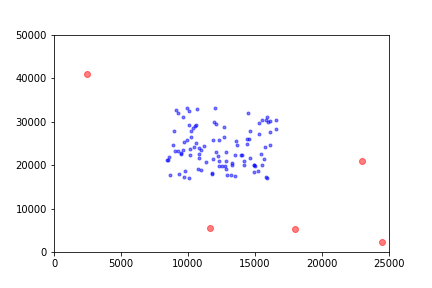
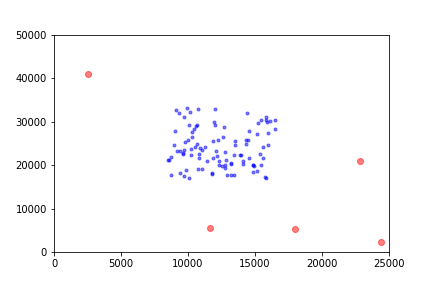
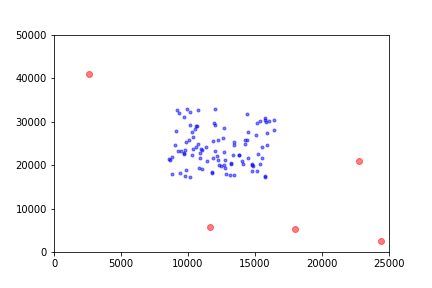
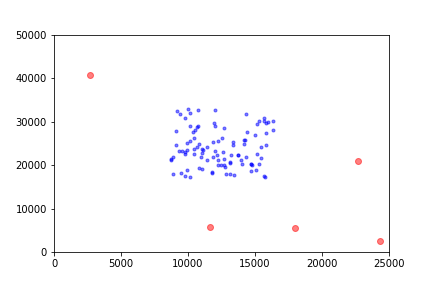
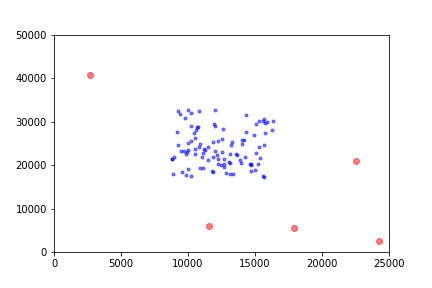
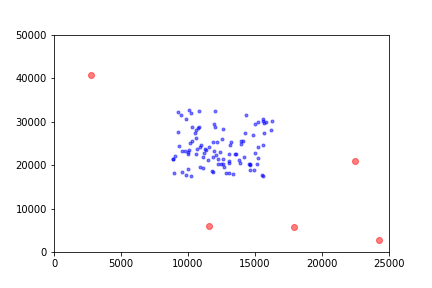
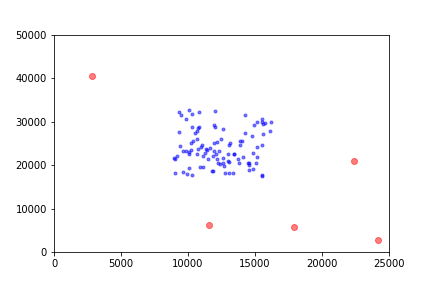
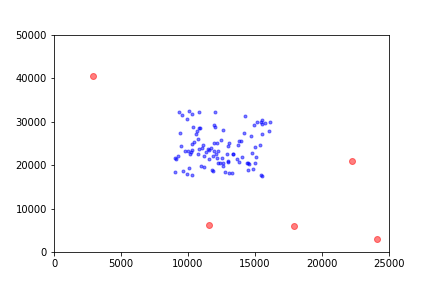
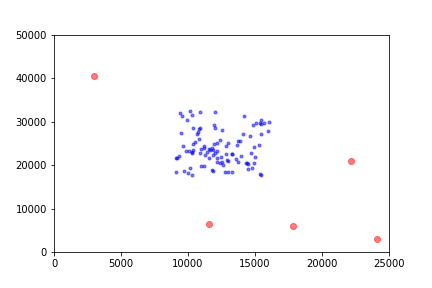
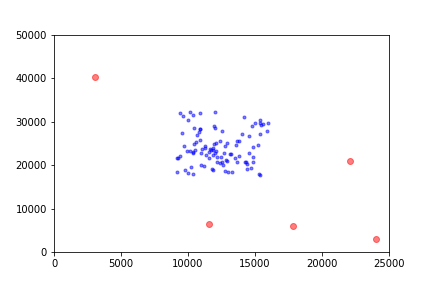
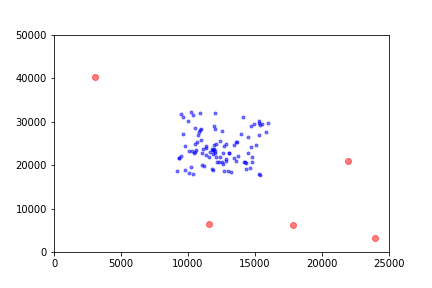
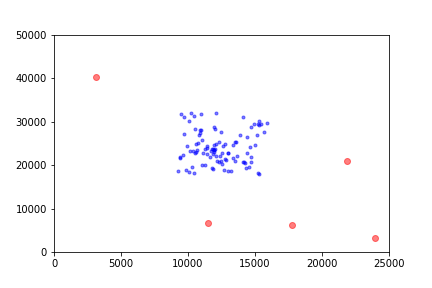
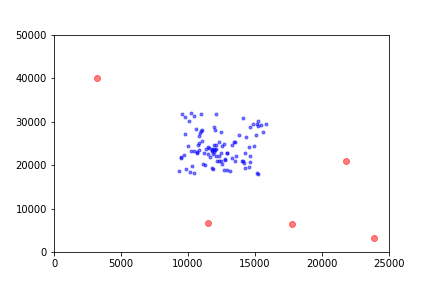
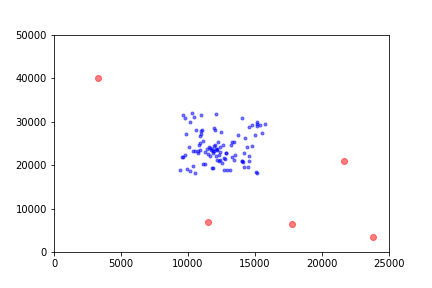
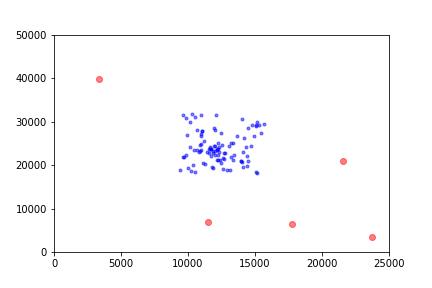
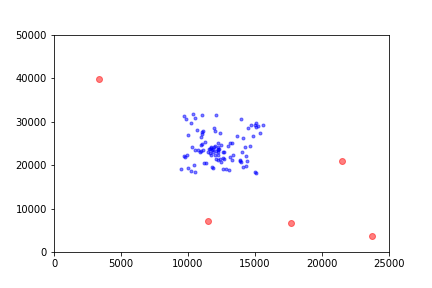
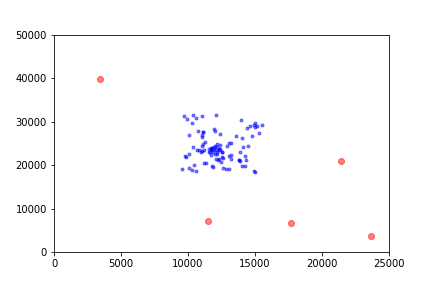
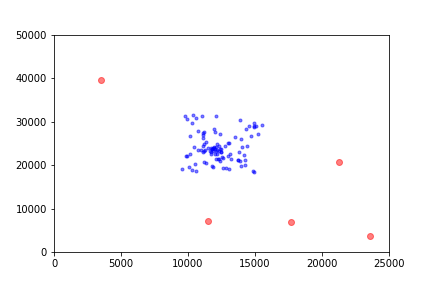
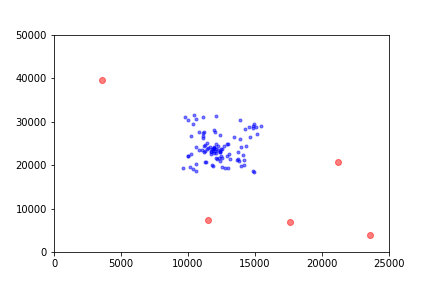
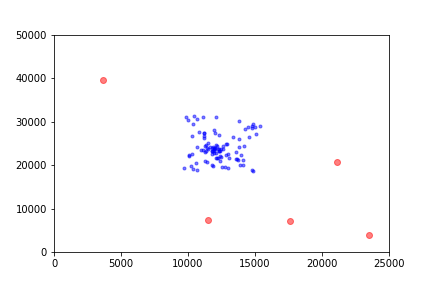
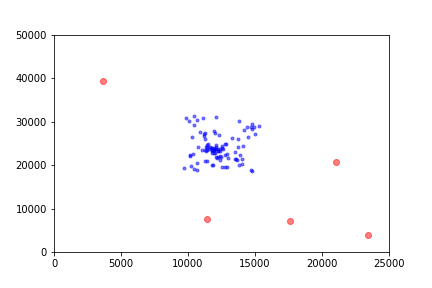
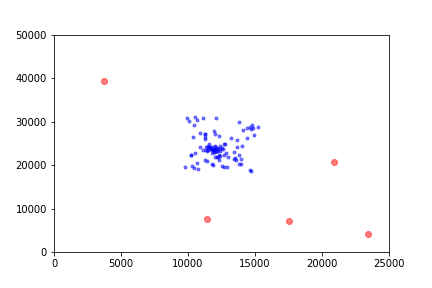
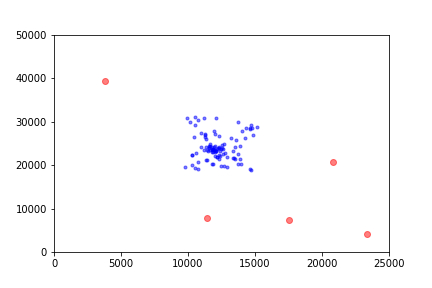
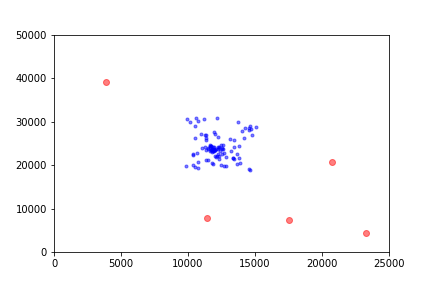
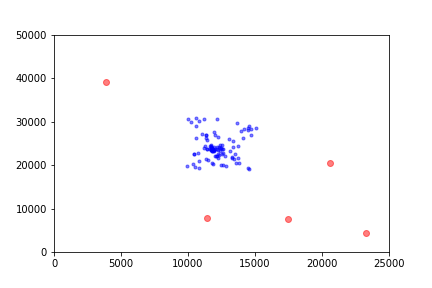
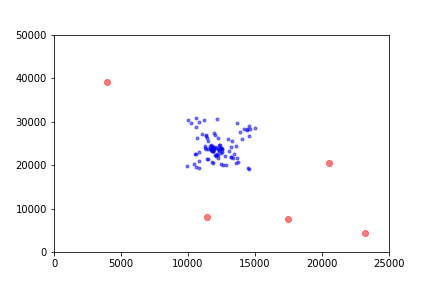
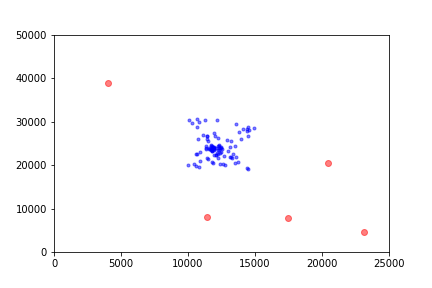
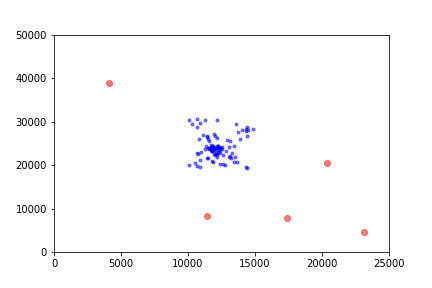
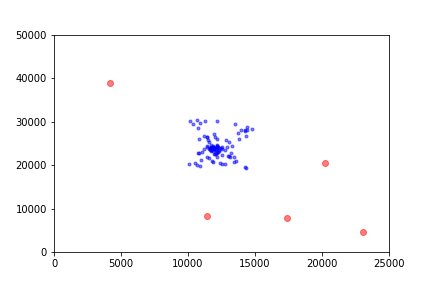
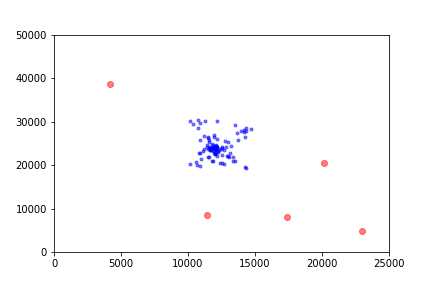
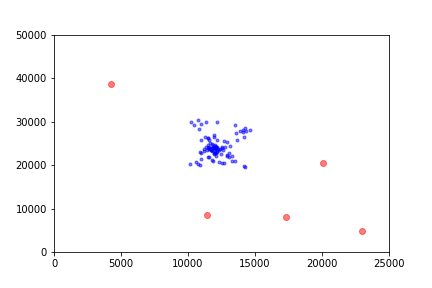
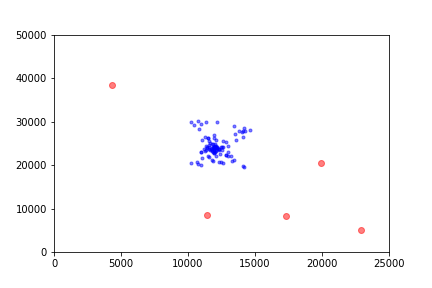
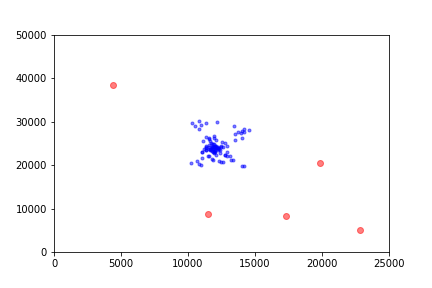
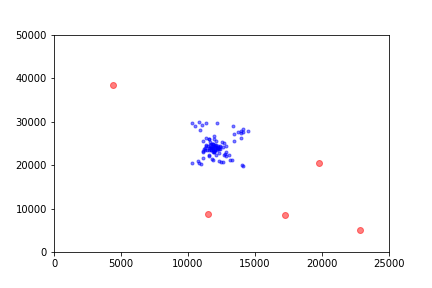
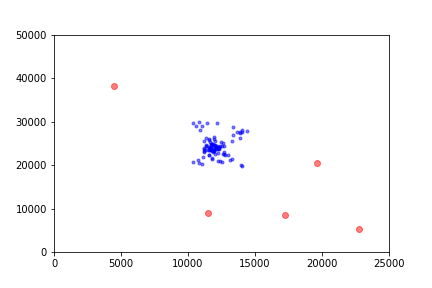
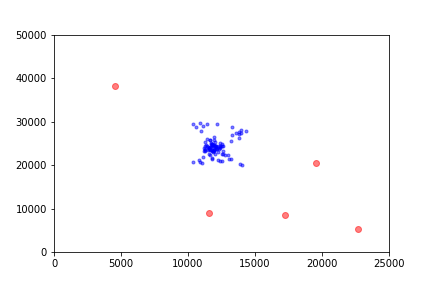
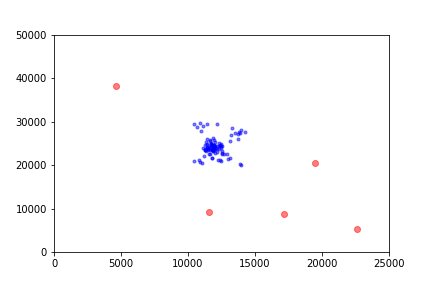
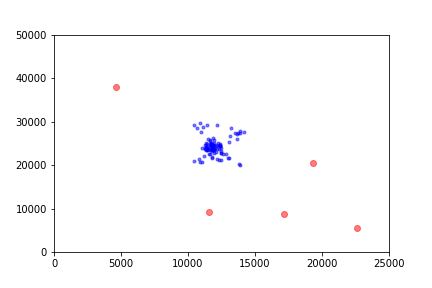
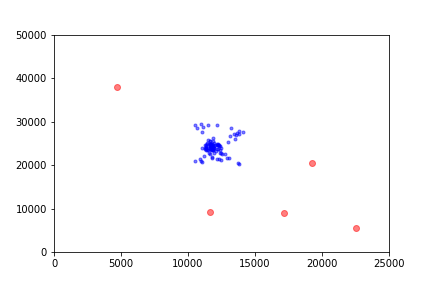
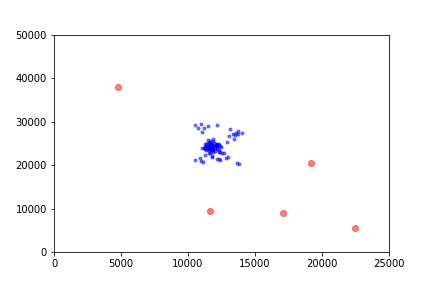
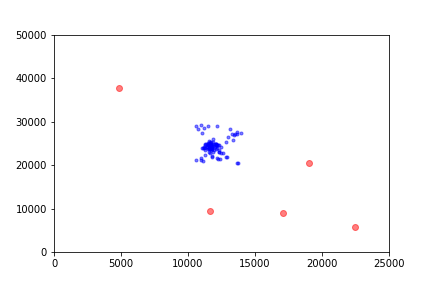
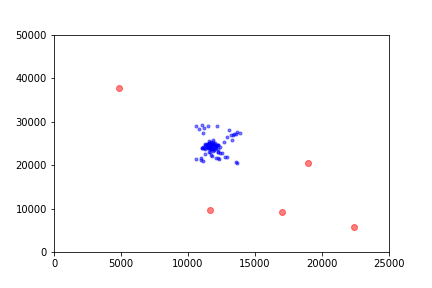
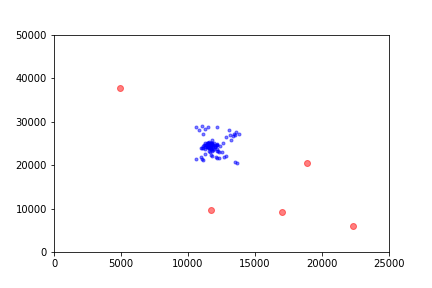
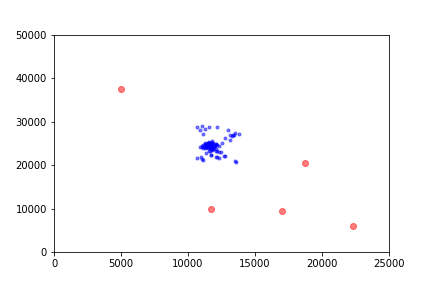
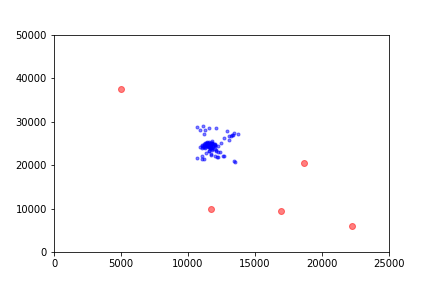
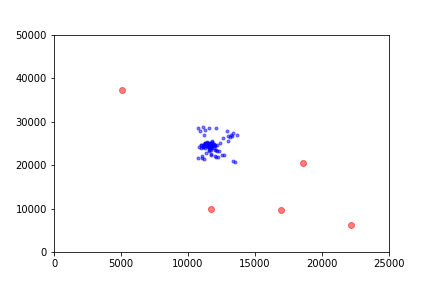
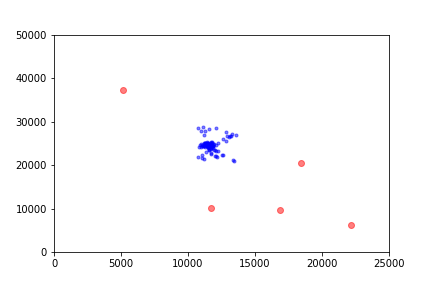
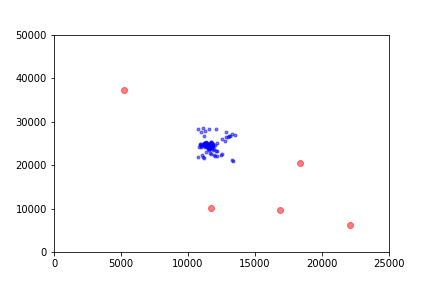
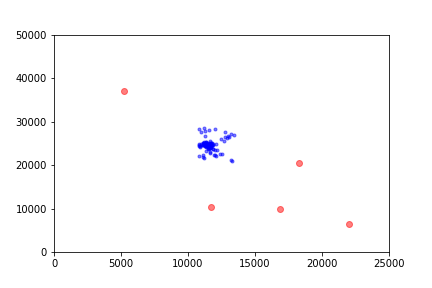
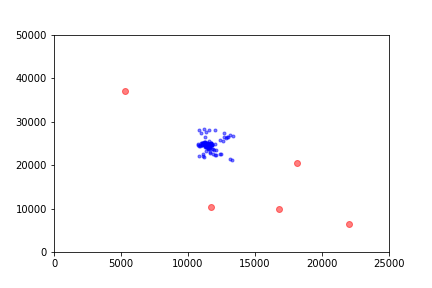
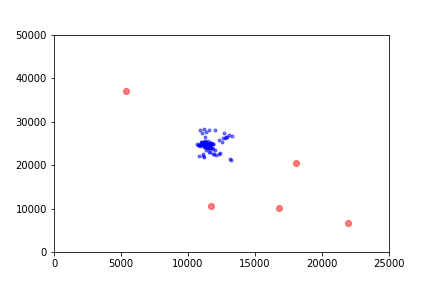
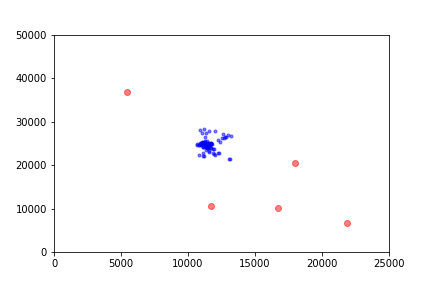
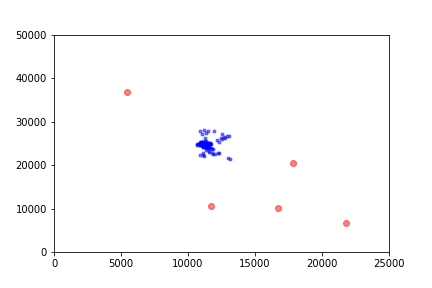
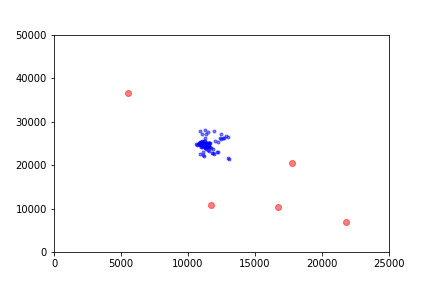
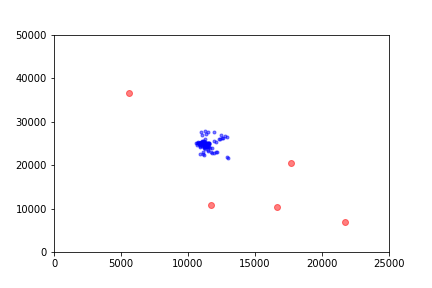
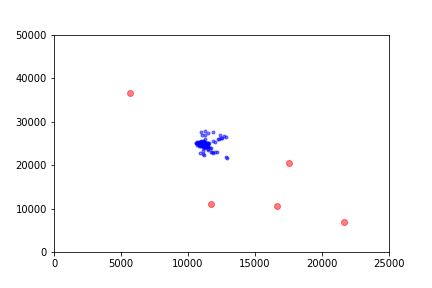
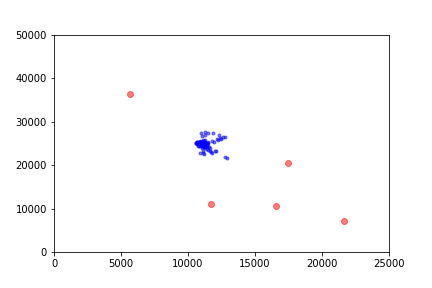
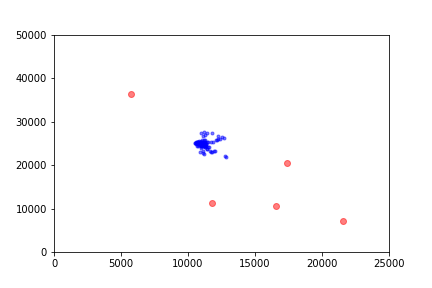
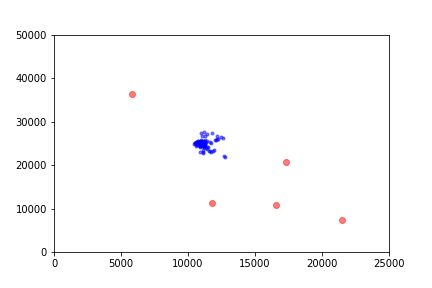
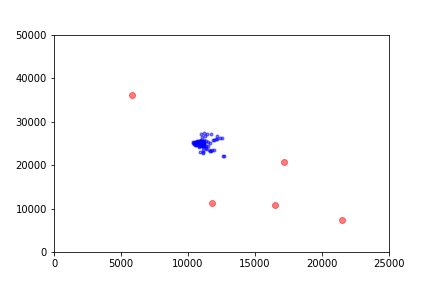
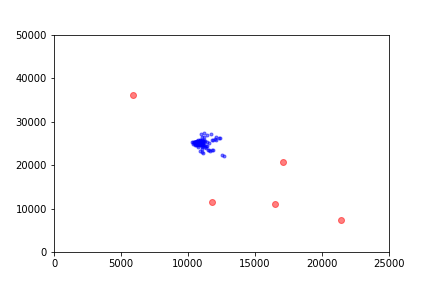
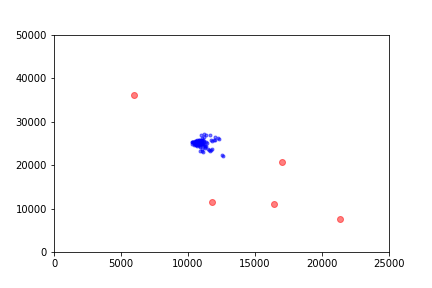
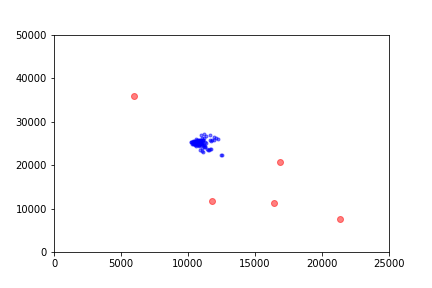
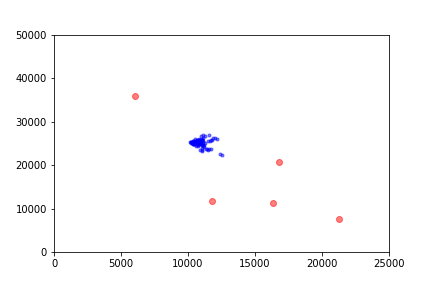
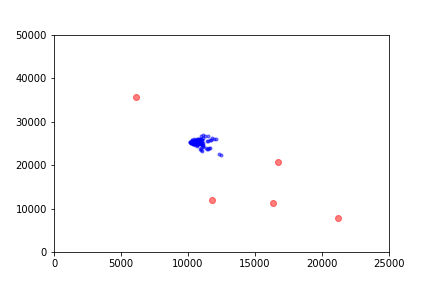
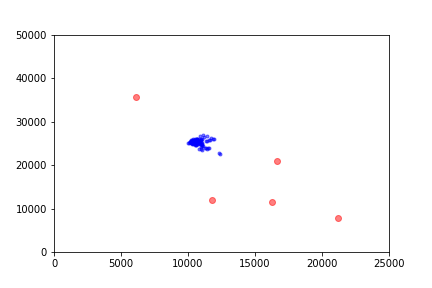
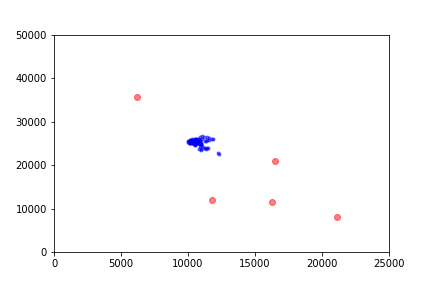
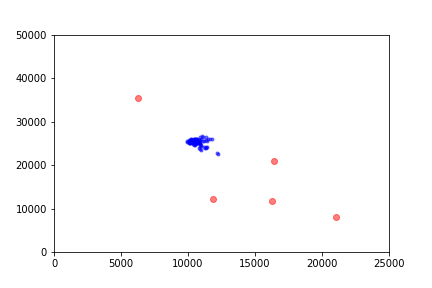
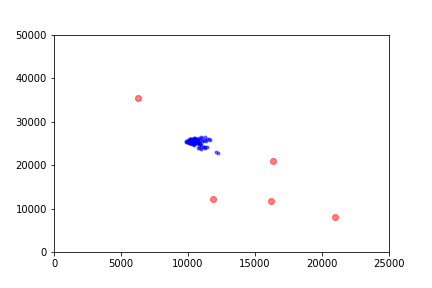
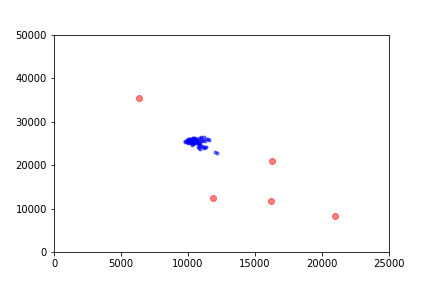
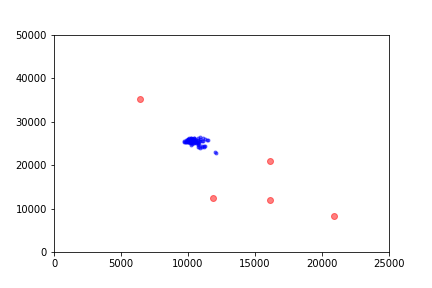
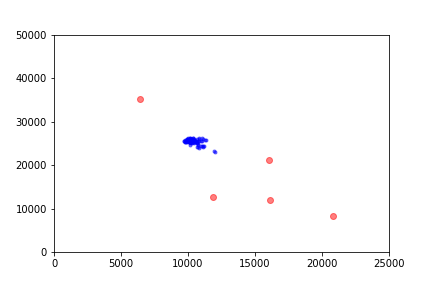
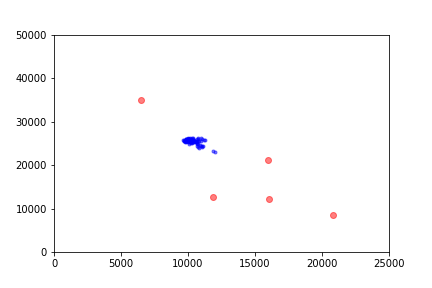
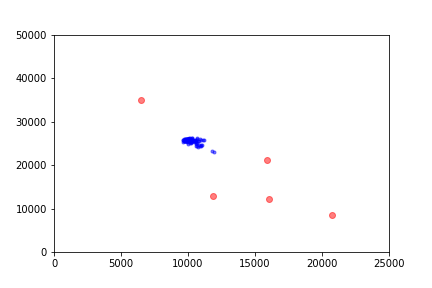
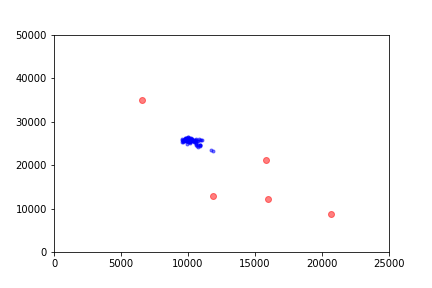
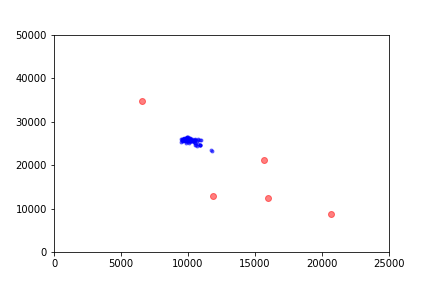
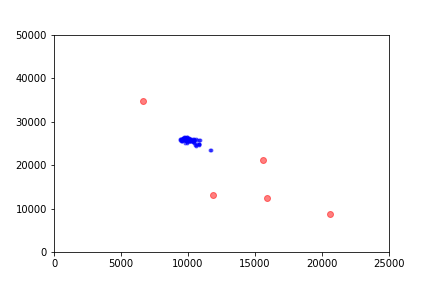
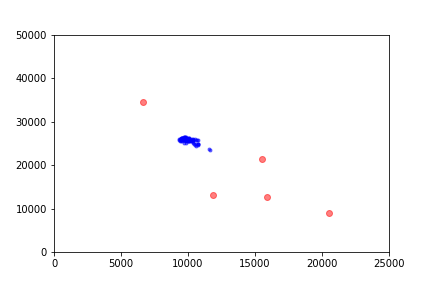
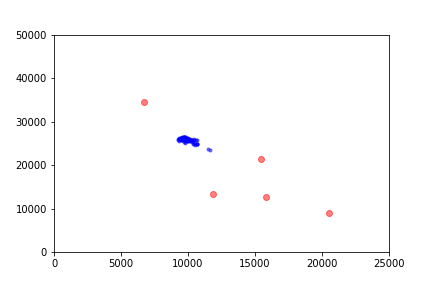
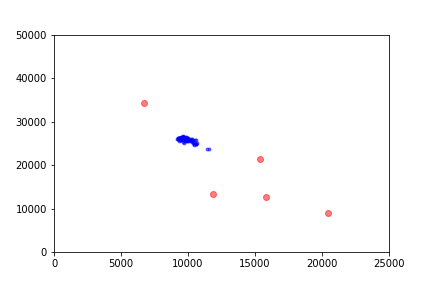
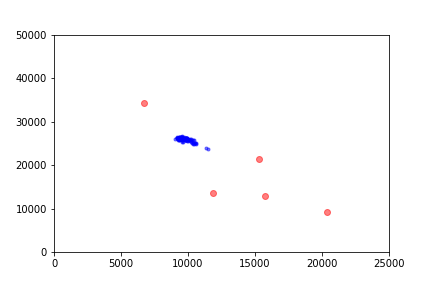
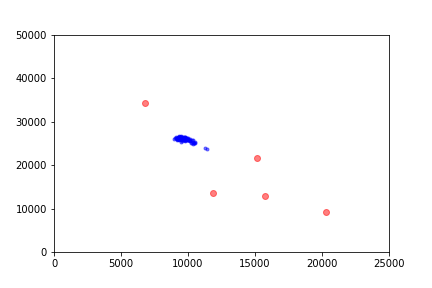
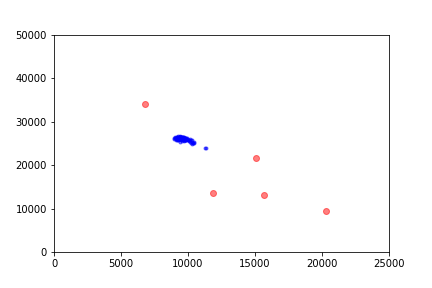
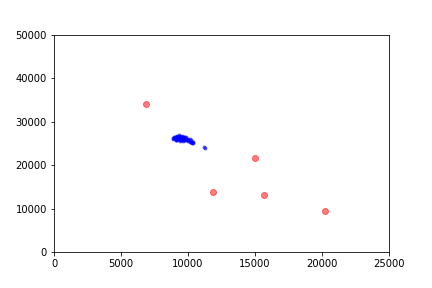
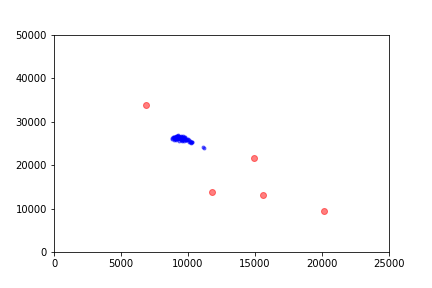
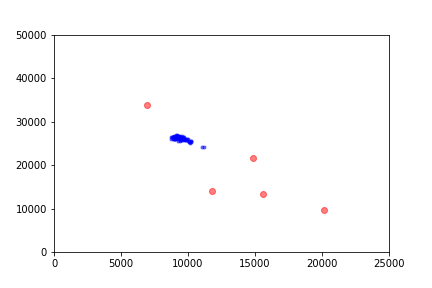
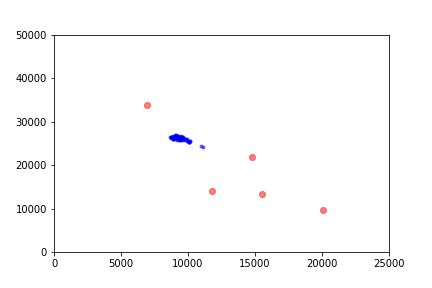
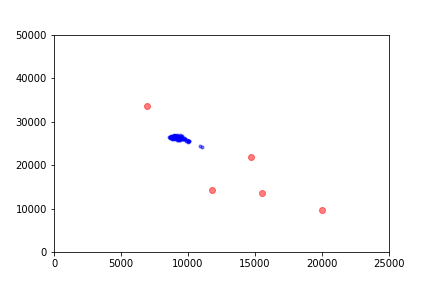
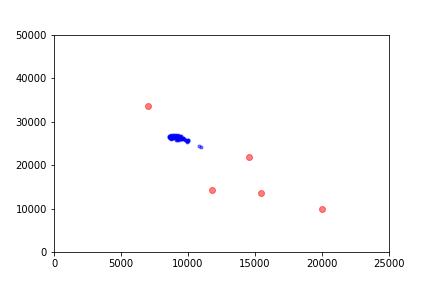
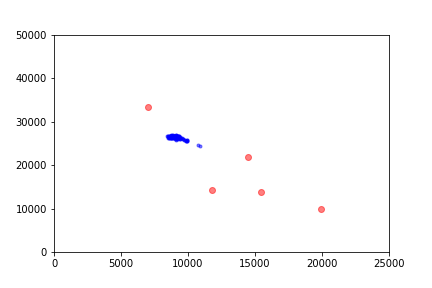
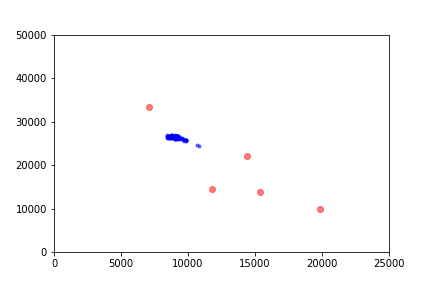
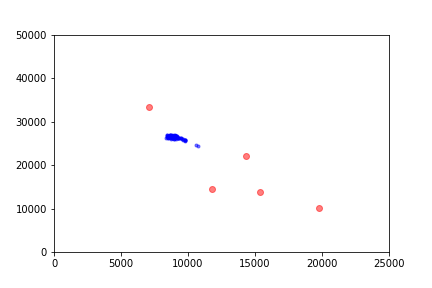
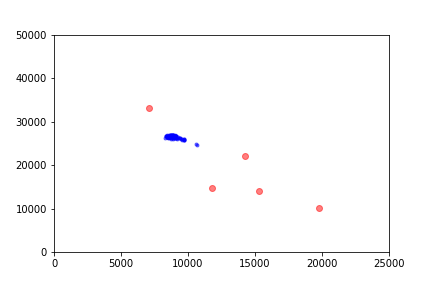
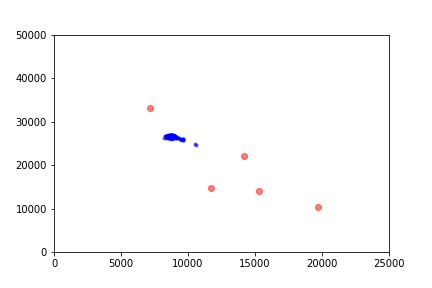
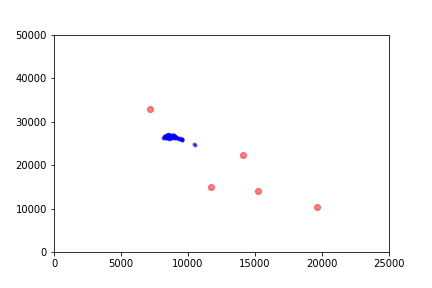
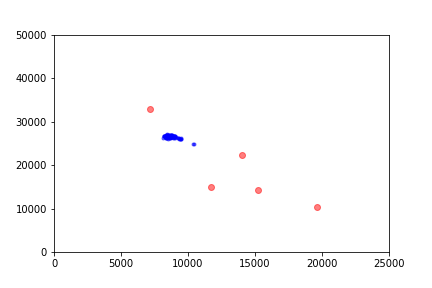
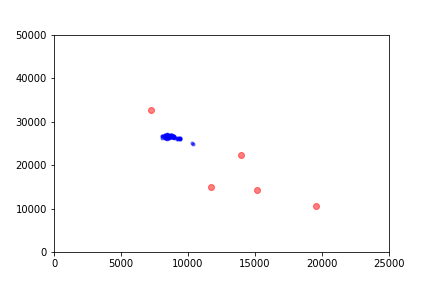
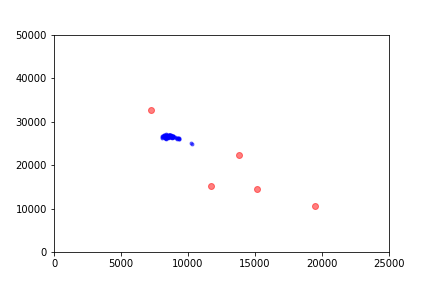
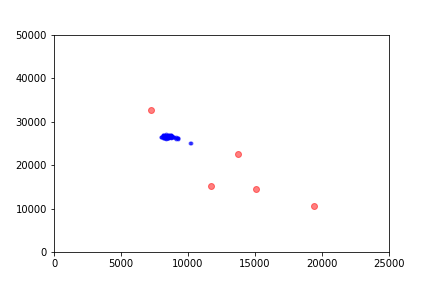
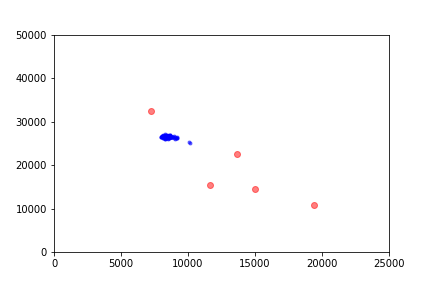
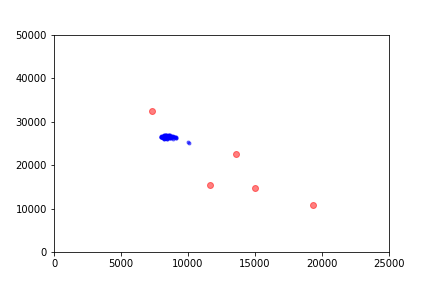
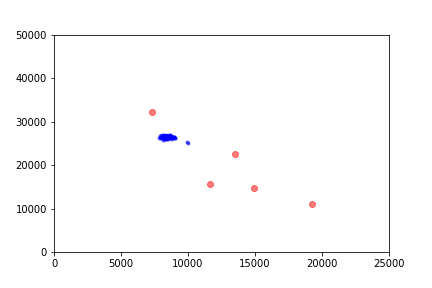
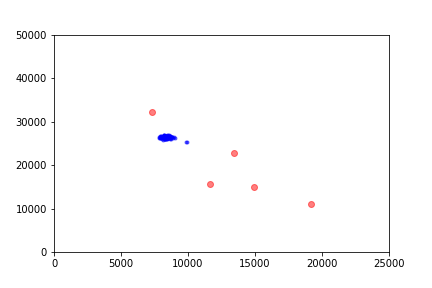
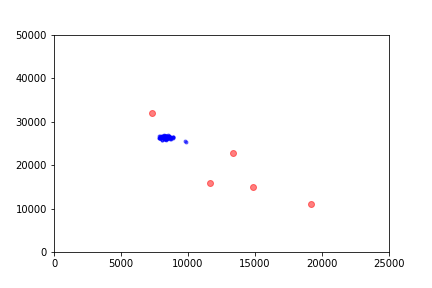
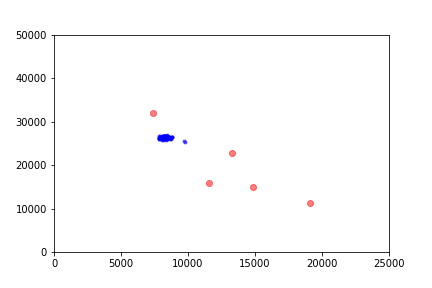
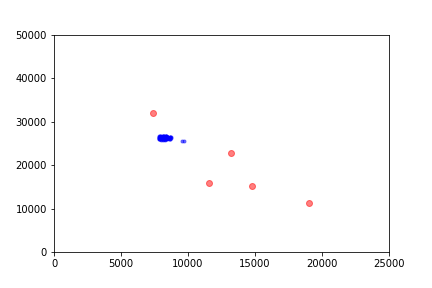
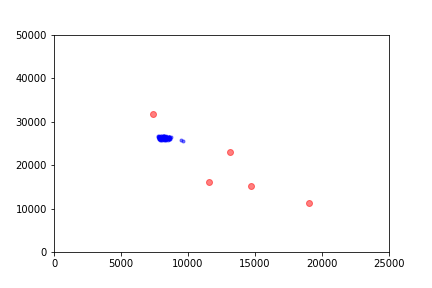
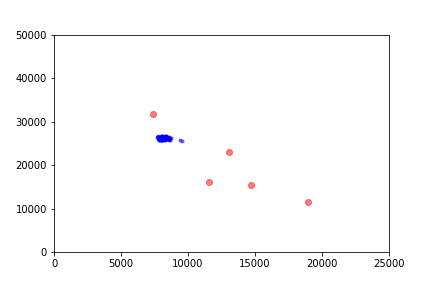
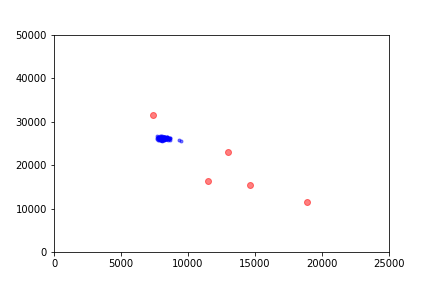
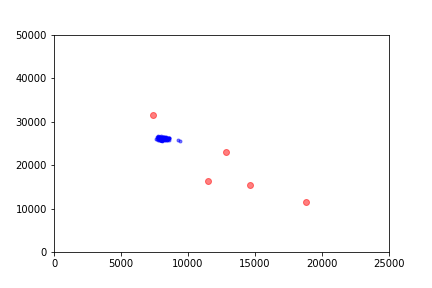
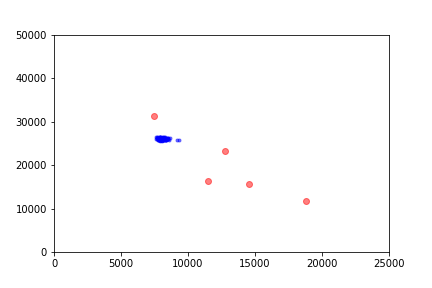
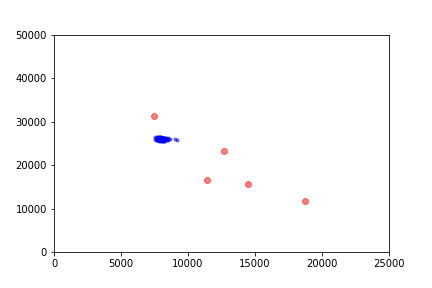
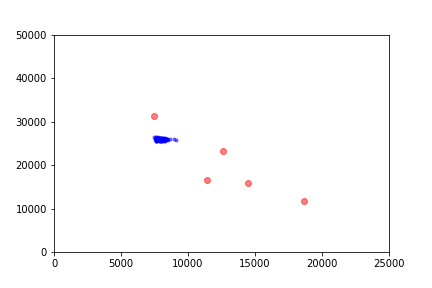
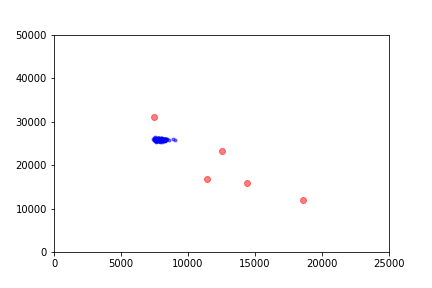
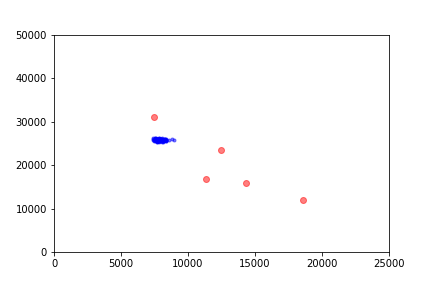
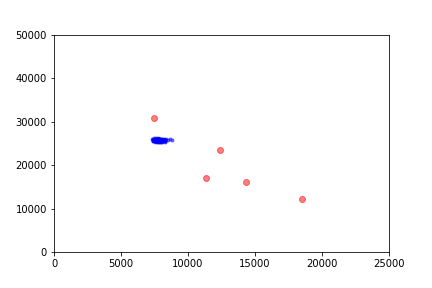
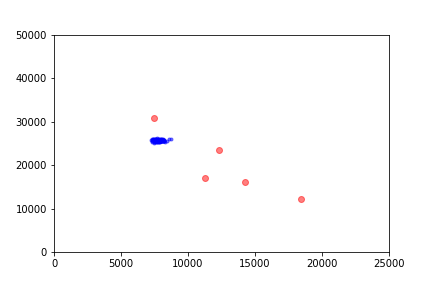
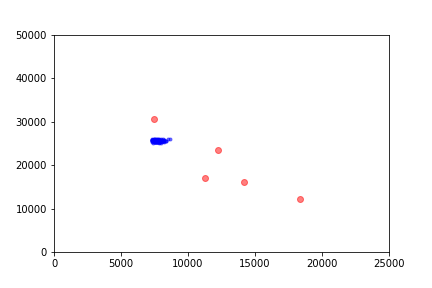
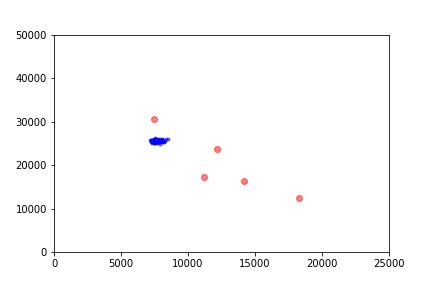
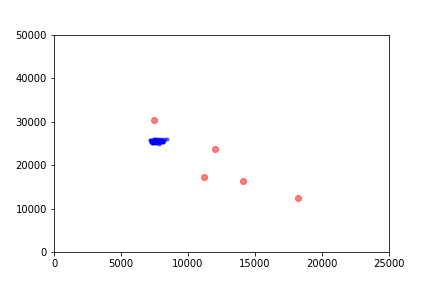
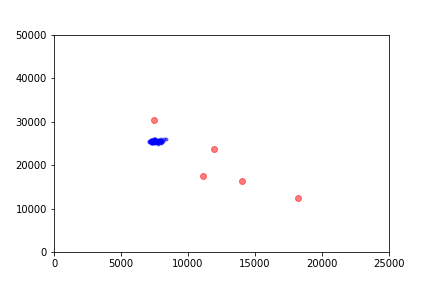
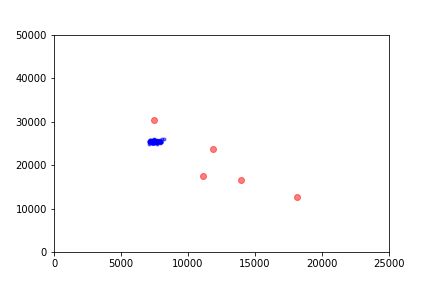
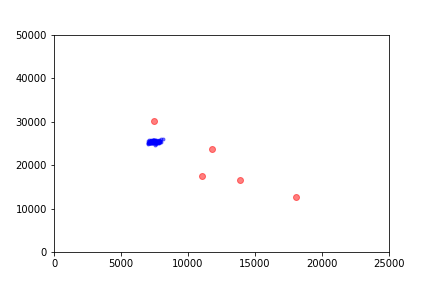
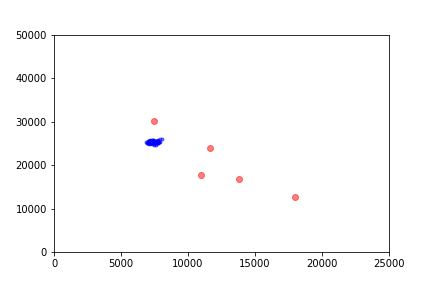
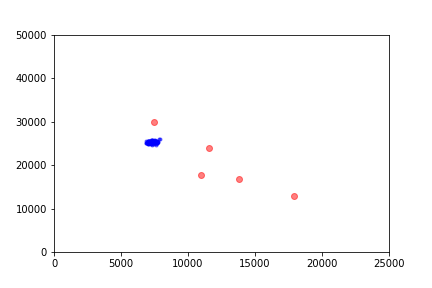
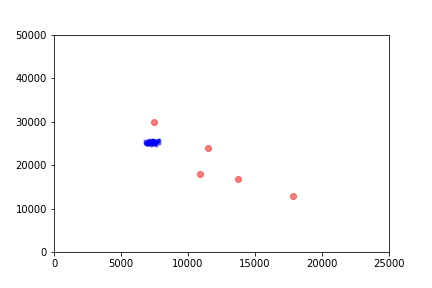
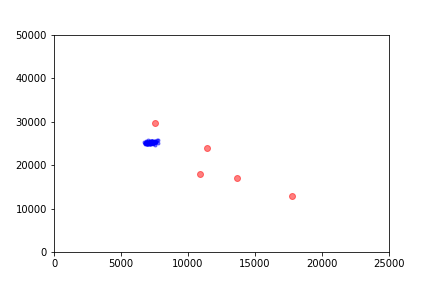
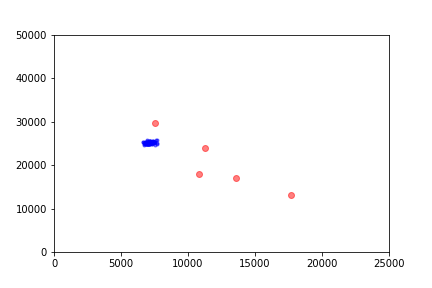
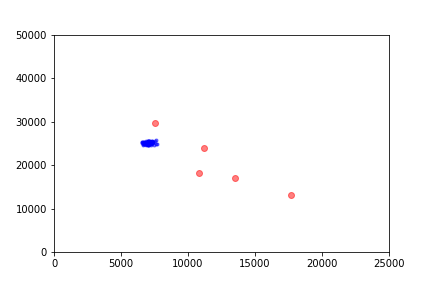
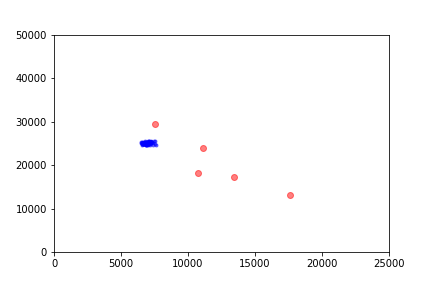
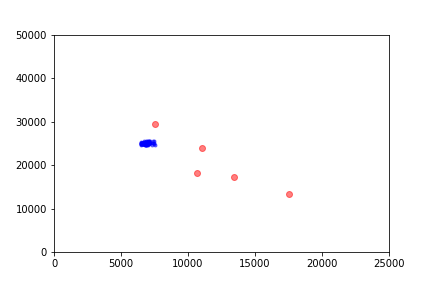
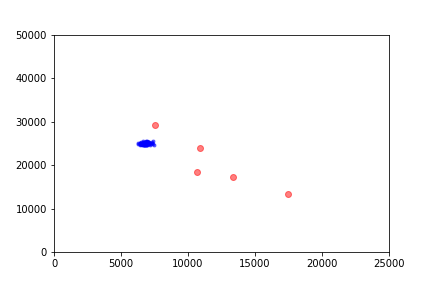
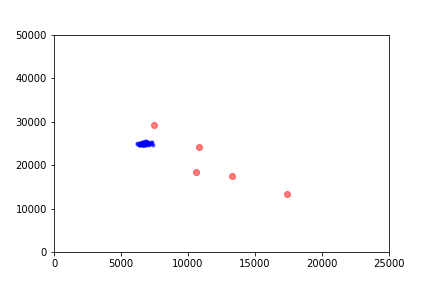
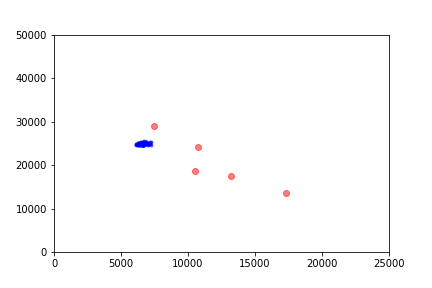
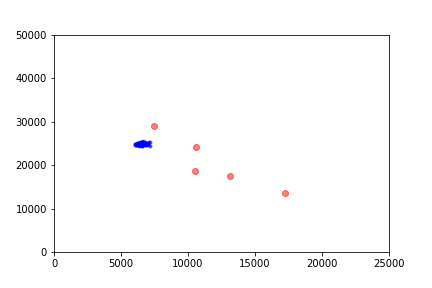
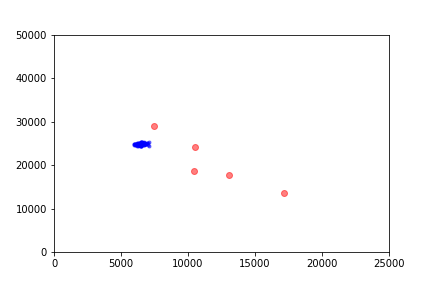
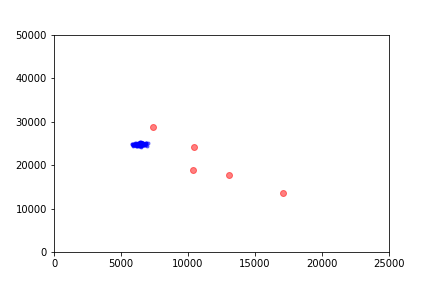
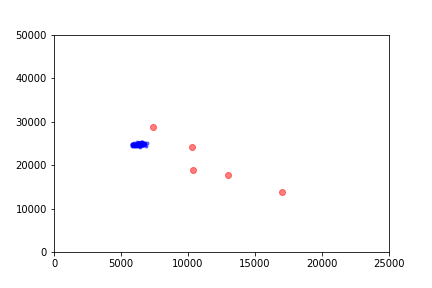
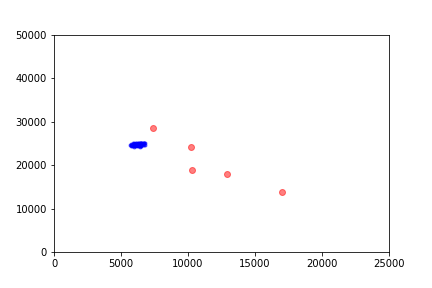
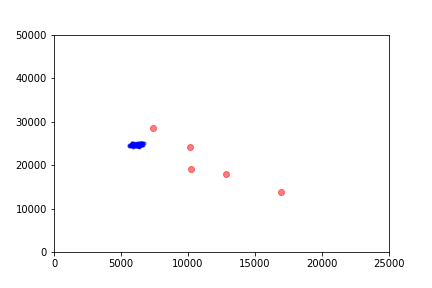
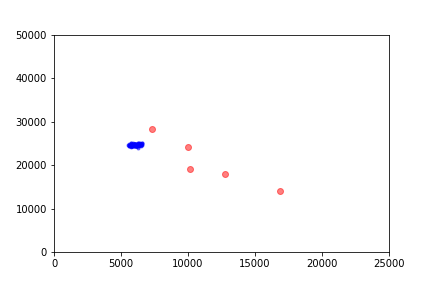
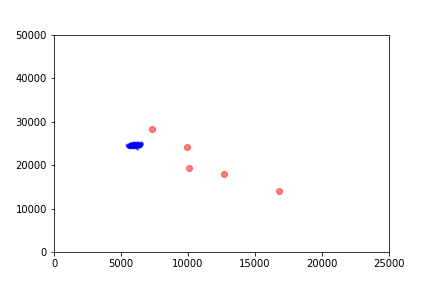
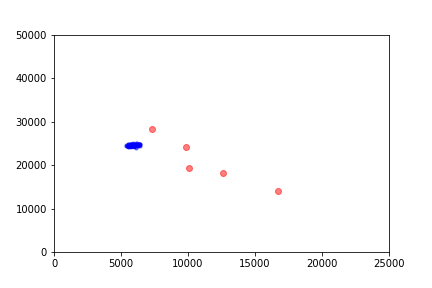
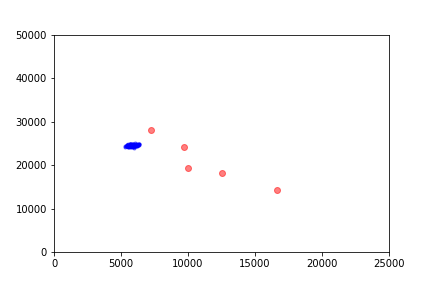
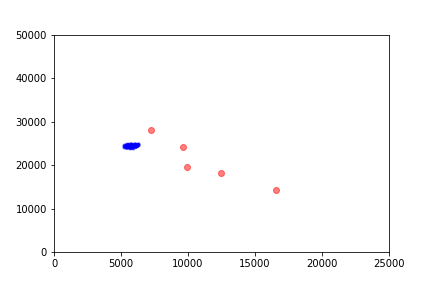
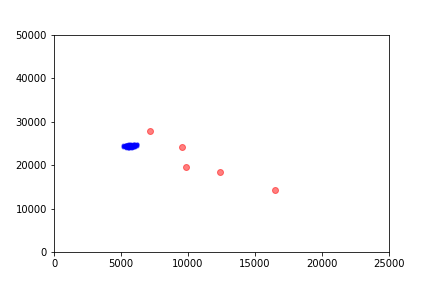
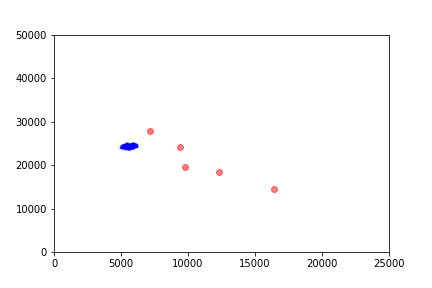
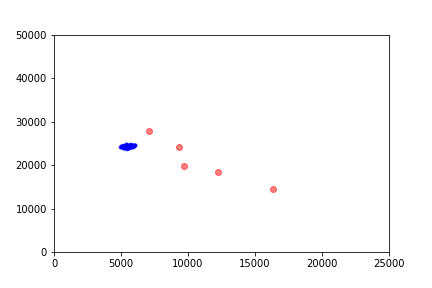
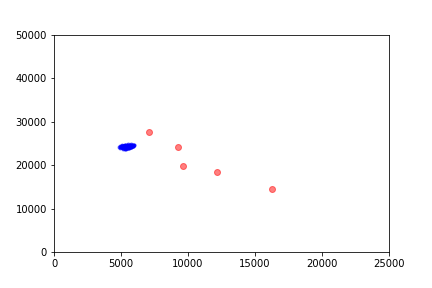
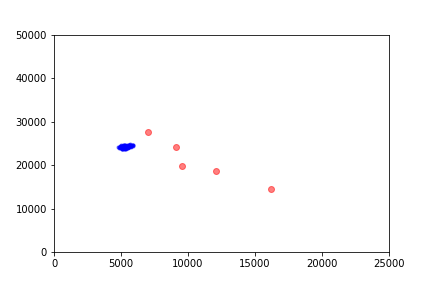

In [16]:
anim4=animation.FuncAnimation(figure, fourth_animate,
                             frames=150, interval=50)

anim4

In [36]:
def fifth_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities):
                
    lonliness = 0.01
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_boid_holder = []
        for kkkk in range(BOIDpositions.shape[1]):
            distance_to_nearest_boid = np.linalg.norm(BOIDpositions[:,kkkk] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_boid_holder.append(distance_to_nearest_boid)
        distance_to_nearest_boid_holder = np.asarray(distance_to_nearest_boid_holder)
        ind = np.argpartition(distance_to_nearest_boid_holder, -25)[-25:]
        ind = np.append(ind, k)
        part_center_of_mass = np.mean(np.delete(BOIDpositions, ind, axis=1), axis=1)
        center_of_mass = np.mean(np.delete(BOIDpositions, k, axis=1), axis=1)
        direction_to_part_center_of_mass = BOIDpositions[:,k] - part_center_of_mass
        direction_to_center_of_mass = BOIDpositions[:,k] - center_of_mass
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_part_center_of_mass * lonliness 
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - direction_to_center_of_mass * lonliness 
        
    fear_of_predator = 25
    for k in range(BOIDpositions.shape[1]):
        distance_to_nearest_pred_holder = []
        for kpred in range(PREDpositions.shape[1]):
            distance_to_nearest_pred = np.linalg.norm(PREDpositions[:,kpred] - BOIDpositions[:,k], ord=2)
            distance_to_nearest_pred_holder.append(distance_to_nearest_pred)
        distance_to_nearest_pred_holder = np.asarray(distance_to_nearest_pred_holder)
        nearest_pred_index = distance_to_nearest_pred_holder.argmin()            
        direction_to_nearest_pred = PREDpositions[:, nearest_pred_index] - BOIDpositions[:,k] 
        BOIDvelocities[:,k] = BOIDvelocities[:,k] - (direction_to_nearest_pred) * (fear_of_predator / distance_to_nearest_pred_holder[nearest_pred_index])
        if np.linalg.norm(BOIDpositions[:,k] - PREDpositions[:,nearest_pred_index]) <= 10000:
            flip = np.random.randint(0, 1)
            if flip == 0:
                BOIDvelocities[:,k] += np.flip(PREDvelocities[:,nearest_pred_index], axis=0) * (fear_of_predator / distance_to_nearest_pred_holder[nearest_pred_index])
            if flip == 1:
                BOIDvelocities[:,k] -= np.flip(PREDvelocities[:,nearest_pred_index], axis=0) * (fear_of_predator / distance_to_nearest_pred_holder[nearest_pred_index])
    
    hunger_of_predator = 0.01
    for kpred in range(PREDpositions.shape[1]):
        distance_to_nearest_prey_holder = []
        for k in range(BOIDpositions.shape[1]):
            distance_to_nearest_prey = np.linalg.norm(BOIDpositions[:,k] - PREDpositions[:,kpred], ord=2)
            distance_to_nearest_prey_holder.append(distance_to_nearest_prey)
        distance_to_nearest_prey_holder = np.asarray(distance_to_nearest_prey_holder)
        nearest_prey_index = distance_to_nearest_prey_holder.argmin()
        direction_to_nearest_prey = PREDpositions[:, kpred] - BOIDpositions[:,nearest_prey_index]
        PREDvelocities[:,kpred] = PREDvelocities[:,kpred] - direction_to_nearest_prey * ( hunger_of_predator * distance_to_nearest_prey_holder[nearest_prey_index])

    max_BOID_vel = 1000
    max_PRED_vel = 1000
    
    for i in range(BOIDvelocities.shape[1]):
        curr_BOID_vel = np.linalg.norm(BOIDvelocities[:,i])
        if BOIDpositions[0][i] >= pos_limits[0]:
            BOIDvelocities[:,i][0] = -10                        #BOIDvelocities[:,i][0] * (pos_limits[0] - BOIDpositions[0][i])
        if BOIDpositions[1][i] >= pos_limits[1]:
            BOIDvelocities[:,i][1] =  -10                       #BOIDvelocities[:,i][1] * (pos_limits[1] - BOIDpositions[1][i])
        if BOIDpositions[0][i] <= 0:
            BOIDvelocities[:,i][0] = 10
        if BOIDpositions[1][i] <= 0:
            BOIDvelocities[:,i][1] = 10
        if curr_BOID_vel > max_BOID_vel:
            BOIDvelocities[:,i] = BOIDvelocities[:,i] * max_BOID_vel / curr_BOID_vel
            
    for i in range(PREDvelocities.shape[1]):
        curr_PRED_vel = np.linalg.norm(PREDvelocities[:,i])
        if PREDpositions[0][i] >= pos_limits[0]:
            PREDvelocities[:,i][0] = -10                        #PREDvelocities[:,i][0] * (pos_limits[0] - PREDpositions[0][i])
        if PREDpositions[1][i] >= pos_limits[1]:
            PREDvelocities[:,i][1] = -10                        #PREDvelocities[:,i][1] * (pos_limits[1] - PREDpositions[1][i])
        if PREDpositions[0][i] <= 0:
            PREDvelocities[:,i][0] = 10
        if PREDpositions[1][i] <= 0:
            PREDvelocities[:,i][1] = 10
        if curr_PRED_vel > max_PRED_vel:
            PREDvelocities[:,i] = PREDvelocities[:,i] * max_PRED_vel / curr_PRED_vel
            
    collision_distance = 100
        
    BOIDseparations = BOIDpositions[:,np.newaxis,:] - BOIDpositions[:,:,np.newaxis]
    BOIDsquared_displacements = BOIDseparations * BOIDseparations
    BOIDsquare_distances = np.sum(BOIDsquared_displacements, 0)
    BOIDdistances = np.sqrt(BOIDsquare_distances)
    BOIDcollisions = BOIDdistances <= collision_distance
    BOIDseparations_if_close = np.copy(BOIDseparations)
    BOIDnot_colliding = np.logical_not(BOIDcollisions)
    BOIDseparations_if_close[0,:,:][BOIDnot_colliding] = 0
    BOIDseparations_if_close[1,:,:][BOIDnot_colliding] = 0
    
    BOIDvelocities = BOIDvelocities + np.sum(BOIDseparations_if_close, axis=2)
   
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    
    BOIDvelocity_differences = BOIDvelocities[:,np.newaxis,:] - BOIDvelocities[:,:,np.newaxis]
    BOIDvery_far = BOIDsquare_distances > formation_flying_distance
    BOIDvelocity_differences_if_close = np.copy(BOIDvelocity_differences)
    BOIDvelocity_differences_if_close[0,:,:][BOIDvery_far] =0
    BOIDvelocity_differences_if_close[1,:,:][BOIDvery_far] =0
    BOIDvelocities -= np.mean(BOIDvelocity_differences_if_close, axis=1) * formation_flying_strength
    
    PREDeparations = PREDpositions[:,np.newaxis,:] - PREDpositions[:,:,np.newaxis]
    PREDquared_displacements = PREDeparations * PREDeparations
    PREDquare_distances = np.sum(PREDquared_displacements, 0)
    PREDdistances = np.sqrt(PREDquare_distances)
    PREDcollisions = PREDdistances <= collision_distance
    PREDeparations_if_close = np.copy(PREDeparations)
    PREDnot_colliding = np.logical_not(PREDcollisions)
    PREDeparations_if_close[0,:,:][PREDnot_colliding] = 0
    PREDeparations_if_close[1,:,:][PREDnot_colliding] = 0
    
    PREDvelocities = PREDvelocities + np.sum(PREDeparations_if_close, axis=2)
    
    for kpred in range(PREDpositions.shape[1]):
        if ( np.linalg.norm(PREDpositions[:,kpred][0] - np.mean(BOIDpositions, axis=1)[0]) ) <= 0.25*np.std(BOIDpositions, axis=1)[0]:
            PREDvelocities[:,kpred][0] = 0
        if ( np.linalg.norm(PREDpositions[:,kpred][1] - np.mean(BOIDpositions, axis=1)[1]) ) <= 0.25*np.std(BOIDpositions, axis=1)[1]:
            PREDvelocities[:,kpred][1] = 0
        
        
    BOIDpositions += BOIDvelocities

    PREDpositions += PREDvelocities

def fifth_animate(frame):
    fifth_update_boids(BOIDpositions, BOIDvelocities, PREDpositions, PREDvelocities)
    BOIDscatter.set_offsets(BOIDpositions.T)
    PREDscatter.set_offsets(PREDpositions.T)

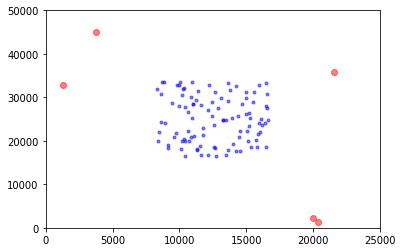

In [37]:
BOIDpositions = init_new_flock(dimensions=dimensions,
                           number_of_boids=number_of_boids,
                           lower_limit = np.asarray([(pos_limits[0]/2)-(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)-(0.341/2)*pos_limits[1]]),
                           upper_limit = np.asarray([(pos_limits[0]/2)+(0.341/2)*pos_limits[0],
                                                     (pos_limits[1]/2)+(0.341/2)*pos_limits[1]]))

PREDpositions = init_new_flock(dimensions=dimensions,
                              number_of_boids=number_of_pred,
                              lower_limit = np.asarray([0,0]),
                              upper_limit = np.asarray(pos_limits))

BOIDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_boids,
                            lower_limit = np.asarray([-10,-10]),
                            upper_limit = np.asarray([10,10]))

PREDvelocities = init_new_flock(dimensions=dimensions,
                            number_of_boids=number_of_pred,
                            lower_limit = np.asarray([-5,-5]),
                            upper_limit = np.asarray([5,5]))

figure = plt.figure()
axes = plt.axes(xlim=(0, pos_limits[0]), ylim=(0, pos_limits[1]))
BOIDscatter = axes.scatter(BOIDpositions[0],BOIDpositions[1], marker='.', c = 'blue', alpha=0.5)
PREDscatter = axes.scatter(PREDpositions[0],PREDpositions[1], c = 'red', alpha=0.5)
plt.show()

In [ ]:
anim5=animation.FuncAnimation(figure, fifth_animate,
                             frames=500, interval=50)

anim5

In [20]:
    PREDeparations = BOIDpositions[:,np.newaxis,:] - BOIDpositions[:,:,np.newaxis]
    PREDquared_displacements = PREDeparations * PREDeparations
    PREDquare_distances = np.sum(PREDquared_displacements, 0)
    BOIDdistances = np.sqrt(PREDquare_distances)
    BOIDcollisions = BOIDdistances <= collision_distance
    PREDeparations_if_close = np.copy(PREDeparations)
    BOIDnot_colliding = np.logical_not(BOIDcollisions)
    PREDeparations_if_close[0,:,:][BOIDnot_colliding] = 0
    PREDeparations_if_close[1,:,:][BOIDnot_colliding] = 0
    
    BOIDvelocities = BOIDvelocities + np.sum(PREDeparations_if_close, axis=2)

NameError: name 'collision_distance' is not defined

In [ ]:
np.flip(np.asarray([1,2]),axis=0)

In [ ]:
print(BOIDpositions[0])

In [ ]:
print(BOIDpositions.T[0])

In [ ]:
print(np.mean(np.delete(BOIDpositions, 0, axis=1), axis=1))

In [ ]:
print(BOIDpositions)

In [ ]:
print(np.linalg.norm(BOIDpositions, ord=2, axis=0))

In [ ]:
np.linalg.norm([2,2])

In [ ]:
PREDvelocities[:,1] = [0,0]

In [ ]:
print(PREDvelocities[:,1])

In [ ]:
print(np.mean(np.delete(BOIDpositions, 0, axis=1), axis=1))

In [ ]:
print(np.delete(BOIDpositions, 1, 1).shape)